In [16]:
import pandas as pd
df = pd.read_csv('./data/train_stories.csv')

In [17]:
import numpy as np
from nltk import tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [23]:
import sys
!{sys.executable} -m pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/8a/d5/5337662b714c65100f3545ed3909e9478614d1ebf1f692a52981f3f5167b/matplotlib-2.2.2-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/fb/96/619db9bf08f652790fa9f3c3884a67dc43da4bdaa185a5aa2117eb4651e1/kiwisolver-1.0.1-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [24]:
import matplotlib.pyplot as plt

storyid        storytitle  \
0  8eb647c6-cdfa-416a-b4a2-09b24f44dcc5  Kelly Made Pizza   

                                           sentence1  \
0  Kelly found her grandmother's pizza recipe in ...   

                                           sentence2  \
0  Kelly reminisced about how much she loved her ...   

                                           sentence3  \
0  Kelly decided that she was going to try to mak...   

                                           sentence4  \
0  Kelly studied the recipe and gathered everythi...   

                                           sentence5  
0  Kelly successfully made a pizza from her grand...

In [4]:
sentence1 = df["sentence1"]
sentence2 = df["sentence2"]
sentence3 = df["sentence3"]
sentence4 = df["sentence4"]
sentence5 = df["sentence5"]

In [5]:
def analyseAll(df):
    n_sentences, _ = df.shape
    scores = np.zeros((n_sentences, 5, 4))
    sid = SentimentIntensityAnalyzer()
    for i in range(5):
        sentences = df["sentence%d" %(i+1)]
        for j in range(len(sentences)):
            ss = sid.polarity_scores(sentences[j])
            scores[j,i,0] =ss['compound']
            scores[j,i,1] =ss['neg']
            scores[j,i,2] =ss['neu']
            scores[j,i,3] =ss['pos']
    return scores
        
scores = analyseAll(df)

In [41]:
scores[:5000,:,:].max()

0.0

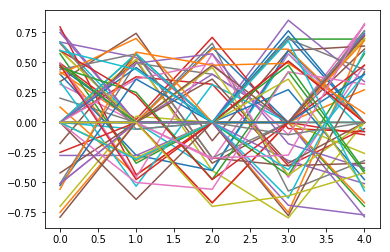

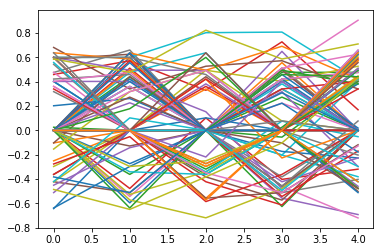

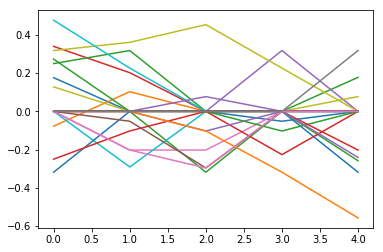

In [25]:
def plotScoresAsLines(scores):
    n,m,l = scores.shape
    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()
    fig3, ax3 = plt.subplots()
    for i in range(1):
        for j in range(200):
            score = scores[j,:,i]
            maxdeviation = np.max(abs(np.diff(score)))
            if maxdeviation > 0.66:
                ax1.plot(score)
                continue
            if maxdeviation > 0.33:
                ax2.plot(score)                    
                continue
            if maxdeviation < 0.33:
                ax3.plot(score)   
    plt.show()
    
plotScoresAsLines(scores)
plt.show()

In [48]:
np.savetxt('scores.csv',scores.reshape(scores.shape[0],scores.shape[1]*scores.shape[2]))

In [22]:
results = []

In [21]:
sid = SentimentIntensityAnalyzer()
for sentence in sentence1:
    ss = sid.polarity_scores(sentence)
    results.append(ss)  

In [14]:
results

[{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.25, 'neg': 0.222, 'neu': 0.778, 'pos': 0.0},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.1761, 'neg': 0.104, 'neu': 0.74, 'pos': 0.155},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.0772, 'neg': 0.206, 'neu': 0.794, 'pos': 0.0},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.4215, 'neg': 0.0, 'neu': 0.741, 'pos': 0.259},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.5423, 'neg': 0.0, 'neu': 0.72, 'pos': 0.28},
 {'compound': 0.5994, 'neg': 0.0, 'neu': 0.506, 'pos': 0.494},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'comp

In [ ]:
for sentence in sentence2:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

In [9]:
for sentence in sentence3:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Kelly decided that she was going to try to make pizza.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was a very windy day, but he wasn't too concerned.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day he was offered a TV show about grilling on a local channel,
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom suggested ice skating.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She drinks my juice and eats my food.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Once he grew up he realized he wanted to do other things.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom hit a watery oily patch.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She found some that were very ripe.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jared's dad got sick and could no longer go fishing.
compound: -0.6705, neg: 0.407, neu: 0.593, pos: 0.0, 
Rachel was thrilled.
compound: 0.4404, neg: 0.0, neu: 0.408, pos: 0.592, 
He came into the conference room.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After 

compound: -0.2263, neg: 0.213, neu: 0.787, pos: 0.0, 
She made a bucket list of all the tourist stops in New York.
compound: -0.1531, neg: 0.127, neu: 0.873, pos: 0.0, 
Many months later I flew across the country to meet him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Someone waved a gun in the movie theater.
compound: -0.34, neg: 0.286, neu: 0.714, pos: 0.0, 
She reminded Mike his paperwork was due yesterday.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She went to the doctor to get medicine for it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So Tim ordered tons of food in excitement.
compound: 0.4939, neg: 0.0, neu: 0.686, pos: 0.314, 
Until one day her husband tells her he has had enough.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A tornado arrived in the camping area and picked up the tents.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His teammates won more races than he did.
compound: 0.5719, neg: 0.0, neu: 0.654, pos: 0.346, 
She was nervous about meeting new people.
c

compound: 0.4019, neg: 0.0, neu: 0.649, pos: 0.351, 
I through the line out into the water.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly, her weight caused the shelf to tip.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I was enthralled by the stories.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They spent the afternoon coloring and playing with toys.
compound: 0.2023, neg: 0.0, neu: 0.816, pos: 0.184, 
She she awoke the next morning she found twenty dollars.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It got bigger than expected.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She needed a passport.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They planned to call it quits with rearing of their second.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the race started, they all pushed down on the gas pedals.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She liked to relax in it every night.
compound: 0.6908, neg: 0.0, neu: 0.513, pos: 0.487, 
But then they announced that

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He had to borrow a grill and a truck to get there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The mother reminded her the baby was too small to play.
compound: 0.34, neg: 0.0, neu: 0.806, pos: 0.194, 
After he saw the price, he decided not to get insurance.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her tree was humongous, and very old.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Father refused to pay it, out of principle.
compound: -0.3818, neg: 0.375, neu: 0.625, pos: 0.0, 
When he heard Steve Irwin had died, Ellis cried for days.
compound: -0.7351, neg: 0.408, neu: 0.592, pos: 0.0, 
Ben gets his food and drinks ready.
compound: 0.3612, neg: 0.0, neu: 0.706, pos: 0.294, 
He was a good player.
compound: 0.4404, neg: 0.0, neu: 0.508, pos: 0.492, 
He practices his techniques for six weeks straight.
compound: 0.2263, neg: 0.0, neu: 0.787, pos: 0.213, 
They looked out at the rain falling in apparent disgust.
compound: -0.6705, neg: 0.4

compound: 0.4939, neg: 0.0, neu: 0.686, pos: 0.314, 
Kate decided to play the game with him.
compound: 0.34, neg: 0.0, neu: 0.745, pos: 0.255, 
The fishing spot was on an old pier.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was delicious!
compound: 0.6114, neg: 0.0, neu: 0.334, pos: 0.666, 
One day, she received a letter.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But Kaden's mom made him wait while she checked it over.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As soon as he had the chance, he asked for a divorce.
compound: 0.25, neg: 0.0, neu: 0.833, pos: 0.167, 
With a guidance counselor they devised a plan for high school.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tim joyously explored all the ancient sites to be found there.
compound: 0.5994, neg: 0.0, neu: 0.719, pos: 0.281, 
There were a number of elderly people on the street that needed help.
compound: 0.4588, neg: 0.0, neu: 0.714, pos: 0.286, 
They took a long walk up to the gas station.
compound: 0.0, neg: 0.0

compound: 0.4019, neg: 0.0, neu: 0.597, pos: 0.403, 
Ken decided to break up with his girlfriend.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then he found an old cold war bunker with a cool vibe.
compound: -0.3818, neg: 0.257, neu: 0.592, pos: 0.151, 
I removed the seat and repaired the floor with pieces of sheet metal.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she found out there was a new flavor she was ecstatic.
compound: 0.5106, neg: 0.0, neu: 0.752, pos: 0.248, 
I ended up missing my flight and had to stay the night.
compound: -0.296, neg: 0.18, neu: 0.82, pos: 0.0, 
She told me God was Love.
compound: 0.743, neg: 0.0, neu: 0.388, pos: 0.612, 
Each morning she would jog for an hour.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, Hal won a case against a large company.
compound: 0.5719, neg: 0.0, neu: 0.654, pos: 0.346, 
Their parents told them not to go near it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He turned the water on and set it to hot just like he 

She was not injured badly, but she screamed very loud.
compound: -0.1391, neg: 0.221, neu: 0.524, pos: 0.255, 
As Pat was admiring himself he noticed the full moon.
compound: 0.3818, neg: 0.0, neu: 0.776, pos: 0.224, 
He really like this one girl that he met at an event.
compound: 0.4201, neg: 0.0, neu: 0.798, pos: 0.202, 
My kidney malfunctioned and I started gaining fluid.
compound: 0.4215, neg: 0.0, neu: 0.682, pos: 0.318, 
The bully got into trouble and got detention.
compound: -0.8126, neg: 0.627, neu: 0.373, pos: 0.0, 
He tried out for professional team.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In his apartment parking structure, he saw a Miata with its top off.
compound: 0.2023, neg: 0.0, neu: 0.859, pos: 0.141, 
He gets on and rides the ride.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he gets there, he dances all night long.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Their mom couldn't afford ice cream, but she had a solution.
compound: 0.4497, neg: 0.0, neu: 0.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Henry couldn't find his train platform.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Inside the building was a family of four with no way to escape!
compound: -0.2003, neg: 0.176, neu: 0.705, pos: 0.12, 
Ann is angry that the man denied having an affair.
compound: -0.7351, neg: 0.437, neu: 0.563, pos: 0.0, 
She also always adds some kind of fruit for them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She finds a local carpenter who allows her to be an apprentice.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He called a friend on the phone.
compound: 0.4939, neg: 0.0, neu: 0.61, pos: 0.39, 
When it didn't look like they were going to stop, Mom butted in.
compound: -0.5122, neg: 0.282, neu: 0.718, pos: 0.0, 
The weather forecast predicted rain.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jenny was getting sick of being drenched each time she bathed him.
compound: -0.5106, neg: 0.231, neu: 0.769, pos: 0.0, 
They were going to be doing som

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The concert was at an outdoor ampitheater in Washington state.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Now they are expecting their first child.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I took the mower for a test drive.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He looked for a new pair.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When I was outdoors, it started to rain.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He feared he wouldn't make any friends at all.
compound: -0.696, neg: 0.451, neu: 0.549, pos: 0.0, 
Jill often tried to draw the dresses that she saw in the magazines.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The ball crashed through a window.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She made it most of the way safely.
compound: 0.4939, neg: 0.0, neu: 0.686, pos: 0.314, 
One of her friends offered to help.
compound: 0.7003, neg: 0.0, neu: 0.463, pos: 0.537, 
But Abby had the ACT coming up and she was v

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Unfortunately the owner of the skating rink died.
compound: -0.7184, neg: 0.5, neu: 0.5, pos: 0.0, 
Roy stopped and picked it up.
compound: -0.2263, neg: 0.275, neu: 0.725, pos: 0.0, 
I realized when I got home later that day I left my sweater.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He showed up late and was a slob.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, Josh shoved Junior.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
There was no tension when her old friends weren't around.
compound: -0.1027, neg: 0.308, neu: 0.479, pos: 0.212, 
He left disappointed and headed home.
compound: -0.4767, neg: 0.383, neu: 0.617, pos: 0.0, 
Linda decided to give her a try.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Luke accepted and they scheduled a day to play.
compound: 0.5423, neg: 0.0, neu: 0.571, pos: 0.429, 
He started it up and began cutting the grass.
compound: -0.128, neg: 0.158, neu: 0.842, pos: 0.0, 
Caroline loves reading 

compound: 0.4019, neg: 0.0, neu: 0.649, pos: 0.351, 
Later that night her mom told her that she received a call.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
On the day of her sky dive she was scared.
compound: -0.4404, neg: 0.244, neu: 0.756, pos: 0.0, 
She tries to fake being sick but they still make her go.
compound: -0.4939, neg: 0.296, neu: 0.704, pos: 0.0, 
That startled some deer.
compound: -0.1779, neg: 0.362, neu: 0.638, pos: 0.0, 
But since he was a teen, he has heard about a guy who looked like him.
compound: 0.3612, neg: 0.0, neu: 0.839, pos: 0.161, 
He had a bad feeling about his answers.
compound: -0.4588, neg: 0.35, neu: 0.5, pos: 0.15, 
Several of them had to go inside to rescue a child.
compound: 0.5106, neg: 0.0, neu: 0.732, pos: 0.268, 
Ida knew it was dangerous to stop for strangers.
compound: -0.6486, neg: 0.431, neu: 0.569, pos: 0.0, 
Suddenly, she saw him digging in the dirt.
compound: -0.34, neg: 0.255, neu: 0.745, pos: 0.0, 
They always let her win.
compound: 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She walked up the steps, reassuring herself.
compound: 0.4019, neg: 0.0, neu: 0.69, pos: 0.31, 
The snake's heat lamp stopped working earlier today.
compound: -0.2263, neg: 0.213, neu: 0.787, pos: 0.0, 
As I sat on the cart, we started zooming.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They were running across the yard playing tag.
compound: 0.2023, neg: 0.0, neu: 0.795, pos: 0.205, 
He found a lovely ring and proposed to Hope.
compound: 0.7717, neg: 0.0, neu: 0.472, pos: 0.528, 
Becka was drunk and her driving showed it.
compound: -0.34, neg: 0.255, neu: 0.745, pos: 0.0, 
They went to a specialist, who helped them get IVF treatments.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her coach showed her how to kick the ball between her feet.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But she forgot about them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He approached the kid and introduced himself.
compound: 0.0, neg: 0.0, neu: 1.0, p

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She left it on her shelf for six months.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As he was alone, Blake had to listen.
compound: -0.25, neg: 0.222, neu: 0.778, pos: 0.0, 
The soup began to bubble over the pot.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I drove straight to my local grocery store and grabbed a cart.
compound: 0.2263, neg: 0.0, neu: 0.826, pos: 0.174, 
Getting the foil to stick required a lot of duct tape.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The dish was very spicy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He practiced in his barn every night.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decided to practice one more time in the arena.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went down to the mall to go shopping for clothes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
This summer when they arrived at the cabin.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But they never invited him on tri

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was his turn to kick the ball.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Patrice wanted her to feel special.
compound: 0.4019, neg: 0.0, neu: 0.649, pos: 0.351, 
However, one day Viola and her friends all visit the beach.
compound: 0.4767, neg: 0.0, neu: 0.763, pos: 0.237, 
He decided to go on a touring boat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She wasn't very happy so I told her I'd have someone else call her.
compound: -0.4964, neg: 0.211, neu: 0.789, pos: 0.0, 
She attempted to leave subtle notes as well.
compound: 0.2263, neg: 0.129, neu: 0.645, pos: 0.226, 
It was his fifth draft and he had a deadline.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The other warned him to poke them with a fork, lest they explode.
compound: -0.2732, neg: 0.16, neu: 0.84, pos: 0.0, 
The woman in front of her picked up a pizza slice, then returned it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dan opened the hood to have a look.
compoun

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His ads were him talking about success while showing off his money.
compound: 0.5719, neg: 0.0, neu: 0.748, pos: 0.252, 
She walked to throw away the cleaning supplies.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He challenged Gary to a one-on-one pinball match.
compound: -0.1027, neg: 0.189, neu: 0.811, pos: 0.0, 
Once when I was changing the king bed, I could not find the dog.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The ankle swelled up and turned colors because of a very dark bruise.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He had decided the apartment could benefit from better lights.
compound: 0.7096, neg: 0.0, neu: 0.576, pos: 0.424, 
After a half an hour, the whole class became confused.
compound: -0.3182, neg: 0.223, neu: 0.777, pos: 0.0, 
She advised him to eat 15 prunes a day for two weeks.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jon walked to the pond but forgot his pole at home.
compound: 0.0, neg: 0.0, neu: 1

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She cleaned her closets, looking for mold, but found none.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The entire car shook for a few seconds and all the window lit up.
compound: -0.1027, neg: 0.104, neu: 0.896, pos: 0.0, 
It was a 1997 Mercury Mountaineer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At first Alex was hesitant about moving next store to his parents.
compound: -0.25, neg: 0.154, neu: 0.846, pos: 0.0, 
One day Margaret decided to ask him about his clarinet.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At the beach they began casting their lines into the surf.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, we got the idea to try to get inside of it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It had only three cylinders.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She tried to wear them out with friends.
compound: 0.4767, neg: 0.0, neu: 0.693, pos: 0.307, 
Every day he would pour this cream into his coffee.
co

She checked in the storeroom but they were sold out of her size.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He could handle all the dogs with ease but on this day he had a pit.
compound: 0.1901, neg: 0.0, neu: 0.889, pos: 0.111, 
The other people at the gym complained.
compound: -0.4019, neg: 0.31, neu: 0.69, pos: 0.0, 
However she couldn't eat it all.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They decided to compromise.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At the day of the test he was very worried.
compound: -0.3597, neg: 0.217, neu: 0.783, pos: 0.0, 
Her wheel had hit a big rock in the road.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The man would not answer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bill was very excited and couldn't wait to be a father.
compound: 0.4005, neg: 0.0, neu: 0.77, pos: 0.23, 
Cherie's mother stayed at Cherie's house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Yet she wanted to actually make them.
compound: 0.0, neg: 0.0, neu: 1

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She fell on the sidewalk and skinned her hand.
compound: 0.4939, neg: 0.0, neu: 0.714, pos: 0.286, 
He left work at lunch and bought her flowers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was nervous because she didn't know anyone there.
compound: -0.2732, neg: 0.208, neu: 0.792, pos: 0.0, 
He was known as the strange boy because of his eating habits.
compound: -0.2023, neg: 0.141, neu: 0.859, pos: 0.0, 
But one time something went wrong.
compound: -0.4767, neg: 0.383, neu: 0.617, pos: 0.0, 
I offered to keep some of her things for her at my house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He got injured on the frontline and was honourably discharged.
compound: -0.4019, neg: 0.231, neu: 0.769, pos: 0.0, 
It really hurt Tom's feelings.
compound: -0.5709, neg: 0.48, neu: 0.52, pos: 0.0, 
I decided to ask my neighbor for milk.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, a boy was messing with him and insulting him.
compo

compound: 0.4767, neg: 0.0, neu: 0.549, pos: 0.451, 
He saw something that made him feel that his eyes were playing tricks.
compound: 0.0772, neg: 0.105, neu: 0.769, pos: 0.126, 
Three weeks later she got a phone call.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He spent the whole day collecting insects outside.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I went to the store and bought Tom some new deodorant.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His boss insisted he fly by plane to arrive on time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A tall, handsome waiter came to take her order.
compound: 0.4939, neg: 0.0, neu: 0.686, pos: 0.314, 
He sat and waited as his fans filled the seats.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day she found it at a pawn shop.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When they got the owl home they were very nervous.
compound: -0.3384, neg: 0.21, neu: 0.79, pos: 0.0, 
Last summer they saw a bear on their hike.
compound: 0.0,

compound: -0.5106, neg: 0.355, neu: 0.645, pos: 0.0, 
Two weeks later, he received a package in the mail.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He said they'd be done by the time she woke in the morning.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One squirrel she chased didn't run away so she attacked it.
compound: -0.507, neg: 0.247, neu: 0.753, pos: 0.0, 
When I got to the office I was sweating!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Joy suspected he was lying about working.
compound: -0.128, neg: 0.405, neu: 0.305, pos: 0.29, 
It was the weekend and he wanted something to do.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He put raised his binoculars to get a better look.
compound: 0.4404, neg: 0.0, neu: 0.734, pos: 0.266, 
One day, Will developed a yeast infection.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Harriet quit the company.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We played new games all day long.
compound: 0.34, neg: 0.0, neu: 0.714, pos: 0.286, 


compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Maria needed money for gas to get there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he had a long day, he'd go sit in them to relax.
compound: 0.4404, neg: 0.0, neu: 0.791, pos: 0.209, 
He enrolls in a French language course after work.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When I got there, my childhood home looked nothing like I remembered.
compound: -0.2755, neg: 0.19, neu: 0.81, pos: 0.0, 
He tried looking for it but never found it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her friends urged her to sing.
compound: 0.4767, neg: 0.0, neu: 0.617, pos: 0.383, 
Sonia decided to read the manual and fix it herself.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Anne decided to move to Florida and make a life there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He read every card he found.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They were outside for about ten minutes when it started to pour.
compound: 0.0, neg: 0.0, ne

So she saved money, mowing lawns and cleaning cars.
compound: 0.4728, neg: 0.0, neu: 0.722, pos: 0.278, 
She was afraid people would notice and mock her.
compound: -0.4215, neg: 0.259, neu: 0.741, pos: 0.0, 
So he decided to play worse on purpose.
compound: -0.1779, neg: 0.27, neu: 0.522, pos: 0.209, 
She cut and stitched and decorated, working hard.
compound: -0.3612, neg: 0.368, neu: 0.632, pos: 0.0, 
We started talking about tattoos and I admitted this to him.
compound: 0.1027, neg: 0.0, neu: 0.865, pos: 0.135, 
One box tipped over.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
No one arrived when the party should have started.
compound: 0.128, neg: 0.185, neu: 0.588, pos: 0.227, 
The teacher said she would read the stories when the parents visited.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He said the truck had to go to the back.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Unfortunately he got stuck in traffic.
compound: -0.5267, neg: 0.524, neu: 0.476, pos: 0.0, 
They made h

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The teacher caught Arnold playing around.
compound: 0.2023, neg: 0.0, neu: 0.735, pos: 0.265, 
Unfortunately he almost hurt himself.
compound: -0.6712, neg: 0.647, neu: 0.353, pos: 0.0, 
She did not have time to change.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We find some scary, family-friendly movies to watch.
compound: -0.4939, neg: 0.314, neu: 0.686, pos: 0.0, 
When we finally arrived we sat in the sand and had lunch.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He stood outside and drank a beer and talked to them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He blew the whistle and the game began.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In the morning when he woke up his head still hurt.
compound: -0.5267, neg: 0.254, neu: 0.746, pos: 0.0, 
Since Greg was desperate he decided to rob a gas station.
compound: -0.7096, neg: 0.424, neu: 0.576, pos: 0.0, 
I tried to pause and think for a quick second.
compound: 0.0, neg: 0.0, n

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As we got there, we realized it's very busy and rowdy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It relaxes my muscles and helps me think clearly.
compound: 0.7783, neg: 0.0, neu: 0.435, pos: 0.565, 
It turns out that I'm adopted!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kate decided to go to her car to power up her phone.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He tried to find out where they came from.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then one day Cindy told him she was pregnant.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was supposed to buy balloons.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Billy would take the dog to the park everyday.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I took them home to cook them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Yelling, screaming, he knew it had to be Santa.
compound: -0.3818, neg: 0.245, neu: 0.755, pos: 0.0, 
She fetched water or food for the actors.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Max won the first two games.
compound: 0.5719, neg: 0.0, neu: 0.575, pos: 0.425, 
It was important that the instructions be followed carefully.
compound: 0.3182, neg: 0.0, neu: 0.68, pos: 0.32, 
There is turkey and all the fixings.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She found out the guy she had a crush on was not the same Ray.
compound: -0.1531, neg: 0.11, neu: 0.89, pos: 0.0, 
The insurance offered to pay for a new car.
compound: -0.1027, neg: 0.167, neu: 0.833, pos: 0.0, 
Tony grabbed some fries and threw them into the fryer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The lead singer called her up onto the stage.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I came over and noticed the whole family was there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
While there, I read my son a book.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bored and talking to her friend.
compound: 0.2732, neg: 0.226, neu: 0.43, pos: 0.344, 
Cait

compound: 0.6249, neg: 0.168, neu: 0.457, pos: 0.376, 
Tony's parents didn't allow him to see the movie.
compound: -0.1695, neg: 0.172, neu: 0.828, pos: 0.0, 
Unfortunately it was 80 dollars.
compound: -0.34, neg: 0.375, neu: 0.625, pos: 0.0, 
As she was walking she suddenly tripped.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The race begins.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They practiced after school and challenged Joel and Justin.
compound: -0.1027, neg: 0.149, neu: 0.851, pos: 0.0, 
She was nervous about how her family would react to Cammie.
compound: -0.2732, neg: 0.174, neu: 0.826, pos: 0.0, 
I couldn't find one because they were so tacky.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she tried it, it was good.
compound: 0.4404, neg: 0.0, neu: 0.674, pos: 0.326, 
One day Billy's neighbor gave Billy his old lawn mower.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He is a frugal Yankee.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But she put in all her effor

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ida studied the recipe and followed it exactly.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sam thought girls weren't meant to play roller hockey.
compound: -0.2584, neg: 0.203, neu: 0.797, pos: 0.0, 
He improperly repaired a dispenser nozzle one day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He also reviewed the syllabus and handed us a quiz.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When I walked in, I found the record and purchased it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His mother bought the cereal, but only one box.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her husband tried to wake her up but she wouldn't move.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A lawsuit was threatened.
compound: -0.5994, neg: 0.831, neu: 0.169, pos: 0.0, 
The doctor used liquid nitrogen to freeze the warts.
compound: 0.0516, neg: 0.0, neu: 0.87, pos: 0.13, 
I saw them at the store and said hi, but they were busy.
compound: 0.0, neg

compound: 0.4588, neg: 0.0, neu: 0.625, pos: 0.375, 
Jane's mother took her to the drugstore to shop.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Michael ate 5 plates of food.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dan seeked help from a therapist.
compound: 0.4019, neg: 0.0, neu: 0.597, pos: 0.403, 
The ringmaster's introduction rang throughout the big top.
compound: 0.2023, neg: 0.0, neu: 0.795, pos: 0.205, 
One day, Joan was too busy to talk to a telemarketer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided to pick up a hitchhiker.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jen walked into the bathroom and her daughter had made a mess with it.
compound: -0.3612, neg: 0.172, neu: 0.828, pos: 0.0, 
He woke up because he was uncomfortably hot.
compound: -0.4019, neg: 0.278, neu: 0.722, pos: 0.0, 
Kate played with and sang to the baby.
compound: 0.34, neg: 0.0, neu: 0.745, pos: 0.255, 
They decorated three abandoned buildings with flowers and birds.
compound: -0.458

compound: 0.3612, neg: 0.0, neu: 0.737, pos: 0.263, 
So Jack enters under his roommate's identity.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They sat down and had a talk with him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was forced to get on a city bus to go to the nearest ATM.
compound: -0.4588, neg: 0.188, neu: 0.812, pos: 0.0, 
She purchased binders and folders to sort receipts and records.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Hannah ran home as fast as she could.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He started having issues because of it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was hard work that tired him out.
compound: -0.5106, neg: 0.417, neu: 0.583, pos: 0.0, 
After the tree was removed there was a nice big stump.
compound: 0.4215, neg: 0.0, neu: 0.763, pos: 0.237, 
She then gathered smaller trash items.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He opened up the package.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I have never been 

compound: 0.5574, neg: 0.0, neu: 0.521, pos: 0.479, 
No one had cans to give away!
compound: -0.3595, neg: 0.293, neu: 0.707, pos: 0.0, 
So he looked for a more energy efficient one.
compound: 0.6674, neg: 0.0, neu: 0.523, pos: 0.477, 
While flipping the switch, Dale noticed the disposal wasn't working.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The fortune teller told Jody that she would come into some money.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly, she noticed smoothie oozing out of the bottom.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They went to the jewelry store at the mall.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They soaked up a lot of water.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day a woman went into the shelter and saw Bobo.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We went to Central Park.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Gina went out to see the deer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He didn't realize the

compound: -0.4767, neg: 0.383, neu: 0.617, pos: 0.0, 
The spot began to swell.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, one Sunday, she shuts off her phone and writes the report.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Steve noticed the boy was crying, made worse by Ted's taunts.
compound: -0.7351, neg: 0.408, neu: 0.592, pos: 0.0, 
Yesterday she drove them to a nursing home to visit her father.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As he got up and walking, he dropped his wallet on the ground.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mary decided to take a day off from work.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He began shopping for bikes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She called, lost, saying her gps was down.
compound: -0.3182, neg: 0.247, neu: 0.753, pos: 0.0, 
Then, he cleaned all of the counters and appliances.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he noticed, I fired the band.
compound: -0.5574, neg: 0.419, n

compound: 0.1633, neg: 0.0, neu: 0.846, pos: 0.154, 
She had read all of her books.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His wife was supposed to pick Paul up at the hospital.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Joe was trying to eat and drive at the same time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He thought he knew everything about video games.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
To make it less boring I turned on the radio.
compound: -0.2516, neg: 0.201, neu: 0.799, pos: 0.0, 
But when he got to the dealership, he was surprised.
compound: 0.2263, neg: 0.0, neu: 0.826, pos: 0.174, 
Her aunt was against the idea.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He wanted a life free of her.
compound: 0.5106, neg: 0.0, neu: 0.602, pos: 0.398, 
She also really hated doing all of the dishes.
compound: -0.6697, neg: 0.36, neu: 0.64, pos: 0.0, 
She called her paper boy to complain.
compound: -0.3612, neg: 0.294, neu: 0.706, pos: 0.0, 
Every day he went out

His mother was getting worried.
compound: -0.296, neg: 0.355, neu: 0.645, pos: 0.0, 
Luis thought that was a great idea so they went to the restaurant.
compound: 0.6249, neg: 0.0, neu: 0.728, pos: 0.272, 
After stopping to take pictures, the truck would not start.
compound: -0.1531, neg: 0.151, neu: 0.849, pos: 0.0, 
Another bus coming along the same highway picked the family up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He attached it and she immediately went limp.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He took his wife out for her birthday and told her as her gift.
compound: 0.4404, neg: 0.0, neu: 0.818, pos: 0.182, 
Then he examined the rooms for filth.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom decided to get breakfast food early.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dan decided to attend the conference to meet other game players.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she got to the tryouts she did her routine.
compound: 0.0, neg: 0.0, neu: 1

compound: -0.4215, neg: 0.483, neu: 0.517, pos: 0.0, 
All of the sudden, rain started pouring.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One bit my hand.
compound: 0.4939, neg: 0.0, neu: 0.484, pos: 0.516, 
She decided to walk to another part of the campus.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decided that she didn't like that.
compound: -0.2755, neg: 0.26, neu: 0.74, pos: 0.0, 
On day Herman Wrote to Stampy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She wanted to use that money for snacks.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
More and more business closed down after the recession.
compound: -0.4215, neg: 0.259, neu: 0.741, pos: 0.0, 
Thomas decided to bring a book to pass time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A few weeks before his birthday, she booked a trip to Las Vegas.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day he took a pop down stairs and left it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She wanted to go to college.
com

compound: 0.7506, neg: 0.0, neu: 0.522, pos: 0.478, 
One day, Jimmy went too far with his teasing.
compound: -0.0772, neg: 0.14, neu: 0.86, pos: 0.0, 
ONe day the river flooded.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We went to our seats and bundled up from the cold.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
While watching the sharks swim around, he felt a tap on his shoulder.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Every time he played through it, he would change some part of it.
compound: 0.34, neg: 0.0, neu: 0.833, pos: 0.167, 
One day, he wanted to make a tower out of all his blocks.
compound: -0.2263, neg: 0.147, neu: 0.853, pos: 0.0, 
I wanted to keep track of time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Instead, he ate all of the gumdrop decorations.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After everyone was seated, the roller coaster took off.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They both started a workout routine.
compound: 0.0, neg: 0.0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He will play craps.
compound: 0.34, neg: 0.0, neu: 0.556, pos: 0.444, 
He helped Anna get the dog into his car.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She got up and started towards the door.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He worked on it every night for weeks.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They had a little girl that was her age.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dan's daughter was excited to see a girl playing on the field.
compound: 0.4939, neg: 0.0, neu: 0.682, pos: 0.318, 
Then she heard about nicotine replacement patches.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The kids played on the beach all day and found sea shells.
compound: 0.34, neg: 0.0, neu: 0.821, pos: 0.179, 
Same as last year, at Nora's country house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was happy to start grilling.
compound: 0.5719, neg: 0.0, neu: 0.575, pos: 0.425, 
Sam then noticed that the bread was mol

Everyone waited quietly for Beth to enter.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then he met Sarah at the gym.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was thrilled by the excitement in the air.
compound: 0.7269, neg: 0.0, neu: 0.534, pos: 0.466, 
I found a huge display of mangoes on sale.
compound: 0.3182, neg: 0.0, neu: 0.723, pos: 0.277, 
When I went to pay though, they told me cash only.
compound: -0.1027, neg: 0.135, neu: 0.865, pos: 0.0, 
Bella assumed it would clear up on its own.
compound: 0.3818, neg: 0.0, neu: 0.755, pos: 0.245, 
The students all groaned.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her friends kept inviting her out.
compound: 0.6597, neg: 0.0, neu: 0.426, pos: 0.574, 
She considered changing to Windows.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He sued me and I lost.
compound: -0.3182, neg: 0.365, neu: 0.635, pos: 0.0, 
That is exactly what he did.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I sat down to take my test.
compound: 0.0, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day Lamar told Charles goodbye, Lamar was leaving to be a star.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At the big race he tripped within the first few meters.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Nelle decided not to go and babysit after all.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But today I solved the problem by destroying the monsters' homes.
compound: -0.6369, neg: 0.409, neu: 0.455, pos: 0.136, 
Ray clarified it was a group outing.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Lucy went to many auditions.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He saw a raccoon run into the woods.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When they come around the corner there is a giant moose in the road.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They couldn't wait to see the different acts.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The dog would bark throughout the entire night.
compound: 0.0, neg: 0.0, ne

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day Jenna's friend told her about a special free dance class.
compound: 0.8481, neg: 0.0, neu: 0.465, pos: 0.535, 
His father came in and checked it out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then he took a few aspirin.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jane loves to tan.
compound: 0.5719, neg: 0.0, neu: 0.448, pos: 0.552, 
So he decided to order some sandwiches.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In addition, several people were arguing at each other.
compound: -0.4588, neg: 0.273, neu: 0.727, pos: 0.0, 
They got to the library very early for story time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then she wanted to take a more holistic approach.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We pulled out lots of boxes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He added some ice.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A technician searched for the issue with his music player.
compound: 0.0, n

compound: -0.3818, neg: 0.231, neu: 0.769, pos: 0.0, 
It was just a sandwich and some chips.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
ALl of a sudden she remembered she left a window down.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then, she helped bring large furniture inside and set it all up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He wanted to express his feelings towards me.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
On his way he stopped by the store and bought an ice cream cone.
compound: -0.2263, neg: 0.128, neu: 0.872, pos: 0.0, 
Her belly distended so much that she could not possibly see her feet.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One of the people in the crowd was getting married in a year.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They started by learning to thread the needle.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He sat down in the chair at home and heard a crack.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She wondered how she wo

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jake had forgotten to take out the garbage this week.
compound: -0.2263, neg: 0.174, neu: 0.826, pos: 0.0, 
Jack reached down to pet the cat.
compound: 0.1027, neg: 0.0, neu: 0.811, pos: 0.189, 
I visited my friend at her assisted living home.
compound: 0.4939, neg: 0.0, neu: 0.686, pos: 0.314, 
Judy sat down confidently to take the test.
compound: 0.4767, neg: 0.0, neu: 0.693, pos: 0.307, 
She ran to the door and chatted with them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So she went to the drugstore.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
All her friends had one.
compound: 0.4767, neg: 0.0, neu: 0.563, pos: 0.437, 
She began to write the first page but her hand started to hurt.
compound: -0.0772, neg: 0.231, neu: 0.553, pos: 0.216, 
Tod was very nervous.
compound: -0.3384, neg: 0.444, neu: 0.556, pos: 0.0, 
All of the cheerleaders laughed at her.
compound: 0.6369, neg: 0.0, neu: 0.49, pos: 0.51, 
Tony and his friends broke int

He shot the game.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The owner rushed the cat to the hospital.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Soon, they learned that their luggage had been lost.
compound: -0.3182, neg: 0.223, neu: 0.777, pos: 0.0, 
When it rains they are in the mud and bring it in the house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She followed the recipe exactly.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She tried to steal his money.
compound: -0.4939, neg: 0.39, neu: 0.61, pos: 0.0, 
Harry used all sorts of fancy words that his friends didn't know.
compound: 0.4767, neg: 0.0, neu: 0.78, pos: 0.22, 
The new toner cartridges are in the supply closet down the hall.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She had never been outside of the US before.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After two weeks he remembered the eggs.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She tried to change her diet.
compound: 0.0, neg: 0.0, neu: 1.0, pos

compound: 0.34, neg: 0.0, neu: 0.789, pos: 0.211, 
But it was pointless.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Last night the cat came right up to our daughter.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Arnie didn't like the information that he heard at the meeting.
compound: -0.2755, neg: 0.174, neu: 0.826, pos: 0.0, 
She had a pile of them on her plate.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decides to invest her inheritance in the fashion industry.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the class started, Kate felt even more nervous during role call.
compound: -0.3384, neg: 0.179, neu: 0.821, pos: 0.0, 
Nor did she want to exercise.
compound: -0.0572, neg: 0.196, neu: 0.804, pos: 0.0, 
Josh jumped out of the truck and hurriedly took his shirt off.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
By the age of 40, she figured out a new method.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Chad looked online, and saw a nice diamond necklace.
compound: 0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He invited them over to play video games.
compound: 0.34, neg: 0.0, neu: 0.745, pos: 0.255, 
Andrea tried to jump over a huge wave.
compound: 0.3182, neg: 0.0, neu: 0.723, pos: 0.277, 
That didn't work either.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After 10 minutes of stretching I started to jog.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Gary was angry that his son didn't want to take care of him at home.
compound: -0.0829, neg: 0.229, neu: 0.608, pos: 0.162, 
Jake and all his friends fell before they got there.
compound: 0.4767, neg: 0.0, neu: 0.744, pos: 0.256, 
It was only a few hours later that I met a special girl.
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
She looked into different options to get her meals.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As Amber was walking she stubbed her toe on a jagged rock.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Two hours later, she checked the window again.
compound: 0.

compound: 0.5719, neg: 0.0, neu: 0.654, pos: 0.346, 
He asked for professional help.
compound: 0.4019, neg: 0.0, neu: 0.597, pos: 0.403, 
He thought they would be very difficult to put in.
compound: -0.4201, neg: 0.237, neu: 0.763, pos: 0.0, 
He woke one morning to a thick blanket of snow covering his driveway.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decided to try to make baked apples for the first time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One boy bet two red skittles and a green.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He adjusted his aim for wind.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I spent my free time writing jokes to send in to the newspaper.
compound: 0.6486, neg: 0.0, neu: 0.654, pos: 0.346, 
When all her clothes were dirty, she went to the laundromat.
compound: -0.4404, neg: 0.225, neu: 0.775, pos: 0.0, 
They require a lot of maintenance.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She hoped to buy new shoes, or maybe a new belt, depending

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her friends, however, urged her to leave with them after high school.
compound: 0.4404, neg: 0.084, neu: 0.699, pos: 0.217, 
Two hours after sunrise, I finally saw a large doe.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then one day her boyfriend told her how pretty her straight hair was!
compound: 0.6588, neg: 0.0, neu: 0.671, pos: 0.329, 
He finally found someone who would make him famous.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He got away with this for years.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We were both pretty tired.
compound: 0.0772, neg: 0.319, neu: 0.33, pos: 0.352, 
Hudson paused and looked at the amazing graphics of the game.
compound: 0.5859, neg: 0.0, neu: 0.725, pos: 0.275, 
The computer immediately shut down.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Upon further investigation, he saw more of his clothes were stained.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The splashed around in the water.
comp

compound: 0.4215, neg: 0.0, neu: 0.781, pos: 0.219, 
She ordered her ice cream and ran home.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was getting bored.
compound: -0.2732, neg: 0.412, neu: 0.588, pos: 0.0, 
I got lost getting home.
compound: -0.3182, neg: 0.434, neu: 0.566, pos: 0.0, 
Jeff hurried to collect all of the trash in his house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
On occasion a few embers would light, but soon would die.
compound: -0.7469, neg: 0.373, neu: 0.627, pos: 0.0, 
Vince smokes his friends.
compound: 0.4767, neg: 0.0, neu: 0.492, pos: 0.508, 
Heather has a phobia about spiders.
compound: -0.3818, neg: 0.394, neu: 0.606, pos: 0.0, 
Janice came to visit him at the hospital and she cheered Rowan up.
compound: 0.5106, neg: 0.0, neu: 0.784, pos: 0.216, 
The other two laughed rudely.
compound: -0.0516, neg: 0.348, neu: 0.326, pos: 0.326, 
Before Jane knew it the friend had been swept away.
compound: 0.4939, neg: 0.0, neu: 0.738, pos: 0.262, 
She wanted t

Simon was born a little different than most kids his age.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I left the house early on a Saturday morning.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The therapist quickly wrote up a plan of action for her fears.
compound: -0.4215, neg: 0.219, neu: 0.781, pos: 0.0, 
Then she put it in a bowl of rice.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kelly called Sarah names and said things that she couldn't take back.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was even interviewed on local television.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I got a trainer and worked hard for months.
compound: -0.1027, neg: 0.189, neu: 0.811, pos: 0.0, 
He did not like how his profile looked.
compound: -0.2755, neg: 0.232, neu: 0.768, pos: 0.0, 
She even bought yeast to make homemade dough.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Terry was happy to take it to the bank and cash it.
compound: 0.5719, neg: 0.0, neu: 0.748, pos: 0.252, 
His mother

compound: -0.6249, neg: 0.421, neu: 0.579, pos: 0.0, 
She bought a cookbook and watched videos on YouTube.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
That meant that I had to pay a fee and leave the country.
compound: -0.1531, neg: 0.224, neu: 0.776, pos: 0.0, 
All of a sudden a police officer pulled him over.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was unable to play the game for 3 months.
compound: 0.34, neg: 0.0, neu: 0.769, pos: 0.231, 
He repainted and furnished it anyways.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He accidentally had a red shirt in with the white laundry.
compound: -0.34, neg: 0.211, neu: 0.789, pos: 0.0, 
Brian and the woman went on several dates after that.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom was tired and didn't try too hard.
compound: -0.3826, neg: 0.284, neu: 0.588, pos: 0.127, 
However Tom found out he had to work on Thanksgiving.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She couldn't help it.
compound: -0.3089, neg: 0.429

compound: 0.4404, neg: 0.0, neu: 0.734, pos: 0.266, 
Janet convinced 3 other people to come with her.
compound: 0.4019, neg: 0.0, neu: 0.722, pos: 0.278, 
They all came over and began playing.
compound: 0.2023, neg: 0.0, neu: 0.769, pos: 0.231, 
She finished her first marathon beating her personal record!
compound: -0.5093, neg: 0.292, neu: 0.708, pos: 0.0, 
One day, he found the perfect job for him and his passions.
compound: 0.7845, neg: 0.0, neu: 0.592, pos: 0.408, 
He got out and examined it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Lisa was sitting too close to the fan.
compound: 0.3182, neg: 0.0, neu: 0.753, pos: 0.247, 
He mother told her she couldn't afford a nice one.
compound: -0.3252, neg: 0.226, neu: 0.774, pos: 0.0, 
Later that day Kyle told his father that he wanted to join the circus.
compound: 0.296, neg: 0.0, neu: 0.855, pos: 0.145, 
Another car had slammed into the side of the car.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went through fire.
compound: -0.3

compound: 0.3182, neg: 0.0, neu: 0.685, pos: 0.315, 
When they came back, people were gathered around it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was inspired by wisdom imparted by Olympic runners.
compound: 0.765, neg: 0.0, neu: 0.515, pos: 0.485, 
Little did I know how dangerous the city was.
compound: -0.4767, neg: 0.307, neu: 0.693, pos: 0.0, 
I felt scared as the ride started.
compound: -0.4404, neg: 0.367, neu: 0.633, pos: 0.0, 
Running over to them, they all ran away except for one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She saw a table that looked attractive.
compound: 0.4404, neg: 0.0, neu: 0.633, pos: 0.367, 
He noticed his neighbor was planting a garden.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
An hour and a half later I was still waiting for him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At first Alan was a very poor shot.
compound: -0.5256, neg: 0.361, neu: 0.639, pos: 0.0, 
Mary landed wrong on her ankle.
compound: -0.4767, neg: 0.383, neu: 0.617,

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I lied and said that I was having an asthma attack.
compound: -0.6908, neg: 0.449, neu: 0.551, pos: 0.0, 
One day, she made seven pans of it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her son said he did not want butter.
compound: -0.0572, neg: 0.149, neu: 0.851, pos: 0.0, 
My friends are all jealous of how well I dance.
compound: 0.296, neg: 0.211, neu: 0.423, pos: 0.366, 
I hated this job so much.
compound: -0.6369, neg: 0.512, neu: 0.488, pos: 0.0, 
This was their first year anniversary, hence the free ice cream.
compound: 0.5106, neg: 0.0, neu: 0.752, pos: 0.248, 
When he got there he saw some friends.
compound: 0.4767, neg: 0.0, neu: 0.693, pos: 0.307, 
Unfortunately he had no art.
compound: -0.5574, neg: 0.605, neu: 0.395, pos: 0.0, 
In the meantime they were at a family reunion.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At the end of the show, he saw the lead guitarist.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At first i

His parents didn't seem to car.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A friend suggested that she join a meetup group.
compound: 0.6597, neg: 0.0, neu: 0.481, pos: 0.519, 
As she was reading it, she began to shrivel up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I yelled at them when the medicine did not work.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They explored the entire park.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day she forgets to spray her clothing.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
All of his professors said that he could take his finals later.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bricen tattooed the lady bug on his mother.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went to cosmetology school and studied very hard.
compound: -0.1761, neg: 0.175, neu: 0.825, pos: 0.0, 
During their visit, they received manicures and pedicures.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I shared it with a friend.
compound: 0.6808, neg: 0.0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Walt found another job opportunity.
compound: 0.4215, neg: 0.0, neu: 0.588, pos: 0.412, 
She sat back and relaxed as they applied the dye.
compound: 0.4939, neg: 0.0, neu: 0.738, pos: 0.262, 
Every day was a blessing to go to work in such a beautiful place.
compound: 0.7964, neg: 0.0, neu: 0.585, pos: 0.415, 
He worked on weekdays for his primary job.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She liked watching the arm pick up the can.
compound: 0.4215, neg: 0.0, neu: 0.741, pos: 0.259, 
It made a loud screech and ran off.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The woman cried at it's beauty.
compound: 0.296, neg: 0.25, neu: 0.385, pos: 0.365, 
Hey mom saw the cracked dish.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I was upset.
compound: -0.3818, neg: 0.722, neu: 0.278, pos: 0.0, 
Danny went to the school nurse's office.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The fire burned brightly and I watched it for some time.
com

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She challenged my Mom and I to a game of rummy.
compound: -0.1027, neg: 0.149, neu: 0.851, pos: 0.0, 
After it died, he prayed to the gods thanking them.
compound: -0.5574, neg: 0.286, neu: 0.714, pos: 0.0, 
After Jerry remembered the recipe he started to make the lemonade.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But she knew her friend would be offended if she didn't show.
compound: 0.296, neg: 0.132, neu: 0.658, pos: 0.211, 
He tried to hide it at school.
compound: -0.1779, neg: 0.221, neu: 0.779, pos: 0.0, 
When he arrived at school, he shared the secret to Ben.
compound: 0.34, neg: 0.0, neu: 0.806, pos: 0.194, 
She tried to paddle the kayak out to an oil rig.
compound: -0.128, neg: 0.13, neu: 0.87, pos: 0.0, 
He didn't think he could get around it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was afraid she would throw up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
There was a plastic jar with a small loaf of bread in it.


compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided to forage for food.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
This made Gina very nervous to perform but her teacher helped her up.
compound: -0.177, neg: 0.124, neu: 0.876, pos: 0.0, 
After going travelling around Europe, he took classes for more.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The lake was decidedly placid.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The costume was too big, but he rented it anyway.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He would get some bait and put his line in the water.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Nothing was a good fit.
compound: -0.5448, neg: 0.693, neu: 0.307, pos: 0.0, 
So he started to clean the yard.
compound: 0.4019, neg: 0.0, neu: 0.69, pos: 0.31, 
First thing in the morning, Mike met up with a real estate agent.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He picked it up and went inside.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mark calls the may

compound: 0.4939, neg: 0.0, neu: 0.714, pos: 0.286, 
Julie was determined not to have her baby on a holiday.
compound: 0.6249, neg: 0.0, neu: 0.611, pos: 0.389, 
He regret spending more than he should have.
compound: -0.4215, neg: 0.286, neu: 0.714, pos: 0.0, 
A few minutes later, her face started to get puffy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom felt proud as he showed her the beautiful animals.
compound: 0.7906, neg: 0.0, neu: 0.533, pos: 0.467, 
She gained a ton of weight on the drug and almost quit it.
compound: 0.3818, neg: 0.0, neu: 0.809, pos: 0.191, 
Some were too green, and some were almost brown.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I slowly crept forward to figure out what the sound was.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She ended up spending a lot of money on other services.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sadly, this made Riley very uncomfortable.
compound: -0.6901, neg: 0.587, neu: 0.413, pos: 0.0, 
She had to borrow the mo

He lost everything he owned.
compound: -0.3182, neg: 0.365, neu: 0.635, pos: 0.0, 
So she went ahead and asked for permission.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
To top it off they sounded terrible.
compound: -0.3182, neg: 0.313, neu: 0.505, pos: 0.182, 
She decided to buy them on her own.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He asked me to sell it on eBay.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her mom took her to the mall to buy new clothes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Unfortunately it was past 11 AM.
compound: -0.34, neg: 0.324, neu: 0.676, pos: 0.0, 
She never turned off lights or the television.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He searched pottery stores to no avail.
compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
She has spent so much money on infomercials.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She got her things together and got on board.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Quickly, she felt a sligh

compound: 0.5106, neg: 0.0, neu: 0.645, pos: 0.355, 
She went through her jewelry and book collections to find items.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His team has never won a game.
compound: -0.4585, neg: 0.375, neu: 0.625, pos: 0.0, 
Her dog ran off, and Karen lost her.
compound: -0.3182, neg: 0.247, neu: 0.753, pos: 0.0, 
It told her she would have lots of wealth in her life.
compound: 0.4939, neg: 0.0, neu: 0.775, pos: 0.225, 
Then I switched the fake bird with a bear.
compound: -0.4767, neg: 0.341, neu: 0.659, pos: 0.0, 
When she became an adult, a few of her siblings has died.
compound: -0.5574, neg: 0.265, neu: 0.735, pos: 0.0, 
They've asked her to get a job or to go to school but she refuses.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So she decided to buy a used one online.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I pulled over and a cop walked up to my window.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she came home and found he hadn't gone to wo

compound: -0.25, neg: 0.4, neu: 0.6, pos: 0.0, 
Unfortunately it was all on the sand and it was painful.
compound: -0.6486, neg: 0.371, neu: 0.629, pos: 0.0, 
He threw a rock at it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Eventually Bob saved enough money to buy his very own car.
compound: 0.4215, neg: 0.0, neu: 0.781, pos: 0.219, 
He immediately ran towards the french.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He had met his date online.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After much thought he decided to open the chest.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decided she wanted to compete in a competition.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He told her not to raise her hand so much, to let others have a turn.
compound: 0.4939, neg: 0.0, neu: 0.814, pos: 0.186, 
She went to the spa and also to the hair stylist's.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jake proposed to her at dinner.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He adopte

compound: -0.5267, neg: 0.355, neu: 0.645, pos: 0.0, 
He opens his own private practice.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But she was allergic.
compound: -0.296, neg: 0.423, neu: 0.577, pos: 0.0, 
Her work was hard and physically demanding.
compound: -0.3182, neg: 0.398, neu: 0.602, pos: 0.0, 
One day she was texting while driving.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was belligerent and tried to attack Arnold.
compound: -0.4767, neg: 0.307, neu: 0.693, pos: 0.0, 
In the fall he tried out for his school's swim team.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was expecting her to be home an hour ago.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He tripped.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I told him I was working on a story.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So she went to the doctor to test it,
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A friend got a sandwich for lunch.
compound: 0.4939, neg: 0.0, neu: 0.556, pos: 0.444, 
Mik

compound: 0.6369, neg: 0.0, neu: 0.658, pos: 0.342, 
John made a plan.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After many rides, he fell off the boat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
There they watch TV while munching chips.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The barn had a great deal of damage.
compound: 0.2263, neg: 0.26, neu: 0.407, pos: 0.333, 
But finally she was out of options, and she agreed to the pills.
compound: 0.2732, neg: 0.0, neu: 0.851, pos: 0.149, 
Jeffy was hungry all day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She did a photo shoot for a pregnant couple.
compound: -0.34, neg: 0.286, neu: 0.714, pos: 0.0, 
He decided once to volunteer as a little league baseball coach.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Abby decided she would search online for free shipping coupon codes.
compound: 0.5106, neg: 0.0, neu: 0.752, pos: 0.248, 
She decided to make a cookie named after herself.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Whe

There were four people in the party so they sat at a booth.
compound: 0.4019, neg: 0.0, neu: 0.803, pos: 0.197, 
So she went to a chocolate shop and asked for various free samples.
compound: 0.5106, neg: 0.0, neu: 0.769, pos: 0.231, 
He put the tuna in the taco.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided to do something about it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She gathered all the necessary supplies and chopped away.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He only went to school and came home.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was told his fingerprints showed up in the computer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was a bright green color.
compound: 0.4404, neg: 0.0, neu: 0.58, pos: 0.42, 
Tom visited a remote island.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We decided we had to try it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But he got tired of watering of them.
compound: -0.4404, neg: 0.293, neu: 0.707, pos: 0.

compound: -0.4404, neg: 0.266, neu: 0.734, pos: 0.0, 
Kirk's parents came home early.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, she was missing something.
compound: -0.296, neg: 0.355, neu: 0.645, pos: 0.0, 
However, she ended up spilling it on my shirt.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
For a week, he kept the kitten in a box under his bed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I didn't know how.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She got in her car to find something to eat close.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The bigger boys ran in front of Kim to catch the bubbles.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She opened it and discovered a brand new glass ornament.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The sidewalk became too slippery to ride on.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He didn't take enough water!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
There a few kids who are bullying him.
compound: -

compound: -0.1027, neg: 0.324, neu: 0.392, pos: 0.284, 
She saw a man in the pool and wanted to swim too.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Everyone was mostly out in the sun playing volleyball.
compound: 0.2023, neg: 0.0, neu: 0.816, pos: 0.184, 
Sam saw someone pull in his driveway so went to see who.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided to do something about it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But she found she had none in her fridge or freezer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He even cleaned the entire house while looking for it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Unfortunately he cut wrong and created a new rattle.
compound: -0.6808, neg: 0.559, neu: 0.294, pos: 0.147, 
While I was there we sang a lot of carols and ate a lot of chocolate.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I ran to the nurse to get some ice.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He saved every dollar he earned for a while yea

compound: 0.4215, neg: 0.0, neu: 0.797, pos: 0.203, 
He gets a call from his wife Jamie.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she was at a friend's house, her mother served a delicious dip.
compound: 0.5719, neg: 0.0, neu: 0.73, pos: 0.27, 
Then he poured the batter onto a hot griddle.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They talked to friends and family about the idea of the cabin.
compound: 0.4767, neg: 0.0, neu: 0.78, pos: 0.22, 
The ping bounced back after a moment.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We were having a good time until someone recognize our voice.
compound: 0.4404, neg: 0.0, neu: 0.756, pos: 0.244, 
Tom called the number on the collar.
compound: 0.0772, neg: 0.0, neu: 0.822, pos: 0.178, 
So when she had to apply those concepts at work it was easy.
compound: 0.4404, neg: 0.0, neu: 0.805, pos: 0.195, 
For his birthday, he made an exemption and invited them both.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He practiced the waltz and t

compound: -0.128, neg: 0.13, neu: 0.87, pos: 0.0, 
One day, they made a giant masterpiece.
compound: 0.6249, neg: 0.0, neu: 0.549, pos: 0.451, 
Her mom agreed to do the shopping.
compound: 0.2732, neg: 0.0, neu: 0.741, pos: 0.259, 
When she reached in the sink, she felt something cut her.
compound: -0.1779, neg: 0.168, neu: 0.72, pos: 0.112, 
Josh accepted the offer.
compound: 0.2732, neg: 0.0, neu: 0.588, pos: 0.412, 
One day she baked an apple pie.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She put car soap in a bucket and added water.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She ended up not liking any of them.
compound: -0.3089, neg: 0.244, neu: 0.756, pos: 0.0, 
Mark was turned away from the book signing.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
While she was there, she noticed a girl being cruel to her brother.
compound: -0.5859, neg: 0.257, neu: 0.743, pos: 0.0, 
Just then, my phone rang.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The dealer offered Jon a good de

He read many books and forums, but did not feel he was improving.
compound: 0.5719, neg: 0.0, neu: 0.764, pos: 0.236, 
He was totally focused on his cellphone.
compound: 0.4391, neg: 0.0, neu: 0.675, pos: 0.325, 
Sue suggested that they go to the venue and get scalped tickets.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
My son didn't seem very impressed, and I listened to him whine.
compound: -0.6452, neg: 0.369, neu: 0.631, pos: 0.0, 
The dog had a hurt paw.
compound: -0.5267, neg: 0.459, neu: 0.541, pos: 0.0, 
He tried to get me to ride a bull but I was too scared.
compound: -0.5927, neg: 0.259, neu: 0.741, pos: 0.0, 
He insisted on buying an expensive brand.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His last game will be this Friday August 12th.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She took her bike on top of a mountain.
compound: 0.2023, neg: 0.0, neu: 0.795, pos: 0.205, 
Water was not an issue for her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So he decided to w

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom got upset over it.
compound: -0.3818, neg: 0.394, neu: 0.606, pos: 0.0, 
She spent a lot of time looking through portfolios of artists.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He looked for another church.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Instead of approaching her boyfriend, he called her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His parents thought he was too crazy.
compound: -0.34, neg: 0.286, neu: 0.714, pos: 0.0, 
She noticed one day the blue in her toothbrush was fading.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He threw it in the completely wrong direction.
compound: -0.5256, neg: 0.326, neu: 0.674, pos: 0.0, 
His favorite teacher had been in a wreck.
compound: 0.0258, neg: 0.266, neu: 0.459, pos: 0.275, 
I went to clean the cat litter box today.
compound: 0.4019, neg: 0.0, neu: 0.722, pos: 0.278, 
George drew up his dream home plans and set out for the land.
compound: 0.25, neg: 0.0, neu: 0.857, pos: 

compound: -0.2023, neg: 0.153, neu: 0.847, pos: 0.0, 
Not twenty minutes ago he came over and knocked on my door.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So his mother sugared her chicken without noticing it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jim shines bright as a shining star in the play.
compound: 0.6486, neg: 0.0, neu: 0.569, pos: 0.431, 
The last ride they rode Matt injured his neck and his head.
compound: -0.4019, neg: 0.197, neu: 0.803, pos: 0.0, 
At first she put her brother and uncle near each other.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was very suspicious that her friend had stolen the device.
compound: -0.4201, neg: 0.349, neu: 0.465, pos: 0.186, 
Most of the drums cost way more than what he had.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided to throw down some money for a new one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Rochelle slipped on a patch of ice underneath the snow.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jan ask

compound: -0.1027, neg: 0.097, neu: 0.903, pos: 0.0, 
They found a new tree to settle in.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He had read about the crime and worried it was dangerous.
compound: -0.8316, neg: 0.524, neu: 0.476, pos: 0.0, 
However the problem was that it was far away.
compound: -0.4019, neg: 0.252, neu: 0.748, pos: 0.0, 
Trombones being expensive and all, Flumpty hatched a plan.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Their parents were rather lax in discipline.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her uncle said this was a glockenspiel.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Rodger bowled better than anyone at the bowling alley.
compound: 0.4404, neg: 0.0, neu: 0.734, pos: 0.266, 
At first he trips a lot, but he improves gradually.
compound: 0.5719, neg: 0.0, neu: 0.684, pos: 0.316, 
We tried hard, but the latkes would not stick together.
compound: -0.0516, neg: 0.118, neu: 0.882, pos: 0.0, 
He had a cleaning coming up.
compound: 0.0, neg

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Today was the race.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When Kylie saw all the attention Sasha got, she began to cry.
compound: -0.4767, neg: 0.22, neu: 0.78, pos: 0.0, 
Kelly decided to check her owner's manual.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A doctor had killed many patients there.
compound: -0.6705, neg: 0.474, neu: 0.526, pos: 0.0, 
After running several tests they figure out he has too much estrogen.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After conducting research, Cathy found a tank at a local pet store.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One weekend he encountered a 10 foot long snake.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Gina sat on the loveseat watching TV with her mom.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They carefully cut the fabric into pieces.
compound: -0.1531, neg: 0.244, neu: 0.581, pos: 0.174, 
Dan, believing the excuse mowed the lawn himself.
compound: 0.0772, n

One day, he meets a girl that is always sweet to him.
compound: 0.4588, neg: 0.0, neu: 0.769, pos: 0.231, 
It took him many weeks, but he finally knew enough to make a site.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tina was a bit more old fashioned.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He succeeded very well most of his life.
compound: 0.6361, neg: 0.0, neu: 0.536, pos: 0.464, 
Sop she called a friend to ask if they wanted to go.
compound: 0.4939, neg: 0.0, neu: 0.758, pos: 0.242, 
Yet to her dismay, her luggage broke.
compound: -0.6808, neg: 0.528, neu: 0.472, pos: 0.0, 
Joe ordered two of them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tommy was sad but understood.
compound: -0.2617, neg: 0.339, neu: 0.661, pos: 0.0, 
She went out to the garden to do just that.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Joe was very upset and complained.
compound: -0.7056, neg: 0.594, neu: 0.406, pos: 0.0, 
She now knew how the boy felt.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I worked hard for months, slowly increase the distance I would run.
compound: 0.2263, neg: 0.12, neu: 0.684, pos: 0.197, 
He also moved lamps and other objects.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Once Miley embezzled a bunch of her client's money.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I described the style I was looking for to the barber.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They sent someone to fix it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He and his roommate could barely finish it all.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They went into the garage and turned on the music.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She'd forgotten the lesson they had tried to teach her.
compound: -0.2263, neg: 0.174, neu: 0.826, pos: 0.0, 
He went to the casino to gamble in the hope to win.
compound: 0.7717, neg: 0.0, neu: 0.599, pos: 0.401, 
Tom couldn't figure out why.
compound: 0.0, neg: 0.0, neu: 1.0, pos

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They all climbed up onto the roof.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I wanted to make sure I did everything right.
compound: 0.3182, neg: 0.0, neu: 0.723, pos: 0.277, 
They made an appointment together at a local women's clinic.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Rachel puts the laundry in the machine to begin washing it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Manny had an appointment.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It had knocked over his trash can.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He didn't bother studying.
compound: 0.2584, neg: 0.0, neu: 0.596, pos: 0.404, 
James made sure his child had everything she needed.
compound: 0.3182, neg: 0.0, neu: 0.777, pos: 0.223, 
In all of his classes, they just relaxed and watched movies.
compound: 0.4939, neg: 0.0, neu: 0.758, pos: 0.242, 
Bob was the slowest and always finishing last.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
All of a sudden

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I practiced catching all the time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
This year he had an extra week to spend there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But unfortunately the stock ended up dropping.
compound: -0.34, neg: 0.286, neu: 0.714, pos: 0.0, 
On her skiing vacation, Susan planned to challenge herself.
compound: 0.0772, neg: 0.0, neu: 0.86, pos: 0.14, 
He drank forty beers in 2 days.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They tried to listen to the minister, but many were sneezing.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She enjoyed the ride until some dogs started to chase her.
compound: 0.5106, neg: 0.0, neu: 0.752, pos: 0.248, 
She ended up eating more of my food than I did.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Timmy went outside and spent hours building a big snowman.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jim's friends eventually encouraged him to join the basketball team.
comp

compound: 0.3384, neg: 0.0, neu: 0.715, pos: 0.285, 
The Muslim man told him to hand copy out the entire dictionary twice.
compound: 0.4939, neg: 0.0, neu: 0.789, pos: 0.211, 
The next morning there were three mice in the trap.
compound: -0.3182, neg: 0.204, neu: 0.796, pos: 0.0, 
She followed all the directions.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day Mildred summoned the courage to join the team.
compound: 0.6597, neg: 0.0, neu: 0.597, pos: 0.403, 
When it was over they went through the copies.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The drummer was hitting his drumsticks with force.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As we got closer, we noticed it was a huge forest fire.
compound: -0.0258, neg: 0.175, neu: 0.657, pos: 0.168, 
He only had an hour before the ceremony started.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She asked if she could come along.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He procrastinated.
compound: 0.0, neg: 0.0, neu: 1.0,

The strawberries there were small and unripe.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The bottom of the pan touched leg.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Trent and the squirrel exchanged glances for a minute in silence.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The worker did not think it was a problem and admitted to it.
compound: -0.3182, neg: 0.191, neu: 0.709, pos: 0.099, 
She didn't understand that she was gossiping when she told them.
compound: -0.3818, neg: 0.206, neu: 0.794, pos: 0.0, 
A bit later, Sam woke his grandfather.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They began to hear it more often as they were there longer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I never wanted to stop wearing them.
compound: 0.2235, neg: 0.0, neu: 0.726, pos: 0.274, 
I knew it was because my son is autistic.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Gina wanted to keep him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Peter could not think of a reason why.

compound: -0.7964, neg: 0.64, neu: 0.36, pos: 0.0, 
The front desk worked ordered a taxi for me.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Andrew pretended to be sick around lunchtime.
compound: -0.5106, neg: 0.355, neu: 0.645, pos: 0.0, 
She went to the skydiving camps and jumped on big-way formations.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Nora's mom put the jars on a shelf.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We talked to the man who makes the pickles, and he is a former lawyer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His mom saw him sitting there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It wasn't a bad crash and they laughed it off.
compound: 0.7968, neg: 0.0, neu: 0.425, pos: 0.575, 
It was mostly cooked once everyone got around the table.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decided enough was enough.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I tried to work on it for a few hours everyday.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So, he took me out for a celebratory drink.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
John learned how to puncture an egg yolk and mix it with dye.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They told her she was not eligible for an upgrade.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A new dump truck was all he wanted for his birthday.
compound: -0.3818, neg: 0.224, neu: 0.776, pos: 0.0, 
He quickly got ready and grabbed his coffee.
compound: 0.3612, neg: 0.0, neu: 0.737, pos: 0.263, 
They gave her regular by accident.
compound: -0.4767, neg: 0.383, neu: 0.617, pos: 0.0, 
Inside he notices his air conditioner is broken.
compound: -0.4767, neg: 0.307, neu: 0.693, pos: 0.0, 
He sent me a link to live video feed of the Twin Towers falling.
compound: -0.1531, neg: 0.118, neu: 0.882, pos: 0.0, 
She picked a couple jalapenos to make it extra spicy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She didn't know what items she would need.


compound: -0.5267, neg: 0.386, neu: 0.443, pos: 0.171, 
Chad was counting down the days until he was ungrounded.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He reported that the local basketball team was terrible.
compound: -0.4767, neg: 0.279, neu: 0.721, pos: 0.0, 
The gown her mother had made for her was perfect.
compound: 0.5719, neg: 0.0, neu: 0.709, pos: 0.291, 
Where does he fit in the picture.
compound: 0.3612, neg: 0.0, neu: 0.706, pos: 0.294, 
She let him get a hermit crab.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They were both one point away from winning.
compound: 0.5267, neg: 0.0, neu: 0.673, pos: 0.327, 
He threw the ball at the Snyder's window.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The kitten never used the litter box.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His parents got him one as long as he kept his word.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I tried to help him out.
compound: 0.4019, neg: 0.0, neu: 0.597, pos: 0.403, 
he decided to do 

compound: 0.296, neg: 0.108, neu: 0.692, pos: 0.2, 
Greg told his wife that they needed to start saving.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
That way, they'd chill quickly in the freezer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She went to the store today and bought yellow watermelon.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They played some Valentine's Day games.
compound: 0.34, neg: 0.0, neu: 0.676, pos: 0.324, 
He saw it was full of gunk.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
My father didn't fight the matter, he thought I would be bullied.
compound: -0.457, neg: 0.337, neu: 0.521, pos: 0.142, 
Her new promotion came with a lot of responsibility.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, he had to leave 45 minutes before the end of class.
compound: -0.0516, neg: 0.098, neu: 0.902, pos: 0.0, 
His son called asking for money.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She bounced the ball into a vase.
compound: 0.0, neg: 0.0, neu: 1.0, pos:

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day Mike was shopping at the mall when he smelled something bad.
compound: -0.5423, neg: 0.226, neu: 0.774, pos: 0.0, 
He sat in his room and pouted.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was well past her bedtime.
compound: 0.2732, neg: 0.0, neu: 0.704, pos: 0.296, 
He was there alone.
compound: -0.25, neg: 0.4, neu: 0.6, pos: 0.0, 
So he punched his friend.
compound: 0.4939, neg: 0.0, neu: 0.556, pos: 0.444, 
He constantly made many errors and annoyed everyone.
compound: -0.6124, neg: 0.455, neu: 0.545, pos: 0.0, 
He claimed he was having trouble finding work.
compound: -0.4019, neg: 0.278, neu: 0.722, pos: 0.0, 
So they chose Alaska for their trip.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We searched everywhere for a way the frog could have gotten there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Now all that was left was simply hiring someone to do the job for him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
By 

compound: -0.25, neg: 0.25, neu: 0.75, pos: 0.0, 
The server placed mushrooms and pepperoni on it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the storm ended, Trichelle was soaked.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They feed their animals and set up the camping trailer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day she came across an oddly shaped egg.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She heard a knock on the door.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
That was until Anna walked into the bar.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She asked what was wrong with her.
compound: -0.4767, neg: 0.341, neu: 0.659, pos: 0.0, 
It was their first time seeing the circus.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She knows she'll have to cook a lot of food to feed everyone.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She strapped the skates on.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I open the peanut butter jar and the seal was br

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It scratched everyone.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He would always miscommunication by accident.
compound: -0.4767, neg: 0.383, neu: 0.617, pos: 0.0, 
She listened to it all day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I was running around the field trying to catch the ball.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She showed Lola a video on potty training.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dan is shocked to find the real culprit.
compound: -0.3182, neg: 0.247, neu: 0.753, pos: 0.0, 
She ended up watching Youtube videos about food and cooking.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He carefully picked them off of the tree log.
compound: 0.128, neg: 0.0, neu: 0.842, pos: 0.158, 
Collin had been gone for over a year.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jocelyn tried to write down what pained her, but it didn't help.
compound: -0.5841, neg: 0.324, neu: 0.676, pos: 0.0, 
It was then that

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I take care of the dogs and begin some laundry.
compound: 0.4939, neg: 0.0, neu: 0.714, pos: 0.286, 
But he remembered that he had a doctor's appointment.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I plotted out my trip.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When their mother left the state, she went to court.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They pay her for her time when she does watch them.
compound: -0.1027, neg: 0.123, neu: 0.877, pos: 0.0, 
His son said God made his hand too perfect for his knob not to do it.
compound: 0.8402, neg: 0.0, neu: 0.591, pos: 0.409, 
But there was none in the house!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He put out dishes of beer that they would supposedly fall into.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He asked them how much they would buy them for.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I saved enough money to buy a plane ticket to go next month.
compound: 0.

They set it up outside.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The two conversed and laughed as the person carried her luggage.
compound: 0.4588, neg: 0.0, neu: 0.769, pos: 0.231, 
He stops at a gas station to get gas.
compound: -0.1531, neg: 0.186, neu: 0.814, pos: 0.0, 
Today Alyssa Injured her knee.
compound: -0.4019, neg: 0.403, neu: 0.597, pos: 0.0, 
One of the children mentioned a tomato.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It turns out my water heater was leaking.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The girl stopped and told Brenna that she was ugly.
compound: -0.6369, neg: 0.394, neu: 0.606, pos: 0.0, 
They would sat on the front porch.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The maid said he was too young to drink.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Wendy trained at her chosen FPS every day after school.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He got so drunk.
compound: -0.4795, neg: 0.51, neu: 0.49, pos: 0.0, 
She decided to c

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Some kids brought snacks.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The Trump family were adamant the girl have a special blanket.
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
He caught her eye, and ignored her.
compound: -0.3182, neg: 0.277, neu: 0.723, pos: 0.0, 
One day Paula went out of town.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The dog began to circle the table, before scampering off.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A player approached Junior and gave him an extra baseball.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was so ecstatic that he forgot what day they were going.
compound: 0.6418, neg: 0.0, neu: 0.722, pos: 0.278, 
The old man was too good.
compound: 0.4404, neg: 0.0, neu: 0.633, pos: 0.367, 
They were really exciting and hard fought.
compound: 0.1354, neg: 0.346, neu: 0.349, pos: 0.305, 
She went to her local church to seek guidance.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We lef

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She couldn't resist petting it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The Acropolis was much bigger than he had expected!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, she ate a lot of shrimp while at a buffet.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Arnold researched several different schools.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She waited for over an hour, but her date never showed up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I got the bright idea to have a 3 on 3 match between us.
compound: 0.4404, neg: 0.0, neu: 0.756, pos: 0.244, 
He decided to practice until he felt stronger.
compound: 0.3818, neg: 0.0, neu: 0.729, pos: 0.271, 
But it was getting dark.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I stopped to pick it up, but wondered if there might be more around.
compound: -0.1154, neg: 0.108, neu: 0.892, pos: 0.0, 
This year, she was hoping to get an especially great deal on a PS3.
compound: 0.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I was very surprised about his memories.
compound: 0.2944, neg: 0.0, neu: 0.695, pos: 0.305, 
I didn't think I was ready for healthy eating.
compound: 0.1506, neg: 0.215, neu: 0.51, pos: 0.275, 
She looked for a book bag at the mall.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day her socks were soaked so she changed them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She spent over a hundred dollars on one child.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I bought some oranges.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He told her to make several basketball shots and do running exercises.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He began to record his videos.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The lady wanted a scent that was no longer available.
compound: -0.296, neg: 0.216, neu: 0.784, pos: 0.0, 
We went into our car and drove to the city.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Todd went down to the co

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tim wanted to move there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day Jane and Mikey quit and left Boston, and never came back.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She knew it would help them both and began her project.
compound: 0.4019, neg: 0.0, neu: 0.787, pos: 0.213, 
We were all excited and nervous.
compound: 0.0772, neg: 0.247, neu: 0.471, pos: 0.282, 
He often wishes he were home more.
compound: 0.1531, neg: 0.0, neu: 0.789, pos: 0.211, 
When he would look up at the sky he would always wish to be healed.
compound: 0.4019, neg: 0.0, neu: 0.838, pos: 0.162, 
He skidded to a stop just past the girls.
compound: -0.296, neg: 0.239, neu: 0.761, pos: 0.0, 
The cruise ship was massive in size.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One in particular keeps her occupied the longest.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He walks into the gym to ask the coach for a tryout.
compound: 0.0, neg: 0.0, neu: 1.0, po

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Chase hopped in and sped through town like a crazed man.
compound: 0.25, neg: 0.125, neu: 0.667, pos: 0.208, 
His grandpa is excited about fishing too.
compound: 0.34, neg: 0.0, neu: 0.714, pos: 0.286, 
He was really shy and lacked courage.
compound: 0.228, neg: 0.219, neu: 0.477, pos: 0.305, 
Finally, she selected an affordable car.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A classmate said he is ugly because he has red hair.
compound: -0.5106, neg: 0.268, neu: 0.732, pos: 0.0, 
One held out a gun and asked all the money.
compound: -0.34, neg: 0.231, neu: 0.769, pos: 0.0, 
They brought home a new puppy, which was Annie's responsibility.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Nobody was around to see Sammy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But when he had waited for four hours in the waiting room, he rose.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He took an unusually different route that I wasn't aware of.
compo

She went to her local shooting range.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She volunteers to help library staff.
compound: 0.4019, neg: 0.0, neu: 0.649, pos: 0.351, 
She had everyone bring a dish for breakfast.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The holy man listened intently to her and then to her assailants.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When coming up to a light, he put on his brakes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She waited for the bell to ring.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The day finally came and he eagerly awaited to show the world.
compound: 0.3612, neg: 0.08, neu: 0.73, pos: 0.19, 
She became good friends with another man.
compound: 0.7184, neg: 0.0, neu: 0.455, pos: 0.545, 
First, Gary made several coins appear from his niece's ear.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He had made a name for himself as a talented rapper.
compound: 0.5106, neg: 0.0, neu: 0.708, pos: 0.292, 
Lucy asked for a bowl of i

compound: -0.3182, neg: 0.223, neu: 0.777, pos: 0.0, 
He signed up for a free three month trial on a website.
compound: 0.5106, neg: 0.0, neu: 0.732, pos: 0.268, 
As I hand over my ticket, the error sign came up.
compound: 0.128, neg: 0.194, neu: 0.576, pos: 0.23, 
I reluctantly accepted his invitation.
compound: 0.1779, neg: 0.255, neu: 0.364, pos: 0.382, 
He came up with an idea.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He swallowed it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She agreed to the date and had a blast.
compound: 0.2732, neg: 0.0, neu: 0.769, pos: 0.231, 
Mary needed to get groceries every week.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After some thought, she made an appointment with the dermatologist.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The brownies burned black into the pan.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She plugged what she thought was her iron's cord into a wall socket.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Chris promi

compound: -0.0516, neg: 0.118, neu: 0.882, pos: 0.0, 
Unfortunately, Samson got distracted by the mascots and wandered off.
compound: -0.5859, neg: 0.375, neu: 0.625, pos: 0.0, 
Jerry isn't the kind of guy to let a small illness keep him down.
compound: -0.4019, neg: 0.184, neu: 0.816, pos: 0.0, 
In bed, she shut her eyes and tried to relax.
compound: 0.4404, neg: 0.0, neu: 0.756, pos: 0.244, 
He felt like he could conquer the world.
compound: 0.3612, neg: 0.0, neu: 0.737, pos: 0.263, 
Cierra told him a hilarious joke.
compound: 0.5994, neg: 0.0, neu: 0.38, pos: 0.62, 
A local newspaper did an article on her exploits.
compound: -0.34, neg: 0.255, neu: 0.745, pos: 0.0, 
One day he had the courage to ask his barber for a mohawk.
compound: 0.4939, neg: 0.0, neu: 0.775, pos: 0.225, 
He was having terrible dreams.
compound: -0.1027, neg: 0.352, neu: 0.341, pos: 0.307, 
He and a number of others had been laid off the previous week.
compound: 0.0772, neg: 0.0, neu: 0.894, pos: 0.106, 
He want

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she arrived she met a friend who lived next door.
compound: 0.4939, neg: 0.0, neu: 0.738, pos: 0.262, 
But they only had enough money for one drink!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Instead, Doug purchased a can of tuna and a pound of ground beef.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The maid came over and cleaned the whole house in a few hours.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They'd bought a dozen bottles of glue for the project.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Gina did it anyways.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I took the stuff the table.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He took work home, too.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her mom told her she needed to clean them and her dirty plates up.
compound: -0.0516, neg: 0.165, neu: 0.682, pos: 0.153, 
He ended up taking too long and the spider hid in the hole.
compound: -0.1027, neg: 0.104, neu: 0.

compound: 0.5994, neg: 0.0, neu: 0.698, pos: 0.302, 
He asked his friend.
compound: 0.4939, neg: 0.0, neu: 0.484, pos: 0.516, 
As she opened the door, Melanie saw a wooden box on a table.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So Oscar called in sick at work.
compound: -0.5106, neg: 0.355, neu: 0.645, pos: 0.0, 
Tom gained weight and started not dressing up as much.
compound: 0.3818, neg: 0.0, neu: 0.776, pos: 0.224, 
When he found out it was a girl, he hid his disappointment.
compound: -0.5719, neg: 0.343, neu: 0.657, pos: 0.0, 
He spoke to air traffic control about the situation.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It's been several weeks and the payment hasn't arrived.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, her father loved and encouraged her behavior.
compound: 0.7506, neg: 0.0, neu: 0.484, pos: 0.516, 
She knew this and made him a pic with his name on it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His town announced a hot dog eating contest.
com

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tim never thought much of her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He walked out into the woods.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Gary's parents helped in move in to his new dorm.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She has put small items under some of the legs.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
While they were talking, he mentioned marriage and kids.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But then she began to gain it back.
compound: 0.5267, neg: 0.0, neu: 0.673, pos: 0.327, 
He cut the cake and ate a piece.
compound: -0.2732, neg: 0.259, neu: 0.741, pos: 0.0, 
Adam picked out a beautiful color.
compound: 0.5994, neg: 0.0, neu: 0.506, pos: 0.494, 
It works until he invites himself to dinner at her house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sam couldn't afford his medications.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The new girl took up a lot of time so Angie let Kim go.
c

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He took me to the best restaurant.
compound: 0.6369, neg: 0.0, neu: 0.588, pos: 0.412, 
It was hard to make people happy and my pay was based on surveys.
compound: 0.4404, neg: 0.16, neu: 0.629, pos: 0.211, 
He gave her many pointers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However they were out of quarters at home.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sadie went over to a friend's house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When her senior year came around, Mary still had her braces on.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He convinced them to let him.
compound: 0.4019, neg: 0.0, neu: 0.649, pos: 0.351, 
As soon as they entered the park the youngest girl ran away.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I loved going and seeing the animals.
compound: 0.5994, neg: 0.0, neu: 0.562, pos: 0.438, 
He realized that the baby had soiled it's diaper and clothes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
El

compound: 0.6705, neg: 0.0, neu: 0.667, pos: 0.333, 
He gave it to his family.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Unfortunately, it was pouring rain their whole time in the Bahamas.
compound: -0.34, neg: 0.194, neu: 0.806, pos: 0.0, 
She wasn't able to use the potatoes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was horrible at it.
compound: -0.5423, neg: 0.467, neu: 0.533, pos: 0.0, 
His we, the coach saw his agility.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
This time the train was late.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I waited in line for an hour before I got in the venue.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He ended up with a whole bag full.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I asked him what it was about.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then, he arrived at his destination and went to his hotel.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I handed her the doll and she giggled again loudly with joy.
compound: 0.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went to the park alone.
compound: -0.25, neg: 0.286, neu: 0.714, pos: 0.0, 
John joined a local chess club.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Daniel's parents were skeptical about his choice.
compound: -0.3182, neg: 0.277, neu: 0.723, pos: 0.0, 
I drove all around.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
All of Tom's white clothes got colorized.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly, Jim heard a police siren behind him and his heart sank.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But she realized she didn't have any meat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was punctured by one of the jagged tips!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
David decided he needed to get outdoors.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She wanted to see what lived in it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When it was her turn to walk the balance beam, she was shaking.
compound: -0.17

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Their voices were getting louder and louder.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her friend Theodore kept insisting she try it.
compound: 0.4939, neg: 0.0, neu: 0.686, pos: 0.314, 
I told them to choose what they wanted to eat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was determined to fix it herself.
compound: 0.34, neg: 0.0, neu: 0.714, pos: 0.286, 
He told the cashier that be printed out 30 black and white pages.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was very close, and his shot couldn't miss he thought.
compound: 0.1139, neg: 0.0, neu: 0.874, pos: 0.126, 
They found a large "mess" of the greens.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
James also played a lot of baseball.
compound: 0.34, neg: 0.0, neu: 0.676, pos: 0.324, 
She had to stand on the bed to reach the bug.
compound: 0.0258, neg: 0.0, neu: 0.901, pos: 0.099, 
People loved how Marlene's pictures came out.
compound: 0.5994, neg: 0.0, neu: 0.606

compound: 0.2942, neg: 0.2, neu: 0.5, pos: 0.3, 
Her Mother offered to get her training wheels, but she declined.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Al spent a lot of time creating the perfect float.
compound: 0.7096, neg: 0.0, neu: 0.543, pos: 0.457, 
Joey's mom said she'd get another box when the first was empty.
compound: -0.2023, neg: 0.141, neu: 0.859, pos: 0.0, 
Her baby tried to scoot towards her toys.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was sure this would make it easier to see the chalk board.
compound: 0.6249, neg: 0.0, neu: 0.683, pos: 0.317, 
And he agreed!
compound: 0.3382, neg: 0.0, neu: 0.455, pos: 0.545, 
The hot coffee spilled all over him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom had prepared for months for the surgery.
compound: 0.2263, neg: 0.0, neu: 0.787, pos: 0.213, 
I use it for playing old CD-ROM games.
compound: 0.2023, neg: 0.0, neu: 0.769, pos: 0.231, 
They pulled up and immediately got to work.
compound: 0.0, neg: 0.0, neu:

compound: -0.5423, neg: 0.412, neu: 0.588, pos: 0.0, 
He went to the doctor and the doctor prescribed meds.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He completely forgot to study.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She served the ball.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Michael went to the store.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They were stranded with no way to get back.
compound: -0.296, neg: 0.216, neu: 0.784, pos: 0.0, 
Then he tried to shove him over.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They started by cooking the meat, and cutting all the vegetables.
compound: -0.128, neg: 0.13, neu: 0.87, pos: 0.0, 
She was sad but she didn't give up.
compound: -0.2617, neg: 0.227, neu: 0.773, pos: 0.0, 
Whoever runs out of time loses.
compound: -0.3182, neg: 0.315, neu: 0.685, pos: 0.0, 
A little girl loved that tree, and cried when she saw its fate.
compound: 0.2551, neg: 0.16, neu: 0.616, pos: 0.223, 
We begged our parents to buy us some, but 

Her son ran by.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A search party combed the forest for 2 days looking for Timmy.
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
The rainy started to trickle on the windows.
compound: -0.0772, neg: 0.157, neu: 0.843, pos: 0.0, 
Maggie tried to get her dad attention.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They told her she needed to pay some fines.
compound: -0.1027, neg: 0.149, neu: 0.851, pos: 0.0, 
But for the whole month of April, it poured rain!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I ordered some orange chicken,
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the wind blew she wished she were in pants.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he got to the assembled class he became very nervous.
compound: -0.3384, neg: 0.193, neu: 0.807, pos: 0.0, 
The sugary treats gave them energy.
compound: 0.2732, neg: 0.0, neu: 0.704, pos: 0.296, 
She was holding the game, trying to put it in the right direction.
com

compound: 0.4767, neg: 0.0, neu: 0.693, pos: 0.307, 
His mom said he could have a sleep over.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Fred then proceeded to throw a fit.
compound: 0.3612, neg: 0.0, neu: 0.667, pos: 0.333, 
He'd hide from the kids to avoid bullying.
compound: -0.7783, neg: 0.609, neu: 0.391, pos: 0.0, 
After six years his parents were stable, and he finally returned home.
compound: 0.296, neg: 0.0, neu: 0.833, pos: 0.167, 
He slammed into the principal walking the other direction.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The next morning she was acting strange.
compound: -0.2023, neg: 0.231, neu: 0.769, pos: 0.0, 
They sat on the sofa and waited.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day they decided to race.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The crept inside.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As time progressed, he continued to run and lost a lot of weight.
compound: -0.3182, neg: 0.173, neu: 0.827, pos: 0.0, 
He filled it

compound: 0.6369, neg: 0.0, neu: 0.588, pos: 0.412, 
I spent every day practicing what I could.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He had a list of things to buy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She went to the food tent for some dinner.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided to start a small nano brewery.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
James finally decided to become a waiter.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He pets the horses and all the animals.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was none of their business!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The day of the test comes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The cabin was very dark.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day she left to go eat with her friend.
compound: 0.4939, neg: 0.0, neu: 0.738, pos: 0.262, 
She penned a coloring book of cloud animals.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We took the dog to b

compound: 0.5859, neg: 0.0, neu: 0.648, pos: 0.352, 
He even offered her chewing gum.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They left our area and moved to Indiana.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was able to safely pull over and stop his car.
compound: 0.25, neg: 0.153, neu: 0.625, pos: 0.222, 
Every time the wires would get tangled.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She explained that she had been in an accident.
compound: -0.4767, neg: 0.279, neu: 0.721, pos: 0.0, 
In her bag, she had some bread.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When a co-worker left her desk, I sneaked a glance at her report.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He wondered why it did that.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She finally took her bus driving test.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The instructor announced that this is a reading session.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he was younger, a flower pot nea

My supervisor let me go home for the day because I threw up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
This particular politician was running for governor.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The baby drank anyways.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kane was a year older, so he had to agree even though he was scared!
compound: -0.1759, neg: 0.18, neu: 0.678, pos: 0.141, 
Donald wrote a book with a giraffe in it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They each signed it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day a friend snuck a peanut into her jelly sandwich.
compound: 0.4939, neg: 0.0, neu: 0.714, pos: 0.286, 
She put up signs to try to find its owner.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Rosie wakes up with very dry and painful eyes.
compound: -0.4877, neg: 0.283, neu: 0.717, pos: 0.0, 
I brought the kitten in and set her on the floor near the dog.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She got to participate in the state 

compound: 0.3612, neg: 0.0, neu: 0.667, pos: 0.333, 
The kids wrote down the dates.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Allie got so worried.
compound: -0.4341, neg: 0.489, neu: 0.511, pos: 0.0, 
She decided to not invite Lucy however.
compound: -0.1139, neg: 0.194, neu: 0.806, pos: 0.0, 
When I got my exam back, I found I had scored 80%.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She carried it to class in her jacket.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When Diana finished her plate, she had a stomach ache.
compound: -0.3818, neg: 0.245, neu: 0.755, pos: 0.0, 
One of her kids wanted pizza, and the other one wanted Mexican.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
ONe time he was talking to her best friend.
compound: 0.8126, neg: 0.0, neu: 0.486, pos: 0.514, 
When he had all the information he asked his parents.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He boarded with his mom and dad and sat in his seat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It 

The bridges were going to be graded based on design.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
This Friday, the top two teams in the state are playing.
compound: 0.3818, neg: 0.0, neu: 0.714, pos: 0.286, 
The water felt good to Carl.
compound: 0.4404, neg: 0.0, neu: 0.633, pos: 0.367, 
Sophia would bike through the woods, flying over hills.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jin came up to the group and introduced himself.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The hiker raised the bucket in the well.
compound: 0.2732, neg: 0.0, neu: 0.769, pos: 0.231, 
She begged her parents but they said no.
compound: -0.4215, neg: 0.286, neu: 0.714, pos: 0.0, 
He taped his glasses but they were still crooked.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, she was forced to eat one.
compound: -0.4588, neg: 0.3, neu: 0.7, pos: 0.0, 
I had about 45 kids in the grass searching and searching.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was the sound of her cell phone.
c

compound: -0.5563, neg: 0.264, neu: 0.736, pos: 0.0, 
He didn't want to be the outcast at prom.
compound: -0.0572, neg: 0.133, neu: 0.867, pos: 0.0, 
Tommy was running home when he slipped and fell.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jim made enough money to buy a brand new PC.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Scrutinizing it, she frowned.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It completely died on her.
compound: -0.5984, neg: 0.493, neu: 0.507, pos: 0.0, 
Mary came for her first lesson.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I wanted to buy so many of them, but could only afford one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He got a good job later and made good money.
compound: 0.7003, neg: 0.0, neu: 0.547, pos: 0.453, 
She attended a fan event that allowed her to meet him.
compound: 0.3182, neg: 0.0, neu: 0.796, pos: 0.204, 
It turned out to be an old friend.
compound: 0.4939, neg: 0.0, neu: 0.686, pos: 0.314, 
Kia thought it would be borin

The doctor did a great job so Donna looked very beautiful.
compound: 0.8516, neg: 0.0, neu: 0.491, pos: 0.509, 
Judy was too poor to get a hairdo.
compound: -0.4767, neg: 0.341, neu: 0.659, pos: 0.0, 
Panicked the night before, I ate raw chicken to make myself ill.
compound: -0.7003, neg: 0.392, neu: 0.608, pos: 0.0, 
She began taking Vitamin C and drinking lots of water.
compound: 0.296, neg: 0.0, neu: 0.784, pos: 0.216, 
She missed a week of school.
compound: -0.296, neg: 0.355, neu: 0.645, pos: 0.0, 
The phone fell from John's hand.
compound: 0.4939, neg: 0.0, neu: 0.61, pos: 0.39, 
The pet store owner brought out the puppy's brother.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The band played.
compound: 0.34, neg: 0.0, neu: 0.455, pos: 0.545, 
Suddenly my dog started barking.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Willard's irate no judge will demand they all stop.
compound: -0.8316, neg: 0.662, neu: 0.338, pos: 0.0, 
After a while it got much worse.
compound: -0.4767, neg

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jim gave away many of the items.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The next day they visited the LBJ Museum.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The tea disturbed her stomach when she was walking around.
compound: -0.3818, neg: 0.224, neu: 0.776, pos: 0.0, 
He never took into consideration anyone getting hurt.
compound: -0.5267, neg: 0.327, neu: 0.673, pos: 0.0, 
Suddenly, he heard some growling and hissing from the cats.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went to let her in, but she wasn't at the door.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bob spent 300 dollars on merchandise and brought it all to school.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she awoke the next day half the leftovers were gone.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Simon agreed to take the dog when he finished playing his video game.
compound: 0.4404, neg: 0.0, neu: 0.738, pos: 0.262, 
They found nothing Rach

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The police were skeptical of his story.
compound: -0.3182, neg: 0.277, neu: 0.723, pos: 0.0, 
The next day her two best friends arrived with gift cards and soup.
compound: 0.8807, neg: 0.0, neu: 0.495, pos: 0.505, 
He built a big play area for him.
compound: 0.34, neg: 0.0, neu: 0.714, pos: 0.286, 
I wanted blue eyes, like pretty girls had.
compound: 0.6908, neg: 0.0, neu: 0.467, pos: 0.533, 
Tom offered to buy more.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He felt really good about that.
compound: 0.4927, neg: 0.0, neu: 0.61, pos: 0.39, 
My flight is at 3:00 PM, and I'm running late so I rush off to the car.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The local paper publishes his article.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The news organization was really upset with him.
compound: -0.4391, neg: 0.292, neu: 0.708, pos: 0.0, 
He did his act, but no one laughed.
compound: 0.296, neg: 0.219, neu: 0.469, pos: 0.312, 
He wante

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was excited to see friends but nervous to see enemies.
compound: -0.6369, neg: 0.393, neu: 0.395, pos: 0.212, 
Suddenly, saw a bear running towards them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then he noticed blood in his mucus.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It looked dirty and worn to him.
compound: -0.6249, neg: 0.505, neu: 0.495, pos: 0.0, 
The farmer spent all day lugging his hose around to the crops.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He took the challenge and began to chug.
compound: 0.0772, neg: 0.0, neu: 0.843, pos: 0.157, 
She had all but given up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After getting her food she looked for a seat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her friend helped her appreciate the art that she otherwise might not.
compound: 0.7096, neg: 0.0, neu: 0.629, pos: 0.371, 
Yesterday his daughter dropped him off.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He w

compound: -0.5106, neg: 0.268, neu: 0.732, pos: 0.0, 
Then he noticed something strange.
compound: -0.2023, neg: 0.31, neu: 0.69, pos: 0.0, 
The mall decided to press charges.
compound: -0.2732, neg: 0.296, neu: 0.704, pos: 0.0, 
He said Gai must cut down on his salt intake.
compound: -0.2732, neg: 0.189, neu: 0.811, pos: 0.0, 
He went to explore.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Lisa knew if she had a problem getting rent, they wouldn't understand.
compound: -0.4019, neg: 0.213, neu: 0.787, pos: 0.0, 
Jimmy decided to pick up more hours at work.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day Bob's neighbor, Emanuel, gave him a good deal on a water hose.
compound: 0.4404, neg: 0.0, neu: 0.791, pos: 0.209, 
A projector was used to trace enlarged images on the walls.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was very entertaining.
compound: 0.4927, neg: 0.0, neu: 0.484, pos: 0.516, 
He went to put it back in his pocket.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0

compound: -0.6486, neg: 0.683, neu: 0.317, pos: 0.0, 
This league didn't allow girls to play on the teams.
compound: 0.1862, neg: 0.138, neu: 0.663, pos: 0.199, 
She decided to pick up a lottery ticket.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She began to drown.
compound: -0.5719, neg: 0.552, neu: 0.448, pos: 0.0, 
He can be very annoying and loud at times.
compound: -0.4576, neg: 0.272, neu: 0.728, pos: 0.0, 
One day John fell asleep and dropped his lit cigarette on the floor.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Gina knew she couldn't tell her mom.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Carl decided he was too good to prepare for it, and didn't.
compound: 0.4404, neg: 0.0, neu: 0.791, pos: 0.209, 
The man sucker punches him.
compound: -0.5267, neg: 0.459, neu: 0.541, pos: 0.0, 
She looked into having the wall dry-walled and painted.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She found a job as a dog walker.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then h

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But there was a death in the family.
compound: -0.5994, neg: 0.394, neu: 0.606, pos: 0.0, 
She decided to go to her favorite restaurant.
compound: 0.4588, neg: 0.0, neu: 0.7, pos: 0.3, 
Timmy caught an allergic reaction after taking a bite of a cookie.
compound: -0.296, neg: 0.196, neu: 0.804, pos: 0.0, 
Every day the dog would get frantic at a certain spot in the park.
compound: -0.2023, neg: 0.181, neu: 0.688, pos: 0.131, 
A safety supervisor noticed the kids acting odd and walked over.
compound: 0.128, neg: 0.176, neu: 0.611, pos: 0.214, 
All four cats came running when she called.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He fluffed them just right each night.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
My boss didn't take it too lightly, and was a little upset.
compound: -0.3197, neg: 0.187, neu: 0.813, pos: 0.0, 
When the town voted to ban Confederate flags, they voted too.
compound: -0.5574, neg: 0.265, neu: 0.735, pos: 0.0, 
T

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They were friendly but drank a lot.
compound: 0.2732, neg: 0.0, neu: 0.704, pos: 0.296, 
Karl was a great batter and he was always picked first on teams.
compound: 0.6249, neg: 0.0, neu: 0.728, pos: 0.272, 
He bought a t-shirt cannon.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Unfortunately Tom was unable to find the money in his pocket.
compound: -0.34, neg: 0.194, neu: 0.806, pos: 0.0, 
Morgan was fed up with this nonsense.
compound: -0.481, neg: 0.342, neu: 0.658, pos: 0.0, 
My wife had a Danish.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Our chickens love to eat figs.
compound: 0.6369, neg: 0.0, neu: 0.543, pos: 0.457, 
It snowed heavily, but she still went running on the track.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He looked everywhere but he could not find it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I was forced to do several push-ups.
compound: -0.4588, neg: 0.375, neu: 0.625, pos: 0.0, 
After looking, he tried to

Laura got in the front seat and put her key in the ignition.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Getting through the pet store with only food is hard.
compound: -0.1027, neg: 0.135, neu: 0.865, pos: 0.0, 
They could stop and see the sites on the way.
compound: -0.296, neg: 0.196, neu: 0.804, pos: 0.0, 
The flight was long but well worth it.
compound: 0.6124, neg: 0.0, neu: 0.545, pos: 0.455, 
There was eggs and rice in the refrigerator.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But it didn't work out that way.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Now, Darren can't find any illegal raves anywhere.
compound: 0.4449, neg: 0.0, neu: 0.705, pos: 0.295, 
After several days of practice, Frank gained confidence.
compound: 0.7096, neg: 0.0, neu: 0.504, pos: 0.496, 
I walked for a while and listened to music.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Todd brought the cookies to the register.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She laid out a detail plan.
comp

compound: 0.1779, neg: 0.0, neu: 0.805, pos: 0.195, 
I hated blueberries, too.
compound: -0.6369, neg: 0.677, neu: 0.323, pos: 0.0, 
Many of his teammates didn't like him.
compound: -0.2755, neg: 0.26, neu: 0.74, pos: 0.0, 
Bill's wife Karen did not enjoy Bill being gone all of time.
compound: -0.3875, neg: 0.193, neu: 0.807, pos: 0.0, 
He decided to bring it to the police station.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He tried to make a call.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I opened tomato stand on my block.
compound: -0.4404, neg: 0.367, neu: 0.633, pos: 0.0, 
She pours a large glass of milk and drinks it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
On the day it was to arrive my girlfriend gave me a gift.
compound: 0.4404, neg: 0.0, neu: 0.791, pos: 0.209, 
His bathroom filled with water as he tried.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dan heard a creaking sound but wasn't sure what it was.
compound: -0.3491, neg: 0.213, neu: 0.787, pos: 0.0, 
Gina 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Shelly ended up having to walk.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Hannah tried it out in her bathroom.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Most of the items were unnecessary clothing.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The following week, I was watching television.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was such a beautiful sight to see the sunset cresting the trees.
compound: 0.5994, neg: 0.0, neu: 0.738, pos: 0.262, 
Angela was excited and mentioned having a birthday party.
compound: 0.6249, neg: 0.0, neu: 0.541, pos: 0.459, 
It had been snowing overnight unexpectedly.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom called a local donation center.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He left behind a fat wife and three kids.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, her dad took a new job.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom wrote a 2 page essay, which I turn

compound: -0.2023, neg: 0.205, neu: 0.795, pos: 0.0, 
As she was walking, it started to pour.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Chad looked for the schedule for the bus, and headed to the stop.
compound: -0.296, neg: 0.155, neu: 0.845, pos: 0.0, 
He asked if anyone spoke english but no one seemed to respond.
compound: -0.4215, neg: 0.203, neu: 0.797, pos: 0.0, 
By the end of the summer, she had gotten many of them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Grady was thrown off the tube.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Now the mailman doesn't deliver our mail.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He thought it had to be too good to be true.
compound: 0.6908, neg: 0.0, neu: 0.612, pos: 0.388, 
Two dogs approached him aggressively.
compound: -0.3182, neg: 0.365, neu: 0.635, pos: 0.0, 
He got pulled over by a car.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
While watching the parade, they had many cold drinks.
compound: 0.0, neg: 0.0, neu: 1.0, pos:

compound: -0.1027, neg: 0.219, neu: 0.781, pos: 0.0, 
The car was totalled, and the deer was demolished.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he came back it was gone.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She looked left then right.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her mom had to explain that the colorful fish were friendly!
compound: 0.5411, neg: 0.0, neu: 0.741, pos: 0.259, 
Dan read books on Scrabble game technique.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He asked her for help with his puzzle.
compound: 0.4019, neg: 0.0, neu: 0.722, pos: 0.278, 
He liked to stock the shelves.
compound: 0.4215, neg: 0.0, neu: 0.641, pos: 0.359, 
Dave got a campus tutor and worked very hard.
compound: -0.1761, neg: 0.195, neu: 0.805, pos: 0.0, 
She looked into her rearview mirror and braked.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I opened the compartment and it needed AA batteries.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She enjoyed the friendship

compound: 0.4019, neg: 0.0, neu: 0.526, pos: 0.474, 
She even took a hot bath.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We would just hang out and talk about work.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
During the trip, Abe's friend let him use his fishing pole.
compound: 0.4939, neg: 0.0, neu: 0.758, pos: 0.242, 
Tommy never received compliments after using the DIY razor.
compound: -0.3089, neg: 0.22, neu: 0.78, pos: 0.0, 
They decorated it with feathers and shells they gathered.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Maggie tried to resell what she bought in a Facebook group.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was sure she would reject his offer.
compound: -0.1027, neg: 0.245, neu: 0.545, pos: 0.209, 
Finally Jason bought a car and was able to get moving!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kevin arrived at his office and immediately Terry summoned him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Richard's mom asked where he was going with

Unfortunately, he spills it all over the table.
compound: -0.34, neg: 0.255, neu: 0.745, pos: 0.0, 
I thought it tasted pretty good, it was both sweet and bitter.
compound: 0.743, neg: 0.148, neu: 0.37, pos: 0.481, 
He ended up flying a plane with his uncle after one month of training.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom went to the pet store.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tina was worried about her mother staying alone.
compound: -0.4939, neg: 0.412, neu: 0.588, pos: 0.0, 
There was a sudden knock at the door.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I bought some dye.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He touched his knee to find out he had scraped it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Andy immediately purchased his ticket, and packed his bags.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I signed up for the audition anyway and got two call backs.
compound: -0.0516, neg: 0.107, neu: 0.893, pos: 0.0, 
An hour later there was a

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He pulled over to see what was wrong.
compound: -0.4767, neg: 0.307, neu: 0.693, pos: 0.0, 
After presenting the script to a producer, the script was accepted.
compound: 0.2732, neg: 0.0, neu: 0.811, pos: 0.189, 
I can't get her and the scent out of my head.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Every weekend they worked fixing it up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Several birds were walking out of the house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But she wanted a new one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He tried to hide in an abandoned neighbor until an hour later.
compound: -0.5719, neg: 0.32, neu: 0.68, pos: 0.0, 
I added some water and the first half of a head of cauliflower.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Chester got a call from Mr Jerry.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When my husband moved in, he demanded I buy some.
compound: -0.2263, neg: 0.192, neu: 0.808, po

compound: 0.0516, neg: 0.199, neu: 0.588, pos: 0.213, 
He was watching all the people, especially the couples.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
John was unsure about whether to get meats or cereals and fruit.
compound: -0.25, neg: 0.154, neu: 0.846, pos: 0.0, 
Notre Dame went on a 12-0 run in the second half and took the lead.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He would spread it on crackers and put it on pizza.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jose's favorite game is Madden for the X-Box.
compound: 0.4588, neg: 0.0, neu: 0.7, pos: 0.3, 
She and her husband watched the news all day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Spot heard the water running and escaped the yard.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It scared Timmy a lot.
compound: -0.4404, neg: 0.492, neu: 0.508, pos: 0.0, 
I was concerned and questioned a tearful Josh about his story.
compound: -0.1027, neg: 0.149, neu: 0.851, pos: 0.0, 
But he made his dad promise not to g

compound: 0.34, neg: 0.0, neu: 0.789, pos: 0.211, 
She formed friendships and learned a lot of interesting things.
compound: 0.6486, neg: 0.0, neu: 0.569, pos: 0.431, 
Laura complained to her mother.
compound: -0.4019, neg: 0.403, neu: 0.597, pos: 0.0, 
She goes to the store to buy two packs of hair dye.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
While I was watching through the window Kiddo was eating grass.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But at the store she got distracted.
compound: -0.34, neg: 0.286, neu: 0.714, pos: 0.0, 
The eye doctor tells Lucas that he needs glasses.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she went to college she needed to pick a major.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Cody tried to pass through the flooded street.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He did a little drum solo one performance.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He then added a beautiful sunset.
compound: 0.5994, neg: 0.0, neu: 0.506

compound: -0.5106, neg: 0.248, neu: 0.752, pos: 0.0, 
But then a storm blew up out of nowhere!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was cold enough out for him to feel nice when doing cardio.
compound: 0.4215, neg: 0.0, neu: 0.811, pos: 0.189, 
We spent so long admiring each exhibit, it was quickly night time.
compound: 0.4364, neg: 0.0, neu: 0.793, pos: 0.207, 
She saw she was out of milk and eggs.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I ran off the dock but my son stayed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
There was a rip in the jacket.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She took a canoe out on the river, but she was too drunk.
compound: -0.4767, neg: 0.22, neu: 0.78, pos: 0.0, 
He told Bob that you see things that don't seem possible.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He'd selected a tiny mosaic tile.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
While he was shopping, a thief robbed the store.
compound: -0.5267, neg: 0.327, neu:

Amy went shopping at the store for an hour.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
John realized it would be safer if the cops came so he called them.
compound: 0.4215, neg: 0.0, neu: 0.823, pos: 0.177, 
Jake had eaten the last one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Nick felt very uncomfortable by this and broke up with her.
compound: -0.6901, neg: 0.387, neu: 0.613, pos: 0.0, 
That night, Chris listened to the winning numbers.
compound: 0.5267, neg: 0.0, neu: 0.673, pos: 0.327, 
I took a video and gave it to her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
On the day of the surgery, the doctors put him to sleep.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They were on the airplane a long time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He tried to find new music, but couldn't find anything.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Hank was very nervous but thought he'd done well.
compound: 0.2391, neg: 0.15, neu: 0.617, pos: 0.234, 
I sat in the chair an

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They were heading back home.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She responded, but got a surprise.
compound: 0.3919, neg: 0.0, neu: 0.602, pos: 0.398, 
There, she noticed a sign advertising a free donut day.
compound: 0.5106, neg: 0.0, neu: 0.68, pos: 0.32, 
She was so comfortable and didn't want to get up.
compound: 0.6148, neg: 0.091, neu: 0.594, pos: 0.315, 
The one we have is too old and dingy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
None of them were cute enough for her.
compound: 0.4588, neg: 0.0, neu: 0.7, pos: 0.3, 
There was an icecream truck.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He searched the internet for remedies.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She writes a terrific article on the town budget.
compound: 0.4767, neg: 0.0, neu: 0.693, pos: 0.307, 
They sat hi down and talked about it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They told him he should join the school team, but he was sca

compound: -0.2006, neg: 0.194, neu: 0.672, pos: 0.134, 
When they went on sale she couldn't get one!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The girl never answered.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mom gave up after he tripped over them into her newly baked cake.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I could see images of my problems flashing before my eyes.
compound: -0.4019, neg: 0.231, neu: 0.769, pos: 0.0, 
DJ's name was called out and was given few lines to perform.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As Deborah was casting out her line, she fell into the water.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decided it was time to do some laundry!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Craig's friend Tom warned him it was a bad idea.
compound: -0.34, neg: 0.378, neu: 0.405, pos: 0.216, 
Gina didn't want to tell her mom she lost her key.
compound: -0.3658, neg: 0.281, neu: 0.719, pos: 0.0, 
A week after his first day he met a girl at 

compound: 0.4019, neg: 0.0, neu: 0.787, pos: 0.213, 
He still really loved the sport.
compound: 0.6361, neg: 0.0, neu: 0.544, pos: 0.456, 
Jena found out that her job offered a gym membership.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It seemed to really bother him.
compound: -0.4005, neg: 0.35, neu: 0.65, pos: 0.0, 
Mike went home and decided to try to do something else.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decided to try the commercial free option.
compound: 0.5106, neg: 0.0, neu: 0.68, pos: 0.32, 
Ted's parents said no to Ted.
compound: -0.296, neg: 0.306, neu: 0.694, pos: 0.0, 
Pat told Kelly that swallowing a drink upside down got rid of hiccups.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After, she found a juggling shop.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She added all the ingredients for a cake into a bowl and mixed them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
AJ was told not to take any toys inside, but his uncle let him anyway.
compound: 0

compound: -0.2263, neg: 0.275, neu: 0.725, pos: 0.0, 
Finally he asks her to play pool with him at the local pool hall.
compound: 0.34, neg: 0.0, neu: 0.844, pos: 0.156, 
She grunted at her human mother.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
While in Guatemala, they spent time working at an orphanage.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he put them in envelopes he accidentally swapped them.
compound: -0.34, neg: 0.211, neu: 0.789, pos: 0.0, 
During a checkup, he mentioned his poor eating habits.
compound: -0.4767, neg: 0.307, neu: 0.693, pos: 0.0, 
He took them out of their packaging and played with them.
compound: 0.34, neg: 0.0, neu: 0.806, pos: 0.194, 
He bought chips and dip.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bob felt better afterward, although he knows they will never reunite.
compound: 0.4404, neg: 0.0, neu: 0.775, pos: 0.225, 
Tom's favorite was the giraffe.
compound: 0.4588, neg: 0.0, neu: 0.571, pos: 0.429, 
Mark choked and gasped for breath.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Buddy pulls on the emergency brake.
compound: -0.3818, neg: 0.342, neu: 0.658, pos: 0.0, 
We spent two hours looking at the artwork.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They came a week later to her house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Lenny injured his knee while playing soccer in college.
compound: -0.2263, neg: 0.235, neu: 0.609, pos: 0.157, 
She fell on the steps while walking.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But one morning, he found a rat in his kitchen.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She let the old woman tell her fortune.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
All his clothes shrank.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She counted down every day for months.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Joe ordered the shoes and waited for them to arrive.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I decided to go out for food while waiting for her.
compound: 0

His family and friends worked with him during his campaign.
compound: 0.4767, neg: 0.0, neu: 0.744, pos: 0.256, 
She was so passionate about cheerleading, she called her old friend.
compound: 0.8759, neg: 0.0, neu: 0.444, pos: 0.556, 
One day she was distracted by a work call and swerved.
compound: -0.34, neg: 0.211, neu: 0.789, pos: 0.0, 
But he double faulted and became very angry.
compound: -0.7178, neg: 0.5, neu: 0.5, pos: 0.0, 
He showed us how they made the shoes in his factory.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was a runner in college, and decided to train for a half marathon.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But she felt guilted so she said yes anyway.
compound: 0.4522, neg: 0.0, neu: 0.73, pos: 0.27, 
He went to tutoring three times a week.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She panicked and called the cops.
compound: -0.4588, neg: 0.375, neu: 0.625, pos: 0.0, 
Lee was becoming better with each session.
compound: 0.4404, neg: 0.0, neu: 0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They decided to go with her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It cost more to repair than it's worth.
compound: 0.2263, neg: 0.0, neu: 0.787, pos: 0.213, 
Eventually they got tired of the magician performing tricks.
compound: -0.5267, neg: 0.386, neu: 0.614, pos: 0.0, 
When the party was over though, she didn't want to keep the dress.
compound: 0.3565, neg: 0.082, neu: 0.737, pos: 0.181, 
But the next day, a kind stranger knocked on her door.
compound: 0.5267, neg: 0.0, neu: 0.726, pos: 0.274, 
There was detergent pouring out everywhere.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she felt like running, further she ran city blocks.
compound: 0.1531, neg: 0.153, neu: 0.645, pos: 0.202, 
She quickly ran inside to grab her emergency medication.
compound: -0.3818, neg: 0.245, neu: 0.755, pos: 0.0, 
I had to go from 90 to 100 miles per hour.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He had heard about zen but never learne

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He stood up, but then sat down quickly.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When her parents found out, they grounded her for a week!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the whistle blew, they all ran towards the finish line.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It went right through their neighbor's window.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She looked at the campus and the dorms.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They discussed it with the kids.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She met Henry at Bingo, he was 65 and also single.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She said yes, and was out partying all night.
compound: 0.6486, neg: 0.0, neu: 0.569, pos: 0.431, 
All of a sudden he heard a loud woof.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He ended up scoring a touchdown for his team!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She makes her high school t

compound: -0.5531, neg: 0.436, neu: 0.448, pos: 0.116, 
On his first day of work he dresses very well.
compound: 0.3384, neg: 0.0, neu: 0.79, pos: 0.21, 
Jimmy was always saying mean things.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We got there at about nine in the morning.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Everyone started getting sick.
compound: -0.5106, neg: 0.524, neu: 0.476, pos: 0.0, 
She was skeptical of the MBTA, where I used to work.
compound: -0.3182, neg: 0.204, neu: 0.796, pos: 0.0, 
She looked over the list of movies that were playing.
compound: 0.2023, neg: 0.0, neu: 0.833, pos: 0.167, 
All of his cooking equipment was stolen.
compound: -0.4939, neg: 0.348, neu: 0.652, pos: 0.0, 
Ruby thought the movie was cheesy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decided to sneak out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
My grandmother had secret places to pick berries.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The morning of the banquet I re

compound: 0.6808, neg: 0.0, neu: 0.663, pos: 0.337, 
He made the team.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she opened it, it played music.
compound: 0.34, neg: 0.0, neu: 0.714, pos: 0.286, 
She finally managed to get herself out of bed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tina was apprehensive, but decided to go to the movie with her friend.
compound: 0.6486, neg: 0.0, neu: 0.736, pos: 0.264, 
He told he would wake up extra early and finish in the morning.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, his computer crashed, and he could no longer turk.
compound: -0.296, neg: 0.18, neu: 0.82, pos: 0.0, 
Tom decided to cheat and hook up with the friend.
compound: 0.0516, neg: 0.211, neu: 0.563, pos: 0.225, 
Her instructor was patient and helped her develop power and finesse.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I looked everywhere around the table and grill for the hot dog.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The dog ate all the food hu

With one hand dangling and hold on he falls.
compound: 0.4939, neg: 0.0, neu: 0.714, pos: 0.286, 
As he started to return home, Hurricane Andrew came ashore.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jokingly he drove to the gas station to buy a ticket.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided to get a gold tooth.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Danny didn't look for a second and ended up hitting the person.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She confronted her mom, who admitted that Anna was adopted.
compound: -0.1027, neg: 0.161, neu: 0.714, pos: 0.125, 
I had a really hard time deciding until I saw Cinnamon.
compound: -0.1761, neg: 0.195, neu: 0.805, pos: 0.0, 
He was upset when many of them started closing their doors.
compound: -0.3818, neg: 0.206, neu: 0.794, pos: 0.0, 
However, the chicken started to fry violently when she returned.
compound: -0.5859, neg: 0.297, neu: 0.703, pos: 0.0, 
But the morning after the sleepover, she got a su

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After the pasta was done cooking, he tried to drain the water.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The kids sat still and watched the movie for the most part.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It started to get dark.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly though she lost control of the bike.
compound: -0.3182, neg: 0.247, neu: 0.753, pos: 0.0, 
Her head landed on the drum set.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went to the store and looked for the best one.
compound: 0.6369, neg: 0.0, neu: 0.704, pos: 0.296, 
Mamma was on the phone and Wyatt was getting impatient.
compound: -0.296, neg: 0.196, neu: 0.804, pos: 0.0, 
It was the day she was leaving and Amy dropped her off.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he came inside, he began itching.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she got there she found some egg bread.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 


compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At 6 o'clock, it still hadn't brewed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I grabbed the package of humus and some pita chips.
compound: -0.5267, neg: 0.298, neu: 0.702, pos: 0.0, 
But then the on-air chef pulled out ingredients Roy didn't have!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was sad when the family had to move from RI to TX.
compound: 0.0343, neg: 0.179, neu: 0.635, pos: 0.187, 
She went shopping for more.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He got a migraine during an important day.
compound: 0.2023, neg: 0.0, neu: 0.769, pos: 0.231, 
With the money she saved, she thought she would get popcorn.
compound: 0.4215, neg: 0.0, neu: 0.781, pos: 0.219, 
Her mom said no.
compound: -0.296, neg: 0.423, neu: 0.577, pos: 0.0, 
What she didn't tell anyone was how much they hurt.
compound: -0.5267, neg: 0.274, neu: 0.726, pos: 0.0, 
There, he learned to focus and control himself.
compound: 0.0, neg: 0.0, neu: 1.0, 

compound: 0.2023, neg: 0.0, neu: 0.735, pos: 0.265, 
However, she decided to splurge anyway.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The children are older now, in their teens.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He fights Sunday morning traffic to get to the store.
compound: -0.4019, neg: 0.231, neu: 0.769, pos: 0.0, 
I ordered a large popcorn and a large drink.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The man in the truck offered an ice cream for only a cent.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She didn't know what it was.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As soon as he walked in the door, several people smiled at him.
compound: 0.5423, neg: 0.0, neu: 0.774, pos: 0.226, 
Tia raced around, grabbing as many eggs as she could find.
compound: 0.5106, neg: 0.0, neu: 0.752, pos: 0.248, 
With all his might, he pushed against the floor.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She said the government can change the weather.
compound: 0.0, neg: 

compound: 0.4767, neg: 0.0, neu: 0.563, pos: 0.437, 
Her pockets were the last place that got searched.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Eric decided to go anyway.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A few seconds later, outside started to rain.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But her rival was giving out candy too.
compound: 0.34, neg: 0.0, neu: 0.745, pos: 0.255, 
Drake was having a good time until his mom saw them.
compound: 0.4404, neg: 0.0, neu: 0.756, pos: 0.244, 
One lead to the mountains.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Yet an hour before, it started raining.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Instead of killing it, though, getting hit only made it angry.
compound: -0.8271, neg: 0.461, neu: 0.539, pos: 0.0, 
The boat was being docked in a marina.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided he was going to give it a shot.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He hired a guide to take him to a clif

They filled it with lots of candy and toys.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided to do work around the house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She threatened to take it away if Ella pressed the same button again.
compound: -0.4588, neg: 0.2, neu: 0.8, pos: 0.0, 
She saw a squid swim by.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We got in the car and drove to the office.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Gerald applied at many places until he got a cashier job.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
My aunt Jean made a mac & cheese as well.
compound: 0.2732, neg: 0.0, neu: 0.769, pos: 0.231, 
He was too lazy to unbox everything.
compound: -0.3612, neg: 0.294, neu: 0.706, pos: 0.0, 
When April opened the door he walked away waiting for her to follow.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At the qualification meet, Sarah fell off the uneven bars.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He spread it out around his plants

compound: 0.2584, neg: 0.0, neu: 0.816, pos: 0.184, 
Grace ended up gambling away all her money.
compound: 0.4215, neg: 0.0, neu: 0.714, pos: 0.286, 
The order wound up being really long.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
There were several sales on his account.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Traders felt eager to sell their shares.
compound: 0.5719, neg: 0.0, neu: 0.515, pos: 0.485, 
He found that he had lost his keys at some point on the walk.
compound: -0.3182, neg: 0.15, neu: 0.85, pos: 0.0, 
He gets their checks and takes his rent money off the top.
compound: 0.2023, neg: 0.0, neu: 0.859, pos: 0.141, 
They took x-rays and found the problem.
compound: -0.4019, neg: 0.31, neu: 0.69, pos: 0.0, 
She wanted to lose weight.
compound: -0.4019, neg: 0.403, neu: 0.597, pos: 0.0, 
One day while I was putting my shoes on I jumped.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the due date came, he was totally prepared.
compound: 0.2944, neg: 0.0, neu: 0.785, p

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day he decided to go in and see what it was.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As she was driving, a deer ran in front of her car!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She put her finger on it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Abby discovered that the house had a cracked foundation.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He heard of a machine called an epilator that plucks hair by the root.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was going to visit an elephant sanctuary in Kenya.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She begged to get to hold her new baby brother.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It turns out she did.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Once she stepped out she noticed the intense heat.
compound: 0.0772, neg: 0.0, neu: 0.86, pos: 0.14, 
When john went off to college the turtle stayed with his parents.
compound: 0.0, neg: 0.0, neu: 1.0, pos:

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then Suzanne met Molly, a mysterious European woman.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He tried to ban kids from walking on the grass.
compound: -0.5574, neg: 0.286, neu: 0.714, pos: 0.0, 
I cut up the turkey and was going to throw away the bones.
compound: -0.2732, neg: 0.16, neu: 0.84, pos: 0.0, 
The sellers had a lot of issues they needed to take care of first.
compound: 0.4939, neg: 0.0, neu: 0.789, pos: 0.211, 
It was a 3 in 1, so I used it in all 3 ways.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Gina's car was having a hard time getting up the hill.
compound: -0.1027, neg: 0.135, neu: 0.865, pos: 0.0, 
She lifted weights.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When her mom noticed and asked about it, Molly lied.
compound: -0.3818, neg: 0.224, neu: 0.776, pos: 0.0, 
Her family were all busy doing their own things.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They became friends and she encouraged him to go outsi

compound: -0.4753, neg: 0.236, neu: 0.764, pos: 0.0, 
She watched the other girls stumble over their lines.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Hector decides to iron out the wrinkles in his shirt.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Not only a computer fell out but a few other electronics did.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He said I was being over cautious.
compound: -0.1027, neg: 0.219, neu: 0.781, pos: 0.0, 
He asked his friend what he should do.
compound: 0.4939, neg: 0.0, neu: 0.686, pos: 0.314, 
And started cutting her hair.
compound: -0.128, neg: 0.273, neu: 0.727, pos: 0.0, 
It was the last game of the season and the ball got passed to her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We took turns riding the slides.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I decided to go in my pajamas.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The only thing he didn't like was sparring.
compound: -0.2755, neg: 0.232, neu: 0.768, pos: 0.0, 
She thr

Jena went to the store to get the ingredients.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Joe sold subscriptions to his neighbors.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He had never played tennis before, but he decided to learn.
compound: -0.1326, neg: 0.132, neu: 0.868, pos: 0.0, 
He bought all the ingredients.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, my trainer was very patient and understanding.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She tried to carry all the pizzas, breads and drink in her arms.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
By the time he was 21 he was headed for the olympics.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
My car slid out of control.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her teacher was very excited to see how well Faith was playing.
compound: 0.8122, neg: 0.0, neu: 0.46, pos: 0.54, 
We watched a show about traveling in France.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One of them ended up landing on thei

compound: 0.5106, neg: 0.0, neu: 0.769, pos: 0.231, 
It began to rain outside.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The bird loved it and he stood there every day.
compound: 0.5994, neg: 0.0, neu: 0.698, pos: 0.302, 
So he found a nice temporary job.
compound: 0.4703, neg: 0.0, neu: 0.62, pos: 0.38, 
After work he would throw away his dirty clothes.
compound: -0.4404, neg: 0.266, neu: 0.734, pos: 0.0, 
The top of the tree fell on the house.
compound: 0.2023, neg: 0.0, neu: 0.816, pos: 0.184, 
She started by kneeling on the surfboard.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
John was mowing his last lawn of the summer when he had an accident.
compound: -0.4767, neg: 0.193, neu: 0.807, pos: 0.0, 
When the other students left to attend a party, Stephanie stayed.
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
He would add meat or tomatoes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A person offered his seat to Matt if he gave him $20.
compound: 0.0, neg: 0.0, neu: 1.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Everyone at his party kept offering to buy him drinks.
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
After work I went to the bar and had a couple beers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His father told him if he was good, he would buy him the shoes.
compound: 0.4404, neg: 0.0, neu: 0.818, pos: 0.182, 
One day he decided to pull a prank on his mother.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She didn't like seeing that clutter, so she bought a dust ruffle.
compound: -0.2755, neg: 0.174, neu: 0.826, pos: 0.0, 
Then she had an idea.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When his alarm went off in the morning Jimmy kept hitting snooze.
compound: -0.34, neg: 0.179, neu: 0.821, pos: 0.0, 
Tam was very surprised to find out that people enjoyed his humor.
compound: 0.7645, neg: 0.0, neu: 0.542, pos: 0.458, 
But on that day, there was a new girl in class.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I wanted to do 

compound: -0.3182, neg: 0.315, neu: 0.685, pos: 0.0, 
I got sidetracked, however.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She read about designer purses, skateboards and cellphones.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her instructor promised to help her get better at skating on ice.
compound: 0.7964, neg: 0.0, neu: 0.526, pos: 0.474, 
We found some very cute puppies that we both wanted.
compound: 0.5095, neg: 0.0, neu: 0.732, pos: 0.268, 
He rubbed it all over her body.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Max and his dad built a birdhouse together.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Angela picked out a pair and put them on.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She told me the worst part was the chemical smell.
compound: -0.6249, neg: 0.313, neu: 0.687, pos: 0.0, 
We shopped for a new Vizio television.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She is feeling very hyper.
compound: 0.128, neg: 0.0, neu: 0.727, pos: 0.273, 
Then she spent a

When tryout day arrived Lacy woke up sick.
compound: -0.5106, neg: 0.32, neu: 0.68, pos: 0.0, 
The paper ball hit the teacher on her back.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The first three had nothing.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She met her while she was in college.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He hired a nanny to take care of the kids during the day.
compound: 0.4939, neg: 0.0, neu: 0.775, pos: 0.225, 
Then, she sat on a bench to wait for her ride.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I had no idea how to get around.
compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
Joy had to leave her mom in the car.
compound: 0.5574, neg: 0.1, neu: 0.583, pos: 0.317, 
Money continued disappearing after Jen was gone.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She started a fight with the girl and ended up losing.
compound: -0.6369, neg: 0.394, neu: 0.606, pos: 0.0, 
Later his ex arrived and everything seemed normal.
compound: 0.0, neg: 0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She ended up buying two pairs.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She still felt unprepared.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Together they worked on flips for a week.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When Amy packs her bags, her cat hides in one of her suitcases.
compound: -0.1779, neg: 0.124, neu: 0.876, pos: 0.0, 
She hurried home.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He planned on storing all his decorations in the loft.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The ball was half as tall as Rick.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
This one had an even larger dollar amount!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Lucy picked up a butter knife to cut the cake.
compound: -0.2732, neg: 0.208, neu: 0.792, pos: 0.0, 
She asked her friend to teach her a simple trick.
compound: 0.4588, neg: 0.105, neu: 0.614, pos: 0.281, 
He asked if Katie was there.
compound: 0.0, neg: 0.0, neu

compound: -0.1779, neg: 0.159, neu: 0.841, pos: 0.0, 
This deer would nap outside his window during the day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At the end of each season, they would gather and can the tomatoes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He eschewed everything not related to learning, until the day arrived.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Within five years he works his way up to store manager.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He sold everything he owned and bought a camper van.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dan and his friends left a mess in the kitchen.
compound: 0.1531, neg: 0.198, neu: 0.556, pos: 0.246, 
The manager interviewed him and it went well.
compound: 0.2732, neg: 0.0, neu: 0.769, pos: 0.231, 
Bad luck seemed to have followed him ever since.
compound: -0.128, neg: 0.259, neu: 0.519, pos: 0.222, 
She therefore went to ask her siblings for help.
compound: 0.4019, neg: 0.0, neu: 0.748, pos: 0.252, 
He pra

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The dog made a mess on her couch.
compound: -0.3612, neg: 0.294, neu: 0.706, pos: 0.0, 
Lisa hated having siblings that were twins.
compound: -0.6369, neg: 0.412, neu: 0.588, pos: 0.0, 
He turned it off.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Stu fell forward and lost control of the plate.
compound: -0.3182, neg: 0.223, neu: 0.777, pos: 0.0, 
I started to squeal.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She tried not to ask about Ray.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I had seen it immediately after the accident.
compound: -0.4767, neg: 0.341, neu: 0.659, pos: 0.0, 
He sat down every night for six months but nothing came out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She got along with Mark better than any other girl.
compound: 0.4404, neg: 0.0, neu: 0.756, pos: 0.244, 
They had a model that really appealed to Dan.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He desperately bought some lottery tickets.
compound:

compound: -0.34, neg: 0.324, neu: 0.676, pos: 0.0, 
He cooled it in the fridge for a few hours.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I was leaning against some glass displays.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But he discovered his PC couldn't handle the game's advanced graphics.
compound: 0.25, neg: 0.0, neu: 0.833, pos: 0.167, 
But then she became very, very nauseous.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She had never been in trouble at school
compound: 0.3089, neg: 0.0, neu: 0.756, pos: 0.244, 
Jim felt a prick as the needle went into his arm.
compound: -0.34, neg: 0.211, neu: 0.789, pos: 0.0, 
He blamed god.
compound: -0.25, neg: 0.5, neu: 0.161, pos: 0.339, 
Dave really committed himself to learning Japanese.
compound: 0.3384, neg: 0.0, neu: 0.715, pos: 0.285, 
They cut its hair and gave it a bath.
compound: -0.2732, neg: 0.231, neu: 0.769, pos: 0.0, 
Jesus worked fast, while the sun beat down from above.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 


compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Brad bragged that his team would crush the other team.
compound: -0.1531, neg: 0.151, neu: 0.849, pos: 0.0, 
His parents were devastated when doctors advised there was no hope.
compound: -0.5106, neg: 0.363, neu: 0.468, pos: 0.17, 
Amy met a co-worker she had never seen before.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They had a huge alligator areA.
compound: 0.3182, neg: 0.0, neu: 0.635, pos: 0.365, 
He was followed by woman came in with a severed toe.
compound: -0.3612, neg: 0.217, neu: 0.783, pos: 0.0, 
He dived into the river every day for a month to prove his boss wrong.
compound: -0.4767, neg: 0.193, neu: 0.807, pos: 0.0, 
Everything looked so clear!
compound: 0.5659, neg: 0.0, neu: 0.451, pos: 0.549, 
It still wasn't picking up the satellite.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He took out a gun and shot the policeman.
compound: -0.34, neg: 0.255, neu: 0.745, pos: 0.0, 
When a moving car came by, it came to a quick sto

She sadly agreed, but as she cleaned, she brightened.
compound: 0.5859, neg: 0.14, neu: 0.441, pos: 0.419, 
Test went to the store.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went to the hospital.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She put this down to the lack of jobs in law.
compound: -0.3182, neg: 0.187, neu: 0.813, pos: 0.0, 
It was her sister with bad news.
compound: -0.5423, neg: 0.368, neu: 0.632, pos: 0.0, 
John went into the exam feeling confident.
compound: 0.5719, neg: 0.0, neu: 0.515, pos: 0.485, 
On the day of the party, Carlos invited Maria over to his house.
compound: 0.4019, neg: 0.0, neu: 0.816, pos: 0.184, 
When he had enough money saved, Joe scheduled some lessons.
compound: 0.4215, neg: 0.0, neu: 0.763, pos: 0.237, 
James drank lye.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We visited her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Unfortunately he failed to make alliances.
compound: -0.6908, neg: 0.588, neu: 0.412, pos: 0.0, 
Then she slippe

compound: -0.296, neg: 0.239, neu: 0.761, pos: 0.0, 
He struggled, communicating thoughts on the presidential election.
compound: -0.34, neg: 0.255, neu: 0.745, pos: 0.0, 
They talked to each other as they ate.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She applied for a manager position at a non retail company.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He took a train ride to the beautiful location.
compound: 0.5994, neg: 0.0, neu: 0.642, pos: 0.358, 
He sent the pictures to the couple.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She finds a nice young man.
compound: 0.4215, neg: 0.0, neu: 0.588, pos: 0.412, 
The true American gave a short speech about liberty.
compound: 0.7351, neg: 0.0, neu: 0.492, pos: 0.508, 
It sounds like his engine is knocking.
compound: 0.3612, neg: 0.0, neu: 0.706, pos: 0.294, 
Ethan and Brian even joined the soccer team together.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the hot weather arrived she got very slow.
compound: 0.0, neg: 0.0, ne

compound: -0.5423, neg: 0.333, neu: 0.667, pos: 0.0, 
He spread it on the griddle in a floral design.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So he began to lift weights in his garage every night!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom refuses to start packing stuff.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He got queasy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Maya wanted to be a reporter one day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I brought it out to the driveway and hooked it up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The driver didn't say anything and took her home.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day Larry challenged a friend of his to a potato peeling contest.
compound: 0.4215, neg: 0.103, neu: 0.662, pos: 0.235, 
Then we went to Home Depot to pick up the grout and thinset.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then Kayla smelled something burning.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly she no

One day her family went to a restaurant and she brought the bear.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom called the bar to see if he left it there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly, the dishes slipped and spilled to the floor.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Eventually I found a store that had clothes in my style!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He tried flirting with her.
compound: 0.2023, neg: 0.0, neu: 0.69, pos: 0.31, 
Mrs Smith was nervous about boarding the dog in a kennel.
compound: -0.2732, neg: 0.189, neu: 0.811, pos: 0.0, 
On the day of the party it was very hot.
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
It was a small secluded lake that hikers only knew about.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom bought a filter.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jim and his friend stood close to each other.
compound: 0.4939, neg: 0.0, neu: 0.714, pos: 0.286, 
His friends suggests a few different

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He built his own skateboard out of wood.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In addition, he treated me to dinner at a lobster shack.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She didn't know the language at all.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He ended up in the hospital with a broken hip.
compound: -0.4767, neg: 0.279, neu: 0.721, pos: 0.0, 
She got all her friends together.
compound: 0.4767, neg: 0.0, neu: 0.617, pos: 0.383, 
She stayed there for over an hour.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A strange man came out when Harry went inside the convenience store.
compound: -0.2023, neg: 0.153, neu: 0.847, pos: 0.0, 
He heaved the silvery gray, enormous fish onto the dock.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I landed on the gym floor.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I realized I should not cook salmon in my house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Allie had a great 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He watched as other men flirted with her.
compound: -0.0516, neg: 0.146, neu: 0.854, pos: 0.0, 
They picked up a a few up and coming athletes from college.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Darnell was his team's catcher.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jared went browsing the internet.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But she didn't wanted to keep it private.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They talked and talked.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She took the heirloom to have it valued.
compound: 0.4404, neg: 0.0, neu: 0.707, pos: 0.293, 
He asked who had done it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One of them gave him a paper cut.
compound: -0.2732, neg: 0.259, neu: 0.741, pos: 0.0, 
Google stated that the flight would cost $340.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He locates a modern piece.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They compromised

compound: -0.3182, neg: 0.365, neu: 0.635, pos: 0.0, 
He saw movement in the water.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Now she was very uncomfortable.
compound: -0.4391, neg: 0.42, neu: 0.58, pos: 0.0, 
He decided that he was in great shape.
compound: 0.6249, neg: 0.0, neu: 0.631, pos: 0.369, 
But it wasn't enough and he couldn't get gigs anywhere.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His heart was enlarged and he could die at any time.
compound: -0.5994, neg: 0.281, neu: 0.719, pos: 0.0, 
They looked at many houses but couldn't agree on one.
compound: -0.395, neg: 0.228, neu: 0.772, pos: 0.0, 
She would try a different stylist.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She mailed it to a publisher with a query letter.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He often needs things described to him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, he decided that he wanted to try it out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her mother scolded 

I struck out 4 times in a row.
compound: -0.25, neg: 0.333, neu: 0.667, pos: 0.0, 
They had their parents drive them to the movie theater.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Janice spends the afternoon clipper her toenails.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He still had soap in his hair.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He would spend hours praying and reading his bible.
compound: 0.3612, neg: 0.0, neu: 0.762, pos: 0.238, 
Once the dress was on, he knew the dress was the one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was not having any luck.
compound: -0.357, neg: 0.332, neu: 0.668, pos: 0.0, 
I took the first bite.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, he ended up throwing it at the wall.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She had a lovely time trying the wines of the region.
compound: 0.5859, neg: 0.0, neu: 0.703, pos: 0.297, 
The next morning, the laxative worked.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Th

compound: -0.2023, neg: 0.153, neu: 0.847, pos: 0.0, 
The stylist tried to talk Judy out of it, to no avail.
compound: -0.296, neg: 0.167, neu: 0.833, pos: 0.0, 
She was a fast walker because of track.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The value wasn't what I expected.
compound: 0.34, neg: 0.0, neu: 0.625, pos: 0.375, 
When Mark arrived at the store, he felt overwhelmed by his options.
compound: 0.0516, neg: 0.0, neu: 0.902, pos: 0.098, 
Gunther turned down the heat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After a few seconds, she caught a foot cramp.
compound: -0.2023, neg: 0.231, neu: 0.769, pos: 0.0, 
There he did a Bridge Climb.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I played games in the corner while he talked with his buddies.
compound: 0.34, neg: 0.0, neu: 0.806, pos: 0.194, 
His board showed bags of sugar representing the amounts.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In the dark I thought I saw a cat on a trash can.
compound: 0.0, neg: 0.0, neu

After eating Gary turned on the TV, and saw his favorite cartoon.
compound: 0.4588, neg: 0.0, neu: 0.786, pos: 0.214, 
I told my mom and we went to the glasses' shop the very next day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She feared she would miss out on quality time with her dad.
compound: -0.5859, neg: 0.324, neu: 0.676, pos: 0.0, 
Sam hung the license plate in our dorm room.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was the only way Wanda could afford it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom realized it wasn't what he ordered.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Every night he bagged up the trash and took it out to the can.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We trudged up 100s of steps in the dark & I was not able to keep up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly, Nick thought of a way to get a costume.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Most of the day he sits at his computer and plays solitaire.
compound

compound: -0.3182, neg: 0.187, neu: 0.813, pos: 0.0, 
I'd like to think that I'd be great at it.
compound: 0.765, neg: 0.0, neu: 0.548, pos: 0.452, 
One day he gets braces.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She turned the corner and walked up to a house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As I walked, I found seashells.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Now she just needed to sew those together with some sashing between.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When they got on the ice, Chris took the puck and scored a goal.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As the game started, it was great that the Red Sox were winning.
compound: 0.8176, neg: 0.0, neu: 0.595, pos: 0.405, 
I woke up on Monday to a chorus of hammers and saws.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Steve took that as they have an open relationship now.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The local fire department worked hard to put out the fire quickly

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They were still wet.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She doesn't have a job, therefore our disabled parents support them.
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
Tyrod gets shot in the leg.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His friend agreed and they met at the park.
compound: 0.6486, neg: 0.0, neu: 0.569, pos: 0.431, 
They went to one of the best seafood restaurants.
compound: 0.6369, neg: 0.0, neu: 0.656, pos: 0.344, 
He learned as much about filmmaking as he could.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He put the star on the top most branch pointing upwards.
compound: 0.2023, neg: 0.0, neu: 0.847, pos: 0.153, 
I agreed, but restricted them to one package per day.
compound: -0.431, neg: 0.285, neu: 0.586, pos: 0.13, 
When Jimmy tried to get up, he got dizzy.
compound: -0.2263, neg: 0.192, neu: 0.808, pos: 0.0, 
Alice had a horrible dream.
compound: -0.3612, neg: 0.467, neu: 0.267, pos: 0.267,

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They put the machines back together and made a new sign.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
On their next date he insists that she cook for him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After Years of laboring, she was successful!
compound: 0.6239, neg: 0.0, neu: 0.595, pos: 0.405, 
Then everyone went for a swim before eating.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Everyone had to get out and walk down a tunnel.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day he was in a cab with two other sailors.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was apparently allergic to it!
compound: -0.3595, neg: 0.333, neu: 0.667, pos: 0.0, 
She couldn't remember the password anymore.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A few days later, he heard whimpering in the middle of the night.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
For their first date, Sally and Jim went to a movie theater.
compound: 0.0, neg: 0.0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She tried to get it back, but he laughed and threw it into the road.
compound: 0.6124, neg: 0.0, neu: 0.778, pos: 0.222, 
She realized that her favorite DVD had broken in half.
compound: -0.0258, neg: 0.22, neu: 0.567, pos: 0.213, 
The squirrel ran as fast as possible.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Beth applied to 2 other schools as back ups.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Other students complained about the poster.
compound: -0.4019, neg: 0.351, neu: 0.649, pos: 0.0, 
He'd stay by my side when we hiked in the National Park.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Instead of resting, he decided to ride another roller coaster.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The dentist asked if he was in pain.
compound: -0.5106, neg: 0.32, neu: 0.68, pos: 0.0, 
Martin grounded his son for two weeks.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She gave it to her for Valentine's Day.
compound: 0.0, neg: 0.0

But Gina knew where to find it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then unfortunately he was not allowed.
compound: -0.34, neg: 0.324, neu: 0.676, pos: 0.0, 
I rushed into the emergency room where she was waiting.
compound: -0.3818, neg: 0.245, neu: 0.755, pos: 0.0, 
She was going to put up flyers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She found a cooking class that she though she may enjoy.
compound: 0.4939, neg: 0.0, neu: 0.738, pos: 0.262, 
She said she would be ok.
compound: 0.296, neg: 0.0, neu: 0.694, pos: 0.306, 
Dan was so disturbed he set up an appointment with his therapist.
compound: -0.5214, neg: 0.234, neu: 0.766, pos: 0.0, 
For a moment she went to cut some fruit.
compound: -0.2732, neg: 0.231, neu: 0.769, pos: 0.0, 
I go out and enjoy my coffee while they are eating the morning grass.
compound: 0.4939, neg: 0.0, neu: 0.789, pos: 0.211, 
She ran to the trumpet and snatched it up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Pencil shavings had spilled 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The alarm clock was powered off.
compound: -0.34, neg: 0.324, neu: 0.676, pos: 0.0, 
She wanted more than anything in the world to see it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They would play together every day after school.
compound: 0.34, neg: 0.0, neu: 0.745, pos: 0.255, 
One night Perry decided he wasn't going to shave.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
My muffin has almost no blueberries.
compound: -0.228, neg: 0.276, neu: 0.724, pos: 0.0, 
I saw down with my tools and put everything together.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Traveling by boat through debris-strewn water, Mara heard faint cries.
compound: -0.4019, neg: 0.231, neu: 0.769, pos: 0.0, 
I got lost on my way there.
compound: -0.3182, neg: 0.315, neu: 0.685, pos: 0.0, 
He kicked the ball with all his might.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So Andrew decided he would order some pizza.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 


compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kyle went out to get paint and brushes at the hardware store.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The first game he played he failed miserably.,
compound: -0.2263, neg: 0.282, neu: 0.513, pos: 0.205, 
Her grandma asked if she'd like to pick apples.
compound: 0.3612, neg: 0.0, neu: 0.762, pos: 0.238, 
He was more ready than ever.
compound: 0.4201, neg: 0.0, neu: 0.642, pos: 0.358, 
Bella did her best, and luckily, nothing bad happened.
compound: 0.8847, neg: 0.0, neu: 0.367, pos: 0.633, 
The next day, he found a flyer for a missing cat in his mailbox.
compound: -0.296, neg: 0.167, neu: 0.833, pos: 0.0, 
She visited a stylist to change it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Peter had to leave Africa to get medical treatment at home.
compound: -0.0516, neg: 0.107, neu: 0.893, pos: 0.0, 
He always teased her that he was better.
compound: 0.1779, neg: 0.198, neu: 0.541, pos: 0.261, 
She wanted to play a game to win a prize.


compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
On the way, I thought about what I needed to buy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He practiced everyday after school.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Robert did the work very well for him.
compound: 0.3384, neg: 0.0, neu: 0.745, pos: 0.255, 
She waited and waited, but they never woke up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The two built a sand castle.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jack would usually lose, but couldn't help himself.
compound: -0.5771, neg: 0.441, neu: 0.559, pos: 0.0, 
The vacuum broke.
compound: -0.4215, neg: 0.583, neu: 0.417, pos: 0.0, 
Her mom finally put her in dance classes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom put it in for too long.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As he didn't like being among people, he went online.
compound: -0.2755, neg: 0.19, neu: 0.81, pos: 0.0, 
Joe got his arm rubbed with an alcohol swab.
compound: 0.0, neg: 0.0, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He exchanged it for another one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I thought maybe there may be someone famous in there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
This causes a big scene.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She missed cheeseburgers!
compound: -0.3595, neg: 0.555, neu: 0.445, pos: 0.0, 
Very quickly time passed and 4 years had come and gone.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He found the city scary and loud.
compound: -0.4939, neg: 0.348, neu: 0.652, pos: 0.0, 
Beau ran after the coyote, ignoring Carina's screams to stop.
compound: -0.7269, neg: 0.504, neu: 0.496, pos: 0.0, 
The English teacher was very terrible.
compound: -0.5256, neg: 0.404, neu: 0.596, pos: 0.0, 
I tried pressing the button again.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tami sounded like she was in a good mood when she answered.
compound: 0.6597, neg: 0.0, neu: 0.625, pos: 0.375, 
It takes him twenty minutes to 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She dress her daughter,tie her hair and play with her.
compound: 0.34, neg: 0.0, neu: 0.789, pos: 0.211, 
One day his mother found him covered in mud.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, Tom became overconfident in his acting abilities.
compound: 0.25, neg: 0.0, neu: 0.778, pos: 0.222, 
In London, she met a friendly guy named Clive.
compound: 0.4939, neg: 0.0, neu: 0.686, pos: 0.314, 
I practiced rehearsed then sent my audition tape to Oprah's station.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he finally got out, he was so different.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At first it was very difficult to learn.
compound: -0.4201, neg: 0.285, neu: 0.715, pos: 0.0, 
The man's wife started crying.
compound: -0.4767, neg: 0.437, neu: 0.563, pos: 0.0, 
Mike needed answer to turn the situation around.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I put it in a bag of rice.
compound: 0.0, neg: 0.0, neu: 1.0, pos

She called the police.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was sad about the quality time he would miss with his dad.
compound: -0.5719, neg: 0.299, neu: 0.701, pos: 0.0, 
He tried different techniques.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the time came she went outside.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sarah orders salmon and rice.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom rode it everywhere.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
And as teens, they tried to act different.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
My parents set up dinner under a gazebo.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
There were 4 questions ahead of Amy's
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
If the clothes looked bad, he laughed.
compound: -0.128, neg: 0.304, neu: 0.435, pos: 0.261, 
When she went to class the next day, she felt ready.
compound: 0.3612, neg: 0.0, neu: 0.8, pos: 0.2, 
The child laughed at the whole chicken on his plate.


compound: 0.2023, neg: 0.0, neu: 0.847, pos: 0.153, 
Tom called Mike and asked if he wanted to go hiking.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She felt that Tina was far too clingy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mary and John's baby's name was Eric.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When we arrived at Disney Paige was so happy she started to cry.
compound: 0.3902, neg: 0.165, neu: 0.584, pos: 0.252, 
The homeowner asked Ally to check out her home.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She would hike up it every morning.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Awful people threatened her, of this he was certain.
compound: -0.5994, neg: 0.426, neu: 0.426, pos: 0.149, 
Marcy inquired about the mistake.
compound: -0.34, neg: 0.375, neu: 0.625, pos: 0.0, 
Ellen thought there were no problems.
compound: -0.5994, neg: 0.551, neu: 0.449, pos: 0.0, 
He was scared, but then suddenly it stopped.
compound: -0.5106, neg: 0.417, neu: 0.583, pos: 0.0

compound: -0.4767, neg: 0.341, neu: 0.659, pos: 0.0, 
They set up the net on the sand.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
John accidentally left his pages behind while visiting a friend.
compound: 0.2023, neg: 0.19, neu: 0.556, pos: 0.254, 
Dominick played his first game on Saturday.
compound: 0.34, neg: 0.0, neu: 0.714, pos: 0.286, 
My cousin and I were talking when he fell into the water.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mom invited her best friend to travel with her.
compound: 0.8126, neg: 0.0, neu: 0.486, pos: 0.514, 
She miscalculated the fire's pace and got caught in the flames.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The family decided that it was time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He watched the bird eat some bugs.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided to teach himself web development.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I was getting hungry around 5 o'clock.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,

compound: 0.5719, neg: 0.0, neu: 0.684, pos: 0.316, 
A man walked by and saw the sign.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He had it for protection when he walked through the woods.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly his computer shut off.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They said no.
compound: -0.296, neg: 0.524, neu: 0.476, pos: 0.0, 
Jim was able to checkmate me.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jeffrey slept in his snow suit praying for snow.
compound: 0.3612, neg: 0.0, neu: 0.762, pos: 0.238, 
One day, he beckoned Billy inside and showed him a stamp collection.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He did not recognize her and asked if he knew her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Soon after, one of the fish began eating the others.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Someone next to her told her it was cheaper elsewhere.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She listened intently, but 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The cat kept trying to go outside every time Rowan exited.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He declined it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was so big, that I got nervous.
compound: -0.2732, neg: 0.259, neu: 0.741, pos: 0.0, 
Suddenly, a tree branch fell and knocked his grill over.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The music was very loud and crazy.
compound: -0.3947, neg: 0.307, neu: 0.693, pos: 0.0, 
He discovered that the bookshelf was too big to fit inside the van.
compound: 0.3612, neg: 0.0, neu: 0.828, pos: 0.172, 
She went to a  toy store with her parents.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She let his beautiful and gentle song draw her in.
compound: 0.7783, neg: 0.0, neu: 0.541, pos: 0.459, 
Pam worked for hours on the dinner.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Steve began going less and less.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The stylist trimmed the bottom.

Mike beat me in a thumb war.
compound: -0.5994, neg: 0.438, neu: 0.562, pos: 0.0, 
The next day he had to go to work.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So when I put the cereal in the bowl, milk gotten everywhere.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But, after an argument with his mom, he went to a bar.
compound: -0.3612, neg: 0.2, neu: 0.8, pos: 0.0, 
He told me his sister has no sense of taste and has Ensure to stay ali.
compound: 0.1027, neg: 0.117, neu: 0.745, pos: 0.138, 
Jay and his friends got in from dinner after ten.
compound: 0.4767, neg: 0.0, neu: 0.744, pos: 0.256, 
He has been practicing every night.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was his favorite past time that is until one day.
compound: 0.4588, neg: 0.0, neu: 0.769, pos: 0.231, 
Her mom said no.
compound: -0.296, neg: 0.423, neu: 0.577, pos: 0.0, 
It was a sheer stone wall, going up 300 feet.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went home and asked his mom about it.
co

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I decided on picking an orange kitten as she was the cutest.
compound: 0.5859, neg: 0.0, neu: 0.725, pos: 0.275, 
It sold out before we got there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After long deliberation, Stacy realized she couldn't forgive him.
compound: -0.2057, neg: 0.185, neu: 0.815, pos: 0.0, 
He was out of gas.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I had a lot of housework that needed to get done.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Inspecting them she realized it was pieces of styrofoam.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They asked another team if they could borrow one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One night, his gas was so atrocious that I moved to the couch to sleep.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The doctor could never find an issue and sent them away with medicine.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We found different versions of tourmaline.
com

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He felt very passionate and decided to get involved himself.
compound: 0.5709, neg: 0.0, neu: 0.709, pos: 0.291, 
The pregnancy however, messed up her hormones.
compound: -0.34, neg: 0.286, neu: 0.714, pos: 0.0, 
I lost it on our walk today.
compound: -0.3182, neg: 0.315, neu: 0.685, pos: 0.0, 
He decorated it with flair and gave many big parties.
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
His father didn't see that a screw was missing from the swing.
compound: -0.2273, neg: 0.176, neu: 0.72, pos: 0.104, 
She told him to move his stuff out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The pair she was currently wearing had been on for a week.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, Alec went outside with his ball.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Immediately after I drank it, my heart began to palpitate.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He always paid them late.
compound: 0.0, neg: 0.0, ne

compound: 0.4588, neg: 0.0, neu: 0.75, pos: 0.25, 
When the arrived Amy didn't get out of the car.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decides to make a batch of waffles.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She tried to sneak behind him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Over the years Sam's tree grew with him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Gary went to a home improvement store.
compound: 0.4588, neg: 0.0, neu: 0.625, pos: 0.375, 
Ashley washed the outside of her car.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It went left and right before I finally hit the brakes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He figured they wouldn't bother him.
compound: 0.2584, neg: 0.0, neu: 0.711, pos: 0.289, 
We were supposed to get 5 inches of snow in an hour!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He carefully noted any oddities about the beatles.
compound: 0.128, neg: 0.0, neu: 0.824, pos: 0.176, 
She posted the photo on a forum onli

compound: 0.8271, neg: 0.0, neu: 0.446, pos: 0.554, 
We got on and waited for it to go up the hill.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Finally school was over and her met her in the front.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He couldn't wait for her to say daddy for the first time!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decided to take swimming lessons.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The license had expired in 2008.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Finally one of his friends convinces Horatio to try a gin martini.
compound: 0.5859, neg: 0.0, neu: 0.652, pos: 0.348, 
The dog had been trained on rabbits and even raccoons.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They argued over a tie breaker.
compound: -0.3612, neg: 0.385, neu: 0.615, pos: 0.0, 
She could not figure out how to thread the needle.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I grabbed it and pulled it very hard and it cut my finger.
compound: -0.4201, neg: 

compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
One day he decided he was tired of his music.
compound: -0.4404, neg: 0.244, neu: 0.756, pos: 0.0, 
My mom gave us a Christmas bag decorated with ribbons.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Both worked hard and saved up.
compound: 0.34, neg: 0.171, neu: 0.488, pos: 0.341, 
Billy asked him to make him a CD.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He laid his sandwich on the table.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He loaded in a large firework and prepared to fire it.
compound: -0.128, neg: 0.195, neu: 0.65, pos: 0.154, 
All of the lights were amazing!
compound: 0.6239, neg: 0.0, neu: 0.55, pos: 0.45, 
He loved driving up and down the dunes.
compound: 0.5994, neg: 0.0, neu: 0.642, pos: 0.358, 
Then he went with them from stop to stop.
compound: -0.5267, neg: 0.386, neu: 0.614, pos: 0.0, 
Joe stood on some rocks watching the waves.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She bought five more scratch t

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, the chicken took longer to cook than expected.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He called the company and they looked into the problem.
compound: -0.4019, neg: 0.231, neu: 0.769, pos: 0.0, 
She saw her husband cutting a fresh pot roast at the counter.
compound: 0.2023, neg: 0.117, neu: 0.703, pos: 0.18, 
First he memorized the alphabet.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, my first day went really well.
compound: 0.3384, neg: 0.0, neu: 0.715, pos: 0.285, 
Instead of driving home, Lee and Sue waited out the storm in safety.
compound: 0.4215, neg: 0.0, neu: 0.811, pos: 0.189, 
He decided to to build one instead.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He tripped on an orange extension plug.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I tried to make it up to her by complimenting her appearance.
compound: 0.5106, neg: 0.0, neu: 0.752, pos: 0.248, 
On band day a bunch of other marching bands would

compound: 0.7906, neg: 0.0, neu: 0.364, pos: 0.636, 
One day a handsome man was actually impressed by her socks.
compound: 0.743, neg: 0.0, neu: 0.559, pos: 0.441, 
They decided to take donations.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He turned on his stereo system to full volume.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kenny did the extra points assignment.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was embarrassed to go at first.
compound: -0.3612, neg: 0.294, neu: 0.706, pos: 0.0, 
He wanted to be able to work faster.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she got there there was a sale.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Usually her hair took a long time to do.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So at lunch, Ella went to sit with her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He refreshed his email over and over.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Grandma suggested they start with something easier.
compound: 0.421

compound: -0.5719, neg: 0.402, neu: 0.598, pos: 0.0, 
She purchased the hat and went home.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her son, daughter and husband said they were very delicious.
compound: 0.6115, neg: 0.0, neu: 0.693, pos: 0.307, 
His office had a small costume contest.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Beth realized she felt nothing from him anymore.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Proceeds would benefit childhood hunger.
compound: 0.25, neg: 0.25, neu: 0.375, pos: 0.375, 
The water bottle had a warranty on it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He walked backwards through school.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Greg had an abrasive personality and many people did not like him.
compound: -0.2755, neg: 0.161, neu: 0.839, pos: 0.0, 
He looked in the cupboard.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Will narrowed it down to two steakhouses nearby.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I was taking care o

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kelsey agreed to wait while her friend went to say hi.
compound: 0.6486, neg: 0.0, neu: 0.629, pos: 0.371, 
He tried to find her URL online.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kelly was hoping there would be a snow day.
compound: 0.4215, neg: 0.0, neu: 0.714, pos: 0.286, 
He hired teachers and read books on chess.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Last night she dropped the fifth glass this month.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the day arrived, she wore her costume to the location.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She fell and hit her head on some rocks.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly, the dog sprinted off towards the park.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, she decided to confront her fears.
compound: -0.5423, neg: 0.429, neu: 0.571, pos: 0.0, 
After 4 years of night school, he finally completed his degree.
compound: 0.0, neg: 0.0, neu: 1.0,

Gary's daughter interrupted him.
compound: -0.296, neg: 0.423, neu: 0.577, pos: 0.0, 
Toni laughed.
compound: 0.4588, neg: 0.0, neu: 0.25, pos: 0.75, 
Matt asked them to stay and close the place.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then they drove the van down a dusty and bumpy road.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As he pulled the phone up, he accidentally dropped it.
compound: -0.34, neg: 0.211, neu: 0.789, pos: 0.0, 
But one day she was in a great mood, as she'd won $200 recently.
compound: 0.8316, neg: 0.0, neu: 0.585, pos: 0.415, 
She weighed the options and decided to go with Falcetti Music.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The teacher walked to his desk and took his paper.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
ONe of the chips popped a bracket off.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He put on his pajamas and dove into bed huddling under the covers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
There was a large section of b

compound: 0.4588, neg: 0.0, neu: 0.571, pos: 0.429, 
The neighborhood store had everything I needed for the eclipse.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly he saw his wife's eyes twitch.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she got to her office, she had another cup.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It smelled sour.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He played for a couple of years and got fairly good at it.
compound: 0.6486, neg: 0.0, neu: 0.654, pos: 0.346, 
Charlie started taking night classes for a GED.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We were all sitting around her talking.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He clicked the link that would reset his password.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When one of their outfielders got hurt, they put in Jacoby.
compound: -0.5267, neg: 0.254, neu: 0.746, pos: 0.0, 
Sharon did not account for the depletion effect on the job market.
compound: 0.0, neg: 0.0

compound: 0.4939, neg: 0.0, neu: 0.758, pos: 0.242, 
I wanted other people to come.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
All of the sudden they were sideswiped.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Betty was given a diet plan and a prescription.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Since Kara did no drugs, she had a great idea to make extra cash.
compound: 0.4404, neg: 0.127, neu: 0.636, pos: 0.237, 
Ken remembered that is was important to be understanding.
compound: 0.2023, neg: 0.0, neu: 0.816, pos: 0.184, 
Luckily I found a great shady spot under an umbrella.
compound: 0.8126, neg: 0.0, neu: 0.448, pos: 0.552, 
He went to the squirrel and fed it peanuts.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day a neighbor told her she heard a rumor.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The vocalist of the band saw though.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Marcus and I bonded, spending time together every day.
compound: 0.0, neg: 0.0, neu: 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
There were always geese.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When it was constant pain in my gut, I admitted I had a gastric ulcer.
compound: -0.4404, neg: 0.224, neu: 0.68, pos: 0.095, 
Miles eats many carrots.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One summer he taught them to ride.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She kept ignoring him and making snide remarks.
compound: -0.4019, neg: 0.278, neu: 0.722, pos: 0.0, 
After a few months of practicing I did get really good.
compound: 0.4927, neg: 0.0, neu: 0.715, pos: 0.285, 
He invited them both to his baseball game.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At night I turned the computer off.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She had already fallen asleep.
compound: -0.3612, neg: 0.385, neu: 0.615, pos: 0.0, 
She gets a surprise from her boyfriend.
compound: 0.2732, neg: 0.0, neu: 0.704, pos: 0.296, 
The elevator began to move, then stopped with

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The police arrived at the scene.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He finally got up the nerve to talk to her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She stopped to stretch.
compound: -0.2263, neg: 0.388, neu: 0.612, pos: 0.0, 
Kate told him it was rude.
compound: -0.4588, neg: 0.375, neu: 0.625, pos: 0.0, 
The door almost fell off the hinges.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Disappointed, Ty opened the box.
compound: -0.128, neg: 0.356, neu: 0.345, pos: 0.299, 
Sue watched her pals getting stylish cuts.
compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
He gave his speech and then sat down.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her dog knocked over the paint.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I interviewed people who were teachers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kelly thought it was rude.
compound: -0.4588, neg: 0.429, neu: 0.571, pos: 0.0, 
When he realized he was alread

When the show was over, the girls won.
compound: 0.5719, neg: 0.0, neu: 0.654, pos: 0.346, 
My friends told me they would likely be going so I considered it too.
compound: 0.4767, neg: 0.0, neu: 0.795, pos: 0.205, 
Joyce helped rehabilitate the little crow.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Friday evening the doorbell started to ring, over and over and over.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She started to sprinkle it over her chicken, then stopped.
compound: -0.2263, neg: 0.174, neu: 0.826, pos: 0.0, 
Her boyfriend brought her a gift.
compound: 0.4404, neg: 0.0, neu: 0.58, pos: 0.42, 
He also wanted to experience a rainy day in Japan.
compound: -0.0772, neg: 0.14, neu: 0.86, pos: 0.0, 
Her stomach began revolting before she'd even finished the third taco.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A car pulled up and the window rolled down.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I laughed so hard.
compound: 0.3197, neg: 0.297, neu: 0.176, pos: 0.527, 

compound: 0.34, neg: 0.0, neu: 0.769, pos: 0.231, 
She applied to nursing schools and got accepted!
compound: 0.3382, neg: 0.0, neu: 0.745, pos: 0.255, 
She's tried to speak Russian before after getting good enough.
compound: 0.4404, neg: 0.0, neu: 0.756, pos: 0.244, 
But the people did not believe Bernie's ideas could be pulled off.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went to the bowl that he puts his car keys in.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then she lightly coated the asparagus spears with olive oil.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He passed out, and woke up after they landed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Stephen would attempt a field goal as time expired.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day while riding it he scraped the side on a car.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He tried to train in higher elevations.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When I tried it it was bad.
compound: -

compound: 0.6369, neg: 0.0, neu: 0.724, pos: 0.276, 
While there, she met a 1-year-old black cat that she adored!
compound: 0.4753, neg: 0.0, neu: 0.744, pos: 0.256, 
She went to the reading anyway to show respect.
compound: 0.4767, neg: 0.0, neu: 0.721, pos: 0.279, 
He decided it was a time for a change.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kate laughed at the idea.
compound: 0.4588, neg: 0.0, neu: 0.571, pos: 0.429, 
Sam decided to open the door one day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She drove over, and interviewed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Myla began attending a dance school.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I love those cakes.
compound: 0.6369, neg: 0.0, neu: 0.323, pos: 0.677, 
We all played around for a while and grilled out.
compound: 0.34, neg: 0.0, neu: 0.769, pos: 0.231, 
He took the dog outside for a long walk.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mary decided it would be best to go to the grocery store.
com

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He sniffed them out in the drawers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, a storm came.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He took notes on the diagrams and the captions.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Together, we decided upon rules for our new shared space.
compound: 0.34, neg: 0.0, neu: 0.789, pos: 0.211, 
There, he found the perfect computer.
compound: 0.5719, neg: 0.0, neu: 0.575, pos: 0.425, 
But as dinner passed, he became funnier and more endearing.
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
His left boot was leaking water.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Chad read a book for 20 minutes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He stumbled and tripped over a crack in the sidewalk.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One family was interested in what he had to say.
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
But no matter how many he watched, h

compound: -0.2732, neg: 0.231, neu: 0.769, pos: 0.0, 
She ran circles around the table.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His neighbor came to the door and tried to silence the dogs.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She wanted to do something to show this fandom.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I sat on a bench, read and drank.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I told him he owed me thirty bucks for it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The boss told him that his choice had made the company a lot of money.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He'd put flowers and colorful stones on carefully arranged twigs.
compound: 0.128, neg: 0.0, neu: 0.857, pos: 0.143, 
Eventually she gave up and bought a new phone.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Each had dreams and plans for their tiny son or daughter.
compound: 0.4019, neg: 0.0, neu: 0.787, pos: 0.213, 
One day her daddy planned a tea party for her.
compound: 

compound: -0.4404, neg: 0.244, neu: 0.756, pos: 0.0, 
But the class did not meet her expectations.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I wanted to scream, but I composed myself.
compound: -0.2144, neg: 0.27, neu: 0.73, pos: 0.0, 
She looked all over, but the watch was nowhere to be seen.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They had all their food and drinks planned out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Several people were walking around, including a strange man.
compound: -0.2023, neg: 0.205, neu: 0.795, pos: 0.0, 
Anita ducked but another man didn't.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided to do one more task then get something to eat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She realized she loved these cookies and ate more and more.
compound: 0.5994, neg: 0.0, neu: 0.719, pos: 0.281, 
One of the members picked up used drawers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One night as I was doing a project, something caught my a

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was a hotly contested election.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Josh planned a date at his home with his girlfriend.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But she convinced them to go there for lunch today.
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
He took his drink out of his lunch box.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day we saw a homeless man living in the woods.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She had to worry.
compound: -0.4404, neg: 0.492, neu: 0.508, pos: 0.0, 
He saw powdered milk on the pantry shelf and decided to try it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I said I didn't have any money but I was hungry.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She almost cried until her mom told her not to.
compound: -0.3197, neg: 0.204, neu: 0.796, pos: 0.0, 
He hears a woman start to choke the table near him.
compound: -0.5423, neg: 0.28, neu: 0.72, pos: 0.0, 
She

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She terrorized me almost everyday in school.
compound: -0.6249, neg: 0.406, neu: 0.594, pos: 0.0, 
All he had was duct tape and a case.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After many months he became proficient at the language.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She got home and changed into her workout clothes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was even having trouble speaking words to Max.
compound: -0.4019, neg: 0.252, neu: 0.748, pos: 0.0, 
He had worked very hard to be in this position.
compound: -0.1761, neg: 0.158, neu: 0.842, pos: 0.0, 
Wanting to protect his wife, who was with him, Mike jumped up.
compound: 0.3818, neg: 0.0, neu: 0.809, pos: 0.191, 
Carlos and his friend spent the entire day sailing.
compound: 0.4939, neg: 0.0, neu: 0.714, pos: 0.286, 
I mainly use it for work, and sometimes out of town trips.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She dinged her belly and smiled.
compound

compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
When he got there he bought cat food and also bought me a beer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly, an agent asked her to step aside.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Peter knew he shouldn't touch the big saws and other tools.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She found some clothes that she wanted and bought them!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He has been riding it every day for at least an hour.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But I only brought one water bottle.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When in school, he maintained a high GPA.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Paul honed his message and focused on his life experience.
compound: 0.3818, neg: 0.0, neu: 0.776, pos: 0.224, 
Suddenly she began to feel incredibly nervous.
compound: -0.3384, neg: 0.285, neu: 0.715, pos: 0.0, 
Once the song ended it started up again.
compound: 0.0,

She dressed well and carefully.
compound: 0.3818, neg: 0.0, neu: 0.455, pos: 0.545, 
A semi-truck did not see him riding down the busy road.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She sewed them quickly and hung them up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He told me that he could not repair it and it should be replaced.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The stick moved!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Darius decided to sneak out of his house on Halloween.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was trying to prove her innocence and Gabriella hoped it worked.
compound: 0.6369, neg: 0.0, neu: 0.658, pos: 0.342, 
She hoarded newspapers inside of her house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He got on the train and settled in for the ride.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He couldn't stand it anymore and decided to do something about it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She even booked a DJ to play at

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the teacher gave out the tests, Cam was nervous.
compound: -0.2732, neg: 0.189, neu: 0.811, pos: 0.0, 
I have been practicing and I am becoming very good at it.
compound: 0.4927, neg: 0.0, neu: 0.738, pos: 0.262, 
She loved to unwind and work out at the same time.
compound: 0.5994, neg: 0.0, neu: 0.719, pos: 0.281, 
An animal control officer found him and brought him to the shelter.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It turned out that the lack of rain had led to a drought.
compound: -0.3182, neg: 0.173, neu: 0.827, pos: 0.0, 
Bill wanted to take it on camping trips.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
John felt sad as he heard his friends expressing their excitement.
compound: 0.4939, neg: 0.178, neu: 0.46, pos: 0.362, 
Jay was being careful, but not careful enough.
compound: 0.296, neg: 0.0, neu: 0.652, pos: 0.348, 
He knew where they stored the presents.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her mother s

compound: 0.3818, neg: 0.0, neu: 0.809, pos: 0.191, 
I felt like I was going to pass out.
compound: 0.3612, neg: 0.0, neu: 0.706, pos: 0.294, 
The stick landed in his neighbor's pool.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sally was afraid of horses so she shied away from them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One teacher patiently helped him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sam tried sending out a text but there was no response.
compound: -0.4215, neg: 0.237, neu: 0.763, pos: 0.0, 
One day i bought 1 pound of potato fries and eat all of it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The community came together to raise funds for a new vehicle.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I just don't have that artistic flair.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The gauge didn't show anything at all.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sam was baffled as to how these words had appeared.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I got up and it began to hurt.
compound: -0.5267, neg: 0.362, neu: 0.638, pos: 0.0, 
Suddenly she saw dozens of ants among the crackers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He would collect them and bring them inside.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Charles posted a link to a website with a misspelled word.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The line for the ride was so long though.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ben tried to study but gave up and left his room to join the party.
compound: 0.7469, neg: 0.0, neu: 0.672, pos: 0.328, 
She was thinking about moving back home after her lease.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The drive to the doctor's office takes 15 minutes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went on a walk and lost track of time.
compound: -0.3182, neg: 0.223, neu: 0.777, pos: 0.0, 
When she served it to him she looked at his reaction.
compound: 0.0, n

I decided to leverage the fifty dollars against the Japanese Yen.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day she got up the nerve to ask the owner for a lesson.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The Lion let out a roar and startled Rick.
compound: -0.1779, neg: 0.195, neu: 0.805, pos: 0.0, 
The chemotherapy made her feel bad.
compound: -0.5423, neg: 0.412, neu: 0.588, pos: 0.0, 
James decides to go to Walmart to fill out an application.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, the television broke down.
compound: -0.4215, neg: 0.359, neu: 0.641, pos: 0.0, 
The biggest problem besides all his cup needing lids, was tying shoes.
compound: -0.4019, neg: 0.197, neu: 0.803, pos: 0.0, 
Harry ran to the slide.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ben asked the worker how to play the game.
compound: 0.34, neg: 0.0, neu: 0.769, pos: 0.231, 
Mary went to the store and bought ingredients.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kelsey admitted th

compound: 0.6369, neg: 0.0, neu: 0.741, pos: 0.259, 
He asked the neighbors for recommendations for roofers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tim went shopping.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They picked a pup from the litter of a tiny poodle.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
John stopped drinking coffee.
compound: -0.2263, neg: 0.388, neu: 0.612, pos: 0.0, 
Mikayla didn't care to see what was inside it at all.
compound: -0.3875, neg: 0.208, neu: 0.792, pos: 0.0, 
At the pizza place they sit down and eat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I didn't want to be lazy, but I was sick of it, I announced.
compound: -0.7439, neg: 0.477, neu: 0.523, pos: 0.0, 
Ed built a fire with twigs and sticks.
compound: -0.34, neg: 0.286, neu: 0.714, pos: 0.0, 
She even went on Youtube to see if she could find a video to help her.
compound: 0.4019, neg: 0.0, neu: 0.838, pos: 0.162, 
They had a lot of fun at it.
compound: 0.5106, neg: 0.0, neu: 0.645, pos

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Unfortunately she didn't care for it when she got home.
compound: -0.6159, neg: 0.386, neu: 0.614, pos: 0.0, 
The house was not built to code.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The people at the local bar are getting sick of the way he acts.
compound: -0.5106, neg: 0.202, neu: 0.798, pos: 0.0, 
She noticed the puppy did not have any tags.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Carmen decided to have the artist draw her portrait.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Amy told Ali her friend Mary had a sister the same age as Ali.
compound: 0.4939, neg: 0.0, neu: 0.789, pos: 0.211, 
Johnny's coach wanted to take the team out for ice cream.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He got stuck in traffic on the way home from the store.
compound: -0.25, neg: 0.154, neu: 0.846, pos: 0.0, 
But when the NFL agents came to watch his last game, he got hurt.
compound: -0.5267, neg: 0.207, neu: 0.793, pos: 0.0, 
Larry de

compound: 0.2732, neg: 0.0, neu: 0.488, pos: 0.512, 
He goes shopping for a slim fitting suit that will show off his body.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At the family Christmas dinner, Randy walked in cheerful.
compound: 0.5423, neg: 0.0, neu: 0.696, pos: 0.304, 
He also helped me be a confident and competent driver.
compound: 0.6705, neg: 0.0, neu: 0.56, pos: 0.44, 
Chris told his wife he would meet her there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At the tomb, Gary felt a huge sense of pride for the soldiers.
compound: 0.5719, neg: 0.0, neu: 0.68, pos: 0.32, 
But she had no idea who had gotten her name.
compound: -0.296, neg: 0.196, neu: 0.804, pos: 0.0, 
Everyone had a good time.
compound: 0.4404, neg: 0.0, neu: 0.508, pos: 0.492, 
After several years he had a rich diary of his experiences.
compound: 0.5574, neg: 0.0, neu: 0.714, pos: 0.286, 
She decided to get a life coach.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Finally she wanted a pink one she liked.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jackson agreed and they began to play.
compound: 0.5423, neg: 0.0, neu: 0.526, pos: 0.474, 
Emily went to the kitchen.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, another boy had taken her seat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was very nice there and everyone enjoyed it.
compound: 0.7501, neg: 0.0, neu: 0.523, pos: 0.477, 
She locked it up outside the building.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then he applied to medical school.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I decided to take some nighttime cough medicine.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A few neighbors hired him to shovel their driveways.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She noticed sharks swimming in the water around her and got scared.
compound: -0.4404, neg: 0.209, neu: 0.791, pos: 0.0, 
Finally she decides to go to the dentist's office.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Joey thought he was go

Last weekend she posted on FB she was going to a feast in the city.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The car next to the bus was full of gang members.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He had a lot of students.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom didn't wake up right away.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His dog Spot was scared, and hid whimpering under the bed.
compound: -0.5106, neg: 0.323, neu: 0.677, pos: 0.0, 
He asks what color icing she would like it written in.
compound: 0.3612, neg: 0.0, neu: 0.8, pos: 0.2, 
On the ride home, the car got a flat tire.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However to her surprise, she got lost.
compound: -0.0516, neg: 0.245, neu: 0.532, pos: 0.223, 
Despite his size Frank has a soft voice.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She spent days trying to get basic rhythms down.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Red and green sauces, sour cream, and cheese were on every

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After 20 minutes of sleep she was awakened when her seat was kicked.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He practiced every day for the match.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He got back on the freeway.
compound: 0.0516, neg: 0.0, neu: 0.806, pos: 0.194, 
The exams would begin soon and she wished them good luck.
compound: 0.7096, neg: 0.0, neu: 0.604, pos: 0.396, 
So when Alex was in the middle of the game, Nathan turned it off
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her daughter wanted her own toy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His bank denied the loan.
compound: -0.4404, neg: 0.42, neu: 0.58, pos: 0.0, 
They decided to take their time and stop at lakes to swim, everyday.
compound: -0.296, neg: 0.155, neu: 0.845, pos: 0.0, 
He decided to hold the door open for them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom eventually confronted her about it.
compound: -0.2023, neg: 0.265, neu: 0.735, p

compound: 0.4019, neg: 0.0, neu: 0.838, pos: 0.162, 
Cyrus waited until bad things would happen in the world.
compound: -0.5423, neg: 0.28, neu: 0.72, pos: 0.0, 
Now, his eyes were getting bad and he had a difficult time seeing.
compound: -0.7184, neg: 0.375, neu: 0.625, pos: 0.0, 
After he was done he didn't put them back.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She rushed around frantically.
compound: -0.34, neg: 0.444, neu: 0.556, pos: 0.0, 
He missed four steps and landed on his head.
compound: -0.296, neg: 0.216, neu: 0.784, pos: 0.0, 
His classmate walked him through one of the problems step by step.
compound: -0.4019, neg: 0.197, neu: 0.803, pos: 0.0, 
Christy knew they couldn't afford it and quickly forgot about it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Something caught Tom's line, but it was too big.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
To the audience's delight they loved it.
compound: 0.8316, neg: 0.0, neu: 0.391, pos: 0.609, 
When she refused to apolo

compound: 0.4019, neg: 0.0, neu: 0.787, pos: 0.213, 
At home, she secretly practiced reading aloud.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I was so nervous that I couldn't sleep.
compound: -0.3384, neg: 0.324, neu: 0.676, pos: 0.0, 
When their dad came back he wasn't pleased.
compound: -0.3412, neg: 0.256, neu: 0.744, pos: 0.0, 
I knew I would not see my closest friend there for a long time.
compound: 0.4939, neg: 0.0, neu: 0.758, pos: 0.242, 
His friend preferred to watch movies instead of playing games.
compound: 0.6124, neg: 0.0, neu: 0.615, pos: 0.385, 
He finally fell completely asleep.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Eventually, broken glass noises occurred.
compound: -0.4767, neg: 0.437, neu: 0.563, pos: 0.0, 
The woman was sampling every flavor.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I loved the novel, as I lived in Brighton for thirty years.
compound: 0.7351, neg: 0.0, neu: 0.563, pos: 0.437, 
But over time, she softened towards him.
compound: 0.0, 

Ron said he would teach her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jim decided he needed some help.
compound: 0.4019, neg: 0.0, neu: 0.649, pos: 0.351, 
He hired a personal trainer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was the only one to get baptized that day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was his first time there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he burned DVDs he had 5,000.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was supposed to release his album two years ago.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She saw something moving in the dark.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then Jimmy tried to steal his favorite train.
compound: -0.0516, neg: 0.262, neu: 0.492, pos: 0.246, 
Dee's husband told her that she should just buy one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They all gave me their suggestions and I ended up figuring it out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sam remembers that he

compound: 0.5106, neg: 0.0, neu: 0.68, pos: 0.32, 
Franks had a friend who made her own sauce.
compound: 0.4939, neg: 0.0, neu: 0.686, pos: 0.314, 
A poor client asks her to take her case.
compound: -0.4767, neg: 0.307, neu: 0.693, pos: 0.0, 
He comes up a quarter short.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then I incorrectly ordered off the weekday menu.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bob took pills and soothing beverages, but nothing worked.
compound: 0.1655, neg: 0.0, neu: 0.829, pos: 0.171, 
Tom's girlfriend greatly appreciated it.
compound: 0.5563, neg: 0.0, neu: 0.527, pos: 0.473, 
The court clerk gave him some paperwork to fill out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So she tried to live off of her leftovers but that didn't last long.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He thought it was nothing and ignored it.
compound: 0.2411, neg: 0.0, neu: 0.781, pos: 0.219, 
He kept talking to me, but I didn't understand him.
compound: 0.0, neg: 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He never won any championships.
compound: -0.6834, neg: 0.652, neu: 0.348, pos: 0.0, 
He began to ask his co-workers questions.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She spent all her free time taking photos.
compound: 0.5106, neg: 0.0, neu: 0.68, pos: 0.32, 
After a minute, Greg already scored 10 points.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He reaches a 4 way stop.
compound: -0.25, neg: 0.407, neu: 0.37, pos: 0.222, 
Once, he had a business meeting in which he attended over Skype.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Lisa was scared of snakes.
compound: -0.4404, neg: 0.42, neu: 0.58, pos: 0.0, 
He was so happy.
compound: 0.6948, neg: 0.0, neu: 0.388, pos: 0.612, 
Both Vincent and his wife had never gone snorkeling.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided after retirement he wanted to travel.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After the friends restored the car, they took it to a show.
c

compound: 0.34, neg: 0.0, neu: 0.769, pos: 0.231, 
He began to sleep 5 hours later each night.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But when Todd received his slice, he was disappointed.
compound: -0.4767, neg: 0.279, neu: 0.721, pos: 0.0, 
He went to an art store and bought an expensive pen.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He begged his parents constantly for the camera.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They were in the same grade at different schools.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I had no idea what it was saying.
compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
He drove it to a big festival downtown.
compound: 0.4939, neg: 0.0, neu: 0.652, pos: 0.348, 
It took hours to build.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They sent him a much bigger size instead.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He thought YouTube would help so he searched for videos.
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
The store ha

Bob was angry and sad at how horrid their prices were.
compound: -0.872, neg: 0.553, neu: 0.447, pos: 0.0, 
He realized he needed more water, so he bought some.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When I put them in the microwave I walked away.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Lynn decided to leave their jackets and shoes in the basement.
compound: -0.0516, neg: 0.107, neu: 0.893, pos: 0.0, 
Shirley gets to pick the book.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He grew up and made enough money to collect them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She thought it would be rather cheap.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jack took the dog to his house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He felt good enough to leave his house.
compound: 0.4019, neg: 0.119, neu: 0.594, pos: 0.287, 
Steve was nervous at first, but soon became more confident.
compound: 0.6357, neg: 0.108, neu: 0.56, pos: 0.332, 
Chris cleans his glasses until they ar

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her car wouldn't start.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She came out a healthy strong baby with the blessing from her mom.
compound: 0.8481, neg: 0.0, neu: 0.495, pos: 0.505, 
The coach addressed each player individually.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then, I typed them into the computer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the buzzer dinged, she opened the washer and saw pink!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The girls arrived an hour later.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A shooting star ripped across the sky.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Someone spilled some wine on the floor.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His mom begged him to eat the stew that she made for him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day he gets a call from his boss.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Andy watched as his daughter searched for th

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She threw out the scale.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she offered me one I took it and lit up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her boyfriend later said he was joining the Navy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It said she couldn't eat any meat or sweets.
compound: 0.4939, neg: 0.0, neu: 0.714, pos: 0.286, 
He picked the first pear off of it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went to a new salon.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then he sounded out simple words.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The shot hurt so bad!
compound: -0.8475, neg: 0.732, neu: 0.268, pos: 0.0, 
Her husband however was not a fan.
compound: -0.2411, neg: 0.282, neu: 0.718, pos: 0.0, 
She realizes she needs to get clean and drugs are ruining her life.
compound: 0.1779, neg: 0.127, neu: 0.701, pos: 0.172, 
While looking at paint swatches, a handsome man approached her.
compound: 0.4

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The concierge said he had packages for her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The next day Bob asked her for the money.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The man called the police.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I hated getting a flat tire.
compound: -0.6369, neg: 0.583, neu: 0.417, pos: 0.0, 
She started to cross the street without looking up from her phone.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His parents offered to buy him one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Everyone planned what they would bring.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His suit was set to be rented at a specific store.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At the beginning Tom tripped and hurt himself.
compound: -0.5267, neg: 0.327, neu: 0.673, pos: 0.0, 
She knelt and began to pick them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After finishing she takes her tray to the trash.
compound: 0.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day I read about Diabetes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The girl thought Andrew was nice and funny.
compound: 0.6908, neg: 0.0, neu: 0.513, pos: 0.487, 
Billy began to look around while waiting.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She bought a sewing machine and white fabric.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her son dropped the cake well taking it to her car.
compound: 0.2732, neg: 0.0, neu: 0.826, pos: 0.174, 
He had the rest of the kitchen staff throw away the expired goods.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In order to prepare, Katie decided to pull an all-nighter.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The batter hit the ball out of the park and right into Tommy's hands!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I would tell you what it is but you might steal it.
compound: -0.6486, neg: 0.301, neu: 0.699, pos: 0.0, 
He decided to make a peanut butter and jelly sandwich.


Christopher met a girl online who he started to like more.
compound: 0.3612, neg: 0.0, neu: 0.783, pos: 0.217, 
When she was finished, she looked beautiful.
compound: 0.5994, neg: 0.0, neu: 0.606, pos: 0.394, 
Because of their names, the daughters were forced into showbiz.
compound: -0.4588, neg: 0.25, neu: 0.75, pos: 0.0, 
When I finally arrived to school the teacher was leaving.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We debated about that topic for a solid 10 minutes.
compound: 0.1531, neg: 0.0, neu: 0.833, pos: 0.167, 
The walked onto the sand.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She finally went to her doctor.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Everybody thinks Bill is crazy to give up football to play music.
compound: 0.0, neg: 0.162, neu: 0.676, pos: 0.162, 
She brought the phone to her friend who knows a lot about smartphones.
compound: 0.4939, neg: 0.0, neu: 0.775, pos: 0.225, 
James liked to play pranks on Dan.
compound: 0.6369, neg: 0.0, neu: 0.49,

compound: -0.3182, neg: 0.204, neu: 0.796, pos: 0.0, 
Next, she was able to sit in the cockpit of a space shuttle simulator.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The tooth fairy ended up kicking both their butts.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After searching his entire house he still can't find it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She stood in line for a long time to get on the elevator.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Danny gave his dog a bath with special shampoo to remove the fleas.
compound: 0.4019, neg: 0.0, neu: 0.803, pos: 0.197, 
Jimmy crept up behind Cindy with one of the mice.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She also loves how strong and tall they grow.
compound: 0.7906, neg: 0.0, neu: 0.5, pos: 0.5, 
I tried to muffle it a bit since we were at dinner.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It took a while to get him trained to be on a leash.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He knew that it 

compound: 0.0, neg: 0.155, neu: 0.69, pos: 0.155, 
When she wanted her very own cell phone she decided to count it out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ali sampled wine at each one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day on her way to work, Cheryl found a cat on the road.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jan was very short despite her family being tall.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Harold decided to take the puppy to obedience class.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He wandered around, looking for the source of the smell.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The doctor put a cast on his leg.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But each time she was disappointed.
compound: -0.4767, neg: 0.383, neu: 0.617, pos: 0.0, 
They would scream at the players at the games.
compound: -0.4019, neg: 0.252, neu: 0.748, pos: 0.0, 
She got all the permits she needed and finally opened her store.
compound: 0.0, neg

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
This time, she swore she wouldn't be sad if he had bad news.
compound: -0.2373, neg: 0.205, neu: 0.645, pos: 0.15, 
They drive to the game.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ken went out to play alone.
compound: 0.1027, neg: 0.238, neu: 0.476, pos: 0.286, 
Until Ursula fell in love and didn't want to play pranks anymore.
compound: 0.4482, neg: 0.198, neu: 0.547, pos: 0.255, 
Mommy carried Sunny outside and lay her down on the chaise.
compound: 0.4215, neg: 0.0, neu: 0.781, pos: 0.219, 
The waiter brought him soup that was ice cold.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Unfortunately Binch fudged the books one too many times.
compound: -0.34, neg: 0.231, neu: 0.769, pos: 0.0, 
She dreamed of having her own book published.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She picked out a few tops and shoes.
compound: 0.5106, neg: 0.0, neu: 0.645, pos: 0.355, 
The doctor repaired it, but cautioned her.
compound: 0.0, neg: 0.0,

She also heard her grandmother scream so she went to see.
compound: -0.4019, neg: 0.213, neu: 0.787, pos: 0.0, 
My mom began to choke on a meatball.
compound: -0.5423, neg: 0.368, neu: 0.632, pos: 0.0, 
Horace puts in banana, apple, and yogurt.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At first she had enjoyed herself dip-dyeing her eggs.
compound: 0.5106, neg: 0.0, neu: 0.708, pos: 0.292, 
None of them had the courage to tell him.
compound: 0.4939, neg: 0.0, neu: 0.714, pos: 0.286, 
We hit it off immediately.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But all the sudden he did well.
compound: 0.2732, neg: 0.0, neu: 0.741, pos: 0.259, 
Other students would bully him.
compound: -0.4939, neg: 0.444, neu: 0.556, pos: 0.0, 
He stuffed her body in a trunk inside his apartment.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He did not get accepted into any of the universities.
compound: -0.2057, neg: 0.168, neu: 0.832, pos: 0.0, 
Tom decided to pull over.
compound: 0.0, neg: 0.0, neu: 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One summer, his house got covered in tumbleweeds after a high wind.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she entered she saw him standing by the stairs.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Eventually collection agencies were after him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
My friend told me I needed to relax and enjoy the party.
compound: 0.9001, neg: 0.0, neu: 0.368, pos: 0.632, 
She dropped it putting it into her player.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He forgot to close their cage yesterday.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Each man wagered ten dollars that he was taller.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He touched the wick with his fire.
compound: -0.34, neg: 0.286, neu: 0.714, pos: 0.0, 
He learned some recipes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One time, she did one of the surveys she posted.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He stayed up a

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He bought a snicker bar, which cost him 50 cents.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom forgot to put the emergency brake all the way up.
compound: -0.3818, neg: 0.206, neu: 0.794, pos: 0.0, 
We had great seats.
compound: 0.6249, neg: 0.0, neu: 0.423, pos: 0.577, 
A man with a cigar came in, dropping ashes on the carpet.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When it arrived at the table, it was huge!
compound: 0.3802, neg: 0.0, neu: 0.755, pos: 0.245, 
Tammy even put up flyers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mark snickered because Mary was crying.
compound: -0.4767, neg: 0.383, neu: 0.617, pos: 0.0, 
He asks his parents who the man is.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She started writing music as part of a band.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I am so excited to try my gown but when i wear it it was tight.
compound: 0.2135, neg: 0.0, neu: 0.876, pos: 0.124, 
One day she cut her h

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He discovered that he suffered from alcohol poisoning.
compound: -0.7906, neg: 0.538, neu: 0.462, pos: 0.0, 
Eventually, they started to fight.
compound: -0.3818, neg: 0.394, neu: 0.606, pos: 0.0, 
She thought she cut all the ends off.
compound: -0.2732, neg: 0.231, neu: 0.769, pos: 0.0, 
He tried to find some he liked.
compound: 0.4215, neg: 0.0, neu: 0.682, pos: 0.318, 
Bobby couldn't believe he could pull blueberries off and eat them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They got there just as the zoo was closing its front gate.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decided to save up.
compound: 0.4939, neg: 0.0, neu: 0.556, pos: 0.444, 
He even tried extra hard to get along with his sister, Paige.
compound: -0.1027, neg: 0.113, neu: 0.887, pos: 0.0, 
She stopped breathing on her own.
compound: -0.2263, neg: 0.275, neu: 0.725, pos: 0.0, 
His employees decided to protest against their boss.
compound: -0.25, neg: 0.222

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tim is slightly annoyed by their noise.
compound: -0.3197, neg: 0.278, neu: 0.722, pos: 0.0, 
Her mom signed her up and she began taking classes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, Rob's cat was caught trying to catch the fish.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He brushed his car against mine.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After about a day, John got a message from another user.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her mother only helped with brushing her hair.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Every few people handed him a tip for his great rhythms.
compound: 0.6249, neg: 0.0, neu: 0.687, pos: 0.313, 
She dropped wine on it within days.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Finally she has the guts to get one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I went to all the classic places and saw as much art as possible.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,

compound: 0.3612, neg: 0.0, neu: 0.737, pos: 0.263, 
After a drunken night, Poppy booked tickets to go to Iceland alone.
compound: -0.25, neg: 0.167, neu: 0.833, pos: 0.0, 
She ate healthy and exercised every day.
compound: 0.4019, neg: 0.0, neu: 0.69, pos: 0.31, 
She was sad about it.
compound: -0.4767, neg: 0.437, neu: 0.563, pos: 0.0, 
Mike went out far for a long pass.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
That night, I woke up in a sweat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
My friend was double teamed by two opponents.
compound: 0.4939, neg: 0.0, neu: 0.686, pos: 0.314, 
One day Sabrina hears her best friend saying bad stuff.
compound: 0.5994, neg: 0.196, neu: 0.391, pos: 0.413, 
She goes to her bank.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I remained in my chair since she got out in a few minutes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dan found the grounding in the plug was bad.
compound: -0.5423, neg: 0.304, neu: 0.696, pos: 0.0, 
Peeling it off, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I thought it had been killed.
compound: -0.6705, neg: 0.529, neu: 0.471, pos: 0.0, 
We had to run across the baseball field several times.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went to the store and bought a telescope.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Renee knew she wanted to marry him but he hadn't asked yet.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
My dog didn't seem to understand what I wanted.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He pedaled as fast as he could.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After school, he came home to find them all missing.
compound: -0.296, neg: 0.196, neu: 0.804, pos: 0.0, 
He danced with all the girls before he returned to Allison.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
While up on the latter the dad slipped and fell.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was so good at piano, that she wrote her own music for it.
compound: 0.5777, neg: 0.0, ne

I didn't know what to do.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She tried to walk away from the fight multiple times.
compound: -0.3818, neg: 0.224, neu: 0.776, pos: 0.0, 
One birthday, he got a metal detector as a gift.
compound: 0.4404, neg: 0.0, neu: 0.707, pos: 0.293, 
He moved south into Hungary, hoping he could relax in peace.
compound: 0.8481, neg: 0.0, neu: 0.465, pos: 0.535, 
The doctor told Grandma that she didn't see well enough to drive.
compound: -0.2057, neg: 0.142, neu: 0.858, pos: 0.0, 
She was a bit scared but stayed calm.
compound: 0.25, neg: 0.197, neu: 0.505, pos: 0.298, 
The dog had no collar, and Tanya decided to take it home.
compound: -0.296, neg: 0.167, neu: 0.833, pos: 0.0, 
She kept posting romantic Facebook posts about a Boston Boy.
compound: 0.4019, neg: 0.0, neu: 0.748, pos: 0.252, 
It had stains at the bottom.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was excited to get his pads and jersey.
compound: 0.34, neg: 0.0, neu: 0.769, pos: 0.231, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, I lost the book.
compound: -0.3182, neg: 0.434, neu: 0.566, pos: 0.0, 
My son ended up dropping his pole in the ice hole.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided to eat less.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A cop pulled me over.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ian plays the game with his friend and loses.
compound: 0.4404, neg: 0.17, neu: 0.444, pos: 0.385, 
She ran everyday in the morning and at night.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went to the paying station to leave.
compound: -0.0516, neg: 0.146, neu: 0.854, pos: 0.0, 
On the last day of class a student challenged Andy.
compound: -0.1027, neg: 0.149, neu: 0.851, pos: 0.0, 
After a while the cops showed up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then, we put the toppings on the pizza and baked it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He soon had a handful of clients.
compound: 0.0, neg: 0.0, neu: 1.0,

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was going to bake cookies.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Barry was asked if he wanted a hit.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After a while he started noticing a bad smell.
compound: -0.5423, neg: 0.368, neu: 0.632, pos: 0.0, 
When I was cooking dinner my son went into my makeup bag.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was spinach.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They were cruising in the Caribbean.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When it was time to compete, she nailed it!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I just couldn't get over the taste.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the doctor looked at him it was obvious he was allergic.
compound: -0.296, neg: 0.167, neu: 0.833, pos: 0.0, 
One day a coworker invites him to a bar to get some beer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One the way to work he was stuck in traffic.
compound:

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They tried to keep their relationship going.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
"I don't know how you got here", he said.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He asked his roommates if they were draining the internet.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She felt uncomfortable and left.
compound: -0.3818, neg: 0.394, neu: 0.606, pos: 0.0, 
He put all of his info in.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They deleted him as a friend.
compound: 0.4939, neg: 0.0, neu: 0.556, pos: 0.444, 
Dan looks up airline tickets for his trip.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her friends spent the afternoon helping.
compound: 0.6486, neg: 0.0, neu: 0.43, pos: 0.57, 
Mama and Papa offered them bubbles in the bath if they cleaned up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She incorporated her spices into each cut of meat.
compound: -0.2732, neg: 0.208, neu: 0.792, pos: 0.0, 
I cook the ice cream mixture

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He put rolled oats and water in a blender and strained it.
compound: -0.4019, neg: 0.213, neu: 0.787, pos: 0.0, 
She confronted Renee about it and Renee claimed she was innocent.
compound: 0.1531, neg: 0.136, neu: 0.682, pos: 0.182, 
Terry thought about how to get customers to buy them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I pulled one out, smiling at the artwork.
compound: 0.4588, neg: 0.0, neu: 0.667, pos: 0.333, 
He quit for about 5 years.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In addition, men in costumes were appearing out of nowhere.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day I went in a t-shirt and jeans.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Their friend's dog had given birth to eight puppies.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jessie posted that only a cup of warm vomit would endorse him.
compound: 0.4939, neg: 0.0, neu: 0.682, pos: 0.318, 
She has to walk to get help.
compound: 0.4019,

compound: 0.4404, neg: 0.0, neu: 0.674, pos: 0.326, 
He had never eaten breakfast before school.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Larry enrolls in a school to get his diploma.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided to call and check.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They picked a comedy.
compound: 0.3612, neg: 0.0, neu: 0.444, pos: 0.556, 
All of a sudden, a 5 earthquake started shaking the area.
compound: -0.1779, neg: 0.195, neu: 0.805, pos: 0.0, 
One night he played the guitar for her.
compound: 0.34, neg: 0.0, neu: 0.745, pos: 0.255, 
She played volleyball with friends.
compound: 0.6705, neg: 0.0, neu: 0.353, pos: 0.647, 
Jade decided that she would ride to her friend's house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She sprayed them down with some sort of laundry booster.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
That is, until her husband opened the credit card bill.
compound: 0.3818, neg: 0.0, neu: 0.776, pos: 0.224, 
Rhoda wa

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She took Advil and laid down, but nothing helped.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tracy climbed out of the window.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She also tried hard to maintain the cleanliness during the week.
compound: -0.1027, neg: 0.123, neu: 0.877, pos: 0.0, 
He wanted a million dollars in ransom.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kyle went to a furniture store.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
If he doubled down one more time he would be set for life.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We took a bus to Foxwoods and gambled.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In an act of desperation, he put all the answers into his calculator.
compound: -0.4588, neg: 0.2, neu: 0.8, pos: 0.0, 
So, at 17, he took a job scrubbing dishes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was devastated!
compound: -0.6476, neg: 0.682, neu: 0.318, pos: 0.0, 
As she wanted it to be fu

She knew that industry was a large problem to the environment.
compound: -0.4019, neg: 0.231, neu: 0.769, pos: 0.0, 
They immediately began to bicker at each other.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He bought a pack of wieners and hot dog bread.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her family couldn't afford proper coats.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, he spotted a crab on the beach.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But then Anna got afraid-the suit felt claustrophobic.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he opened it, I noticed a laptop.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He practiced for hours every weekend.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
There was a really long line inside.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Linda was determined to fulfill the order.
compound: 0.6486, neg: 0.0, neu: 0.485, pos: 0.515, 
Everyone at school thought he was a nerd.
compound: -0.296, neg: 0.268, n

compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
Gina's parents asked the commissioner to intervene.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When Ella arrived, John poured some wine.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He watched a movie he wasn't really interested in
compound: -0.3559, neg: 0.261, neu: 0.739, pos: 0.0, 
He couldn't decide between the two so he asked his counselor.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decided to try to whip it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I took a look at the photo after it was processed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Zach opened the door to find a pizza on the ground with a card.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But his motor would not start!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I had to get a business license.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
There was an especially fat one with yellow and black stripes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 


An old lady asked him what he's doing here.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His friend Bill also loved the show.
compound: 0.7964, neg: 0.0, neu: 0.413, pos: 0.587, 
Her boyfriend returned minutes later.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided to look for a job.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I trained every single day until the day of the race.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After visiting with the instructor, India decided to take classes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The actors had just finished and were bowing.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, I gave a $5 to the cashier.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When her pals begged, Becky let them each keep a rock.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jackie's friend Betty stopped taking her phone calls.
compound: 0.3182, neg: 0.171, neu: 0.541, pos: 0.288, 
Tom looked up reviews online.
compound: 0.0, neg: 0.0, neu: 1.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She thought she had the right direction and lead her mom.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her husband started to like his good manners.
compound: 0.6597, neg: 0.0, neu: 0.526, pos: 0.474, 
He wanted to find a band that really fit him.
compound: 0.4201, neg: 0.0, neu: 0.741, pos: 0.259, 
Joe's friend Bob tried to pet Sophie.
compound: 0.4939, neg: 0.0, neu: 0.652, pos: 0.348, 
She knew she wanted the duck to be medium-rare, and not overcooked.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Rick decided to go on every single one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Something told me to check the Plug.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The hit knocks the breath out of him and breaks both of his legs.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I was assigned to work with her in class.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Brad didn't like the movie Derek chose.
compound: -0.2755, neg: 0.26, neu: 0.7

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After a while he noticed a rose bush started growing.
compound: 0.1779, neg: 0.0, neu: 0.805, pos: 0.195, 
It seemed to her that everyone else got hit on except her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But little Johnny practiced after school every day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They each ordered a cocktail.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then she spotted one bug embedded in her dough.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The road was jammed bumper to bumpers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sometimes Peter would hide the bone away.
compound: -0.1779, neg: 0.221, neu: 0.779, pos: 0.0, 
Then he noticed a stench coming from the bathroom.
compound: -0.5106, neg: 0.32, neu: 0.68, pos: 0.0, 
He saw his bank account grow.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kyle was going to return the box but was bitter about the event.
compound: -0.5719, neg: 0.236, neu: 0.764, pos: 0

compound: -0.1027, neg: 0.135, neu: 0.865, pos: 0.0, 
So she took a break.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He made them all cookies.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I bought a 1987 Mazda that was bright orange with my cash.
compound: 0.4404, neg: 0.0, neu: 0.756, pos: 0.244, 
She tried her best and ultimately won a silver medal.
compound: 0.9001, neg: 0.0, neu: 0.353, pos: 0.647, 
Devon found a real encyclopedia and compared it to the web's.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The woman looked down and smiled.
compound: 0.5423, neg: 0.0, neu: 0.588, pos: 0.412, 
They decided to play a game to entertain themselves.
compound: 0.5719, neg: 0.0, neu: 0.561, pos: 0.439, 
He asked them if there were any in his food.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He could not find it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
And of course it's a five speed manual.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was secretly putting msg into his foods

They didn't like it but they brought it home.
compound: -0.1419, neg: 0.163, neu: 0.837, pos: 0.0, 
I told her that I could drive her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decided to do something about it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His brother called Michael's wife and arranged to fly in town.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Everyone forgot it was there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She worked really hard to learn to do flips.
compound: -0.1761, neg: 0.175, neu: 0.825, pos: 0.0, 
The kids liked the competitions on the show.
compound: 0.4215, neg: 0.0, neu: 0.714, pos: 0.286, 
I had a stroke and stopped working in 2011.
compound: -0.2263, neg: 0.241, neu: 0.759, pos: 0.0, 
He got hit in the head by a basketball.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He walked over to the water to throw scraps to the geese.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She got so good at it that her mom put her to work.
compound: 0.5

compound: 0.6369, neg: 0.0, neu: 0.704, pos: 0.296, 
I tried to pull myself up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They were finally old enough to walk around without their parents!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sam opened up the email to see it was from his boss.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom was caught drunk driving right before it.
compound: -0.34, neg: 0.255, neu: 0.745, pos: 0.0, 
As he was walking he saw a car coming right at him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I went outside to check the mail.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She practiced drawing for a week before giving up.
compound: 0.34, neg: 0.0, neu: 0.745, pos: 0.255, 
However, she was still nervous about playing in front of an audience.
compound: -0.0772, neg: 0.151, neu: 0.719, pos: 0.129, 
Tim waited until the night before it was due.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The apple hit a girl that was sitting quietly.
compound: 0.0, neg:

compound: 0.3919, neg: 0.149, neu: 0.582, pos: 0.269, 
I reached into my pockets.
compound: 0.1027, neg: 0.0, neu: 0.682, pos: 0.318, 
At first she thought she was in trouble.
compound: -0.4019, neg: 0.278, neu: 0.722, pos: 0.0, 
Finally, she tried a sip of iced coffee in a trendy coffee shop.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He refused since he only had enough food for himself.
compound: -0.296, neg: 0.196, neu: 0.804, pos: 0.0, 
One day Aaron decides to have a drink at his local pub.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Recently my wife bought some environmentally friendly wipes.
compound: 0.4939, neg: 0.0, neu: 0.686, pos: 0.314, 
She was offended.
compound: -0.25, neg: 0.5, neu: 0.5, pos: 0.0, 
Others were clearly better-made.
compound: 0.4019, neg: 0.0, neu: 0.526, pos: 0.474, 
Within minutes Jane's feet were killing her.
compound: -0.6597, neg: 0.423, neu: 0.577, pos: 0.0, 
They bought her the shoes she wanted.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
O

compound: 0.6249, neg: 0.0, neu: 0.594, pos: 0.406, 
He asked Bill why he stole his lunch money.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day he wasn't creative anymore.
compound: -0.3412, neg: 0.325, neu: 0.675, pos: 0.0, 
He was very happy when he was approved for a start up loan.
compound: 0.7778, neg: 0.0, neu: 0.595, pos: 0.405, 
However the dryer would not turn on.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I could not wait to hear the news either.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He looked for a fan that could blow cool air into his room.
compound: 0.5574, neg: 0.0, neu: 0.685, pos: 0.315, 
She wanted them to write their prayers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She took her paintings to a fair to sell.
compound: 0.3182, neg: 0.0, neu: 0.753, pos: 0.247, 
He, however, has never built one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, when she took the car to the mechanic she was disappointed.
compound: -0.4767, neg: 0.22, neu: 0.78,

compound: 0.0772, neg: 0.27, neu: 0.348, pos: 0.383, 
George visited his friend's grave after one such dream.
compound: -0.1531, neg: 0.224, neu: 0.603, pos: 0.172, 
Every day for two weeks she found a story on her desk.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
All of the stuff in his garage looked overwhelming to Ray.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He said it would be fine.
compound: 0.2023, neg: 0.0, neu: 0.735, pos: 0.265, 
Owen perused the shelves, wanting to pick something impressive.
compound: 0.5106, neg: 0.0, neu: 0.708, pos: 0.292, 
When I asked for a quote, she handed me her personal cell number.
compound: 0.0772, neg: 0.0, neu: 0.885, pos: 0.115, 
I didn't anticipate falling in love with a little white dog.
compound: 0.6852, neg: 0.0, neu: 0.554, pos: 0.446, 
She was gonna meet her friends.
compound: 0.4767, neg: 0.0, neu: 0.617, pos: 0.383, 
She wandered the aisles for an hour.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dan decided he would give the m

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The man never bought anything but just slept in a chair.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One evening she fought with her mother and was kicked out.
compound: -0.3182, neg: 0.187, neu: 0.813, pos: 0.0, 
They showed up and got to their seats.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went to his optometrist.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His mom told him that she didn't move anything.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They were large, cumbersome and hard to maneuver according to him.
compound: -0.1027, neg: 0.123, neu: 0.877, pos: 0.0, 
However, Sam had an important meeting to lead today.
compound: 0.2023, neg: 0.0, neu: 0.816, pos: 0.184, 
Blue was his favorite color.
compound: 0.4588, neg: 0.0, neu: 0.571, pos: 0.429, 
It made me more popular because everyone was jealous.
compound: 0.024, neg: 0.229, neu: 0.535, pos: 0.236, 
She cancelled her gym membership.
compound: -0.25, neg: 0.333, neu: 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom tried to drive him home.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He searched frantically, but could not find it anywhere.
compound: -0.1779, neg: 0.175, neu: 0.825, pos: 0.0, 
Her friends told her jokes but she never laughed.
compound: -0.1705, neg: 0.252, neu: 0.47, pos: 0.278, 
Finally he finds out he is getting the job.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decided to test it by giving Tim a cookie with ground peanuts.
compound: 0.34, neg: 0.0, neu: 0.821, pos: 0.179, 
Something about it called to me and paid the man his dollar and left.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Daddy told Rick it was an Ant.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Cob began to play a Swedish death metal song.
compound: -0.3612, neg: 0.317, neu: 0.488, pos: 0.195, 
She bought a cookbook.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mark forgot the exam at his house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kim seemed

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A path cleared in the middle of the crowd cleared for him.
compound: 0.2023, neg: 0.0, neu: 0.763, pos: 0.237, 
My cat stretched and sniffed at my Twinkie.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He got a new paint job.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We drove to the movie theater.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Our cat started playing with the edge.
compound: 0.2023, neg: 0.0, neu: 0.769, pos: 0.231, 
They decided to go to Disneyland the next day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Patsy was wary of the new child - what if they didn't get along?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Early in the morning, my Dad heard people knocking on the door.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After a couple of weeks her porch was full of tables.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He had to feed it oil in order to continue driving.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
W

He saved up more money, he bought blue paint and painted his car.
compound: 0.4215, neg: 0.0, neu: 0.811, pos: 0.189, 
We were outside on a balcony when he asked me.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He could not see anything.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I was a big collector of transit souvenirs.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One of the players was the mother of a young child.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ben went to a pet adoption center and began browsing.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tim began studying more and more.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He accidentally broke his wife's favorite glass.
compound: -0.296, neg: 0.426, neu: 0.328, pos: 0.246, 
The next morning Daniel finally enters his new high school.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went in, knowing no one had been there in over 10 years.
compound: -0.296, neg: 0.155, neu: 0.845, pos: 0.0, 
She dipped the cherries 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Pete decided that he liked other men more than he did his wife.
compound: 0.4215, neg: 0.0, neu: 0.811, pos: 0.189, 
Eliab pulled a dumbbell off of a table and it landed on his foot.
compound: -0.2023, neg: 0.141, neu: 0.859, pos: 0.0, 
His parents were looking to buy a new flat screen TV.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided, enough was enough.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jimmy would spy on her with his dad's hunting binoculars.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They both looked the same.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She missed by a far distance.
compound: -0.296, neg: 0.355, neu: 0.645, pos: 0.0, 
After many months, his chopstick skills improved.
compound: 0.4767, neg: 0.0, neu: 0.659, pos: 0.341, 
Shane came back later the next day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They expected her to freak out when she saw it.
compound: -0.4404, neg: 0.244, neu: 0.756, pos:

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The merchant wanted only $6.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Now he is about to go to college.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
All her animals were seated at the table.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
During the party Jack's mom brought out his birthday cake.
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
They got a bit rowdy and rocked the boat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She hated the idea of the heat and pain but she had no options.
compound: -0.7615, neg: 0.407, neu: 0.593, pos: 0.0, 
The power suddenly goes off.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She read it quickly that day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Someone showed up at their house right before they left.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So he tried adding oats, water, and protein powder in a blender.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She puts in many type of veg

compound: 0.2732, neg: 0.0, neu: 0.826, pos: 0.174, 
I don't know why so I asked her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They thought she was killing them.
compound: -0.6597, neg: 0.468, neu: 0.532, pos: 0.0, 
She introduces her new cat to the old one slowly.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In time he had a stable of short stories and a novel.
compound: 0.5423, neg: 0.0, neu: 0.64, pos: 0.36, 
He run after the mugger to retrieve the purse he had stolen.
compound: -0.4939, neg: 0.225, neu: 0.775, pos: 0.0, 
Everyone raved about the dessert.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One night, she absentmindedly pulled out tons of eyebrows.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he got to class, he was very nervous.
compound: -0.3384, neg: 0.23, neu: 0.77, pos: 0.0, 
Larry wasn't able to take his lunch today and was hungry at 8:30PM.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When it came time for him to perform, he did many tricks.
compound: -

compound: -0.296, neg: 0.216, neu: 0.784, pos: 0.0, 
They hit a steep hill.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But when she woke, she saw something bad.
compound: -0.5423, neg: 0.333, neu: 0.667, pos: 0.0, 
I couldn't find any bananas.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Neither liked each other.
compound: -0.3252, neg: 0.437, neu: 0.563, pos: 0.0, 
The power then went out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was ready to endure another romantic drama.
compound: 0.6369, neg: 0.0, neu: 0.536, pos: 0.464, 
It fell and shattered.
compound: -0.4767, neg: 0.508, neu: 0.492, pos: 0.0, 
One day Tom found them together.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The bunny slept by the lake.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Once his head was down, he would go to sleep.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In the middle of talking, he snapped at me.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jim felt himself getting dizzy after a whi

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They had to spend a whole day in Denver.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Last month he paid his rent twenty dollars short.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bob saw his life dramatically improve after this.
compound: 0.4404, neg: 0.0, neu: 0.707, pos: 0.293, 
They were foolish girls who did not know about caller identification.
compound: -0.2732, neg: 0.174, neu: 0.826, pos: 0.0, 
Sarah wondered where she would get her book.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Every day, he predicted a small chance of rain, just to be safe.
compound: 0.5994, neg: 0.0, neu: 0.671, pos: 0.329, 
It's becoming extremely unhealthy for me.
compound: -0.5709, neg: 0.425, neu: 0.575, pos: 0.0, 
We visited the coast, went to a bar and had a lot of fun.
compound: 0.5106, neg: 0.0, neu: 0.769, pos: 0.231, 
He was confident he would be fine without one.
compound: 0.6124, neg: 0.0, neu: 0.583, pos: 0.417, 
Then, years later, they met 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then they arrested the father.
compound: -0.4767, neg: 0.437, neu: 0.563, pos: 0.0, 
He tried to attack Barbara.
compound: -0.4767, neg: 0.437, neu: 0.563, pos: 0.0, 
Finally she couldn't stand it anymore and called 911.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her phone was no longer working.
compound: -0.296, neg: 0.306, neu: 0.694, pos: 0.0, 
We were unable to decide on just one and drove home feeling sad.
compound: -0.3818, neg: 0.199, neu: 0.705, pos: 0.096, 
He asked for another trial.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She  pulled over and got out of the car.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The show was to Balmain.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The two started dancing together.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she arrived she saw that everything was a mess.
compound: -0.3612, neg: 0.238, neu: 0.762, pos: 0.0, 
The light I saw in her led me to pursue Him.
compound: 0.0, n

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He just thought it was fun for a buck.
compound: 0.5106, neg: 0.0, neu: 0.68, pos: 0.32, 
She drew in a deep breath as the technician approached.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She kept working until it worked, but it was stuck open.
compound: -0.3612, neg: 0.2, neu: 0.8, pos: 0.0, 
He looked under the couch.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She finishes and walks into the waiting room to find 4 guests.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Unfortunately nobody seemed to like him.
compound: 0.0258, neg: 0.27, neu: 0.449, pos: 0.281, 
She was told the granddaughter likes art.
compound: 0.4215, neg: 0.0, neu: 0.682, pos: 0.318, 
Throughout the Year's he became really good at fixing them.
compound: 0.4927, neg: 0.0, neu: 0.738, pos: 0.262, 
Roller derby was a very hard sport, so they trained almost every day.
compound: -0.1761, neg: 0.133, neu: 0.867, pos: 0.0, 
They spotted someone running down the intersec

compound: 0.5859, neg: 0.0, neu: 0.51, pos: 0.49, 
Her boss refused.
compound: -0.296, neg: 0.524, neu: 0.476, pos: 0.0, 
The teacher hit the hardest out everyone.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The man climbed out the window and stood on the roof.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So Joe went to the store to look for another one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She used wine corks that she had been saving to make them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Greg stayed up all night cramming for the exam.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Trick or treaters would vote on them.
compound: -0.0516, neg: 0.167, neu: 0.833, pos: 0.0, 
Thor ran but the lava caught up to him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Unfortunately her phone ran out of battery.
compound: -0.34, neg: 0.286, neu: 0.714, pos: 0.0, 
The store had hundreds to choose from.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He didn't expect to be searched, so 

compound: 0.4215, neg: 0.0, neu: 0.682, pos: 0.318, 
When an acquaintance asked him for a house, he drew the plans.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She asked Suzie what her most favorite color was.
compound: 0.5095, neg: 0.0, neu: 0.708, pos: 0.292, 
Liz dropped her ice cream cone onto the street.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I dropped my phone.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After the long week she had a long drive home.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He brought the tulips back to his house and put them in water.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I had never made gravy from scratch so I looked up a recipe.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But her mom convinced her to put mind over matter and go anyway.
compound: 0.4215, neg: 0.0, neu: 0.743, pos: 0.257, 
It was disabled.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Keith decided to try it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
While going th

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, I cannot stand the house's odor.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Nannie said he still needed to be quiet.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly his parents announced a surprise.
compound: 0.2732, neg: 0.0, neu: 0.656, pos: 0.344, 
She makes sure to get them all done.
compound: 0.3182, neg: 0.0, neu: 0.753, pos: 0.247, 
He told the other driver to get ready for a surprise.
compound: 0.5574, neg: 0.0, neu: 0.635, pos: 0.365, 
The family searched and searched for the dog.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, the bottom of it got caught in a needle.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He asked his brother to join.
compound: 0.296, neg: 0.0, neu: 0.694, pos: 0.306, 
Mary applied for a study-abroad scholarship.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Zelda snuck up and jumped on its back.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She wrote a story for her friend.
compou

compound: -0.1531, neg: 0.22, neu: 0.6, pos: 0.18, 
She had an ultrasound performed on me.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly, he decided to go to Las Vegas and gamble.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jack wanted to continue his performing career.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He called for a reservation at a popular brunch restaurant.
compound: 0.4215, neg: 0.0, neu: 0.714, pos: 0.286, 
They took out a huge cake and placed it on the table.
compound: 0.3182, neg: 0.0, neu: 0.813, pos: 0.187, 
That didn't stop him however.
compound: 0.2235, neg: 0.0, neu: 0.679, pos: 0.321, 
She just had one more thing to do before she left.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He took extra credit courses.
compound: 0.3818, neg: 0.0, neu: 0.606, pos: 0.394, 
She got to the restaurant and got a table.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They started him out on learning to make salads.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The k

He applied and received a call back.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He rolled around in the muddy yard for hours.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Finally I strapped her into her car seat and drove around a bit.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I put my shoes on and grabbed my keys.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then he had a fence built on top of the line.
compound: 0.2023, neg: 0.0, neu: 0.833, pos: 0.167, 
All she had to do was wait for her parents to drive them back home.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He felt something inside and pulled it out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The next morning Kim noticed a missed message.
compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
One day, Poe's mom was taken to the hospital.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The dog had a dog tag on his collar with a name and number.
compound: 0.0772, neg: 0.0, neu: 0.894, pos: 0.106, 
He drove to the deale

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As she put it together, she took a picture.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It has to be 10 pages long.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He put his tool into a place he shouldn't.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He knew that he had to pay school fees instead of buying tickets.
compound: -0.1027, neg: 0.104, neu: 0.896, pos: 0.0, 
Then, at a discount store, she happened to see a cute pair of jeans.
compound: 0.4588, neg: 0.0, neu: 0.786, pos: 0.214, 
She tried wearing them out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He put his book down and went to the kitchen.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She got a phone call asking her to come in for an interview.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She tried ice.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So he approached a lab and got a contract for 2 snakes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He found a store claimi

compound: 0.3612, neg: 0.0, neu: 0.706, pos: 0.294, 
He looked at ferrets, but the ferrets smelled strange.
compound: -0.296, neg: 0.216, neu: 0.784, pos: 0.0, 
Ned stopped to pet the dog.
compound: -0.2263, neg: 0.275, neu: 0.725, pos: 0.0, 
His friend told him to ask the sage how to get more money.
compound: 0.4939, neg: 0.0, neu: 0.789, pos: 0.211, 
He was afraid she would say no.
compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
She went to the salon to get it done.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When it was time to go home, they called the kids to come to shore.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In the afternoon, everyone went skeet shooting in the woods.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was in the fast lane going the speed limit.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The children had gathered around a crab once, careful not to touch.
compound: 0.1531, neg: 0.0, neu: 0.862, pos: 0.138, 
When Jim got to the car, he found his key

compound: -0.4404, neg: 0.326, neu: 0.674, pos: 0.0, 
She heard it from the bushes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As soon as I saw the garbage can outside, the garbageman was there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She tried to get K a job in the hotel.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He shook his hands and feet.
compound: -0.1027, neg: 0.219, neu: 0.781, pos: 0.0, 
She proceeded to the exit.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ann agreed to help but had no idea how heavy they would be.
compound: -0.1027, neg: 0.173, neu: 0.617, pos: 0.21, 
When he got to his test, he was ready.
compound: 0.3612, neg: 0.0, neu: 0.762, pos: 0.238, 
Garrett had never been to the restaurant.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When Martha was in the kitchen, she poked through her stuff.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I looked online for a bus stop.
compound: -0.296, neg: 0.355, neu: 0.645, pos: 0.0, 
We made bonfire on our first

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He started tracking what he ate on an app on his phone.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided to go to the eye doctor and get contacts.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The trail took them through dark woods.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But she loved posters of any group.
compound: 0.5994, neg: 0.0, neu: 0.606, pos: 0.394, 
Sally had to learn how to walk, play and feed the puppy.
compound: 0.34, neg: 0.0, neu: 0.821, pos: 0.179, 
Many people needed to rebuild or fix their homes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Soon he grew stronger and sturdier.
compound: 0.3818, neg: 0.0, neu: 0.658, pos: 0.342, 
Left in the seats was one woman wearing earbuds using her computer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Eventually he got confused and thought I was talking about vases.
compound: -0.3182, neg: 0.204, neu: 0.796, pos: 0.0, 
She was sad.
compound: -0.4767, neg: 0.608, neu: 0.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tim beat up the bully.
compound: -0.4939, neg: 0.444, neu: 0.556, pos: 0.0, 
He went to find a second job.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The cave was dark and mysterious.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jake saw paw prints in the mud.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They arrived at the house but it was surprisingly quiet.
compound: 0.4215, neg: 0.0, neu: 0.763, pos: 0.237, 
I did not answer my cell phone when my family and friends called.
compound: 0.4767, neg: 0.0, neu: 0.78, pos: 0.22, 
She dominated me, keeping me in restraints at home.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He figured it was his shoes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The story was about a girl who loved elephants.
compound: 0.5994, neg: 0.0, neu: 0.642, pos: 0.358, 
He decided to run away.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was groceries.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But his 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But he didn't give up and so was singled out by the organizers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As he was falling, he realized he was headed towards the water.
compound: -0.1531, neg: 0.127, neu: 0.873, pos: 0.0, 
He ate the sandwich.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He told the resident, Joe, that he was surrounded and to come out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She drove by herself to Las Vegas.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He lived in a bad neighborhood with a lot of crime.
compound: -0.7906, neg: 0.5, neu: 0.5, pos: 0.0, 
They headed out on the Great Lakes.
compound: 0.6249, neg: 0.0, neu: 0.594, pos: 0.406, 
She made a list of the pros and cons.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He gave her the necklace as a present.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He teaches kids and adults.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She told him the day and time s

They held a memorial for the veterans who had passed away.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ellen wanted to please them both but didn't know how.
compound: 0.1655, neg: 0.0, neu: 0.845, pos: 0.155, 
He then noticed they were out of butter.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Freda loves the feeling of a solo run in the early morning.
compound: 0.6369, neg: 0.0, neu: 0.634, pos: 0.366, 
She decided to pretend she had a dentist's appointment.
compound: -0.1027, neg: 0.167, neu: 0.833, pos: 0.0, 
He quickly stopped.
compound: -0.2263, neg: 0.487, neu: 0.513, pos: 0.0, 
I poured it into the kinetic sand.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He got especially upset because of her delicate stomach.
compound: -0.4005, neg: 0.261, neu: 0.631, pos: 0.108, 
One day while at the store she asks her parents to buy her a toy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jimmy got a pail and shovel and headed to the backyard.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At first I began to panic, thinking I wouldn't be able to give gifts.
compound: -0.5106, neg: 0.231, neu: 0.769, pos: 0.0, 
He would wash them with cold water.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was caught early and a simply surgery could solve the problem.
compound: -0.2263, neg: 0.2, neu: 0.667, pos: 0.133, 
So as an adult I decided to finally live my dream of visiting one.
compound: 0.25, neg: 0.0, neu: 0.857, pos: 0.143, 
They called a plumber to come fix the leak.
compound: -0.34, neg: 0.255, neu: 0.745, pos: 0.0, 
When she plays in matches, the other teams try to pick on her.
compound: 0.25, neg: 0.0, neu: 0.857, pos: 0.143, 
When he finished, she lowered the bird bath into the hole.
compound: -0.128, neg: 0.13, neu: 0.87, pos: 0.0, 
But all the sudden she realized it would be too much.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She gathered her friends up and they threw the ball.
compound: 0.4767, neg: 0.0, neu: 0.74

compound: 0.6249, neg: 0.0, neu: 0.594, pos: 0.406, 
One day, tossing a ball around, a coach spied Tommy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They put butter and Parmesan on it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The clothes changed colors after being mixed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
There, he learned about local food and culture.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He immediately began a daily workout regimen with the weights.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She wanted custom black shoes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She offered to help.
compound: 0.4019, neg: 0.0, neu: 0.526, pos: 0.474, 
So this spring we didn't even think of checking for eggs.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He saw a man skipping rope.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We flipped through them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Just as he was about to take a bite it disappeared.
compound: -0.2263, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His friends and family told him he looked immensely silly.
compound: 0.4939, neg: 0.0, neu: 0.656, pos: 0.344, 
Camille was excited and proud of her sister.
compound: 0.6705, neg: 0.0, neu: 0.522, pos: 0.478, 
She met a man at the show.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They would let them out all day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was extremely nervous, but the pain was too bad to handle.
compound: -0.8978, neg: 0.548, neu: 0.452, pos: 0.0, 
When Nancy checked the rice it was still not boiling.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As the lady handed me the first hot dog, my dog stole it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She pulled over to the side of the road.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They arrived at the restaurant.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As they walked up to the building, Martha began to get emotional.
compound: 0.1531, neg: 0.0, neu: 0.873, 

Her parents could not buy her one, but they did plan a surprise.
compound: 0.3919, neg: 0.0, neu: 0.806, pos: 0.194, 
He exited the shower to be safe and consulted his dad.
compound: 0.4404, neg: 0.0, neu: 0.775, pos: 0.225, 
Two men leapt out and pulled her into the van.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
To my surprise my boyfriend got me one.
compound: 0.2732, neg: 0.0, neu: 0.769, pos: 0.231, 
She noticed that one toy, a piano mat, was not so good.
compound: -0.464, neg: 0.232, neu: 0.768, pos: 0.0, 
When the numbers came up, they were his own numbers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The road was of course covered in potholes but he dodged them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They are very excited about decorating it together.
compound: 0.4005, neg: 0.0, neu: 0.722, pos: 0.278, 
Howie drives to pick up the pizza.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bob had to mail the device back to Progressive.
compound: 0.0, neg: 0.0, neu: 1.0, po

compound: -0.1027, neg: 0.113, neu: 0.887, pos: 0.0, 
Grace was informed by the doctor that she was dying.
compound: 0.4215, neg: 0.0, neu: 0.763, pos: 0.237, 
He became more interested in electronics.
compound: 0.4576, neg: 0.0, neu: 0.626, pos: 0.374, 
She had her schedule and her books.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He only got two students in his first month.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They both wanted their own playlist.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The other friend interrupted him and made fun of his mistake.
compound: 0.4404, neg: 0.254, neu: 0.387, pos: 0.359, 
Lou was in the hospital recovering.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Samantha decided to make a to-do list to get herself organized.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, Ian recently crashed his boat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In July I listed music teachers for high schools in Minneapolis.
compound: 0.0, neg: 0.0, neu:

Suddenly, she revealed that she had written him a song.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The teacher wasn't in the room.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Their attempts only made it worse.
compound: -0.4767, neg: 0.383, neu: 0.617, pos: 0.0, 
She went to take a sip and forgot it was hot.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
During the race he started to feel his left foot go numb.
compound: -0.34, neg: 0.179, neu: 0.821, pos: 0.0, 
Friends of ours had an outside wedding scheduled.
compound: 0.4767, neg: 0.0, neu: 0.693, pos: 0.307, 
All the girls began sampling the many types of wines.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She thought she'd cram in the morning.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Finally she looked under the tree.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I commented about how much it felt like snow weather.
compound: 0.3612, neg: 0.0, neu: 0.762, pos: 0.238, 
One day, he was told that his father was very sick.
c

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Rita went to the store.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She took the piece of paper, smiled, and put it in her purse.
compound: 0.5423, neg: 0.0, neu: 0.774, pos: 0.226, 
He used his knowledge to write a video game app.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She enlisted the help of a vocal coach to learn the music.
compound: 0.4019, neg: 0.0, neu: 0.787, pos: 0.213, 
My gate dangled loosely on its bolts.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly, John's roommate got a call and had to leave.
compound: -0.0516, neg: 0.13, neu: 0.87, pos: 0.0, 
A friend told him about dairy free ice cream.
compound: 0.7579, neg: 0.0, neu: 0.48, pos: 0.52, 
As he was angrily trying to resolve the problem one day, he complained.
compound: -0.6808, neg: 0.414, neu: 0.455, pos: 0.131, 
He got sick, his flight attendants were rude and the ride was bumpy.
compound: -0.743, neg: 0.364, neu: 0.636, pos: 0.0, 
But when he turned 16, h

The initial celebrations went well, with plenty of food and drinks.
compound: 0.2732, neg: 0.0, neu: 0.826, pos: 0.174, 
Before stepping off the curb into the street I looked both ways.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In the morning he noticed it was ripped up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The therapist slowly introduced him to dogs.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He saw a girl being coerced to follow a guy to his car at the bar.
compound: -0.3612, neg: 0.161, neu: 0.839, pos: 0.0, 
I could not find them again for days.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The car accidentally fell into the aquarium.
compound: -0.34, neg: 0.286, neu: 0.714, pos: 0.0, 
In some pockets I found money.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But her conscience would not let her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But Bob was Lutheran and Ann was Catholic.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She went to the store and bought su

compound: 0.1027, neg: 0.0, neu: 0.877, pos: 0.123, 
We went to the dealership and wanted to know what the catch was.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I'd never skied but decided this was a good day to learn!
compound: 0.63, neg: 0.0, neu: 0.707, pos: 0.293, 
It was relaxing and fun!
compound: 0.7777, neg: 0.0, neu: 0.306, pos: 0.694, 
When she found one she scooped it up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She misread the instructions and used the wrong amount of butter.
compound: -0.6369, neg: 0.366, neu: 0.634, pos: 0.0, 
Tina then worked very hard for those two hours.
compound: -0.1761, neg: 0.175, neu: 0.825, pos: 0.0, 
She decided to open it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She needed to do something to make money till it arrived.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So far none of his requests were taken.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tonic was furious.
compound: -0.5719, neg: 0.649, neu: 0.351, pos: 0.0, 
We went ou

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She saved her money throughout the months and saved she did.
compound: 0.6808, neg: 0.0, neu: 0.616, pos: 0.384, 
Then she joined a fitness group.
compound: 0.2732, neg: 0.0, neu: 0.656, pos: 0.344, 
Denny was driving his car a little too fast.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So she shopped around for another one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I drove to the nearest Little Caesars.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Rico asks his father for a lesson in how to tie a necktie.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He did not want to spend too much money on it.
compound: -0.0572, neg: 0.109, neu: 0.891, pos: 0.0, 
Driving home, he realized he was going too fast.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Throughout high school, Kevin was very good.
compound: 0.4927, neg: 0.0, neu: 0.653, pos: 0.347, 
She retrieved a ladder out of the garage.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She di

compound: -0.3182, neg: 0.173, neu: 0.827, pos: 0.0, 
He was rehearsing prior to the show when he fainted.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom thought the sparks were cool.
compound: 0.3182, neg: 0.0, neu: 0.685, pos: 0.315, 
His son pointed out e-cigarettes as another option.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
An hour later he saw the dog running down the street.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I went to court to contest the ticket.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She told him she could prove that Santa Claus was real!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Indeed, the fat increased Bob's cholesterol intake dramatically.
compound: 0.2732, neg: 0.0, neu: 0.769, pos: 0.231, 
I arranged the wood into a teepee.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I didn't hesitate to say no since I've only said yes in the past.
compound: 0.3213, neg: 0.132, neu: 0.598, pos: 0.27, 
She assumed that it was due to her clothing.
compound: 0

When she looked outside she noticed water spilling over her gutters.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jen's dad walked into the living room.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She wasn't sure she wanted to even wear it.
compound: -0.2411, neg: 0.197, neu: 0.803, pos: 0.0, 
I walked into class the next day and handed my report.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She recently gave birth to a baby girl in America.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly it started to rain.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The person robbed Harry's house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was late for school and ran to the bus.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The results revealed that Georgina was actually pregnant for awhile.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He climbs in and tries to start it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decided on a better solution.
compound: 0.6369, neg: 0.0, n

compound: 0.4215, neg: 0.0, neu: 0.797, pos: 0.203, 
Jimmy began to become irate.
compound: -0.5994, neg: 0.494, neu: 0.506, pos: 0.0, 
She showed them the online receipt she had printed out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Inside the toy store Mike realized his mom was no longer with him.
compound: -0.296, neg: 0.155, neu: 0.845, pos: 0.0, 
Tom began having children with his wife.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was always a teacher's pet so the teacher didn't punish her.
compound: 0.4168, neg: 0.0, neu: 0.783, pos: 0.217, 
Paul disassembled his Tyrannosaurus rex skeleton model.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Unfortunately, it was very hard and my knife slipped.
compound: -0.4754, neg: 0.369, neu: 0.631, pos: 0.0, 
He was contemplating how to bring it up to her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She had to make numerous phone calls.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Things were coming to a head as disagreement turn

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She knew it was wrong to listen, but she couldn't help it.
compound: -0.6042, neg: 0.331, neu: 0.669, pos: 0.0, 
Johnny did not listen to hit mother and ran anyway.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She typed her name in Google to see if her facebook showed up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Amy blushed since she had a crush on Dave.
compound: -0.1531, neg: 0.186, neu: 0.814, pos: 0.0, 
Highlight of the parade was Santa Claus at the end of the parade.
compound: 0.34, neg: 0.0, neu: 0.833, pos: 0.167, 
He left his window open.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He learn he can live a thousand lives by reading a thousand books.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I told Callie how to unlock the door and she was extremely grateful.
compound: 0.5095, neg: 0.0, neu: 0.77, pos: 0.23, 
I chased that little rat for nearly a half hour.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They still went drivi

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He made the team and his parents were asked to pay club fees.
compound: -0.1027, neg: 0.104, neu: 0.896, pos: 0.0, 
Andy was in so much pain, that his friends administered medical aid.
compound: -0.1226, neg: 0.215, neu: 0.6, pos: 0.186, 
They raced to their destination.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When her husband came home, he was startled.
compound: -0.1779, neg: 0.195, neu: 0.805, pos: 0.0, 
Her little sister Molly agreed to the challenge.
compound: 0.2815, neg: 0.0, neu: 0.657, pos: 0.343, 
He couldn't believe how expensive it was!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His mother quietly said he couldn't have any of the candy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I couldn't let anyone ride it though, even if I'd liked.
compound: 0.4215, neg: 0.0, neu: 0.763, pos: 0.237, 
She had prepared extensively and was ready.
compound: 0.5267, neg: 0.0, neu: 0.532, pos: 0.468, 
Even though the doctors were fully 

He called up a few of his buddies and asked who was interested
compound: 0.4019, neg: 0.0, neu: 0.803, pos: 0.197, 
One day her boss was mean to her and Andy decided to change.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The location he had it at was badly affected.
compound: -0.5719, neg: 0.402, neu: 0.598, pos: 0.0, 
The next morning she gave her mom a hard time waking up.
compound: -0.1027, neg: 0.123, neu: 0.877, pos: 0.0, 
I remember the good and bad times we had in life.
compound: -0.1531, neg: 0.243, neu: 0.556, pos: 0.201, 
He decided new carpet would help.
compound: 0.4019, neg: 0.0, neu: 0.649, pos: 0.351, 
She finally talked to her mother alone.
compound: -0.25, neg: 0.25, neu: 0.75, pos: 0.0, 
They were noisy and disruptive.
compound: -0.4588, neg: 0.571, neu: 0.429, pos: 0.0, 
The prices were good and the food was even better.
compound: 0.7003, neg: 0.0, neu: 0.58, pos: 0.42, 
I rolled up some dough and placed it into the oven.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Chrissy waited eagerly.
compound: 0.3818, neg: 0.0, neu: 0.435, pos: 0.565, 
While cooking she gets a phone call.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
An old man answered the door and greeted Ray.
compound: 0.2732, neg: 0.0, neu: 0.792, pos: 0.208, 
She tried an Indian place for the first time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Brian called a chiropractor to make an appointment.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So did the driver on her right.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His wife did her best to gather money from friends and relatives.
compound: 0.8074, neg: 0.0, neu: 0.578, pos: 0.422, 
I got into the tub.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was able to solve difficult problems in his head.
compound: -0.5267, neg: 0.371, neu: 0.5, pos: 0.129, 
Charlie's mother asked him what the problem was.
compound: -0.4019, neg: 0.278, neu: 0.722, pos: 0.0, 
He wanted to touch the oven, but

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He made himself a big steak with some potatoes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The man left her and went back to his wife.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He married a beautiful big boned woman from the states.
compound: 0.5994, neg: 0.0, neu: 0.672, pos: 0.328, 
Adam avoided her as much as she could.
compound: -0.34, neg: 0.255, neu: 0.745, pos: 0.0, 
The boy followed her everywhere.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He wondered when the trail would end.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He got a little too comfy riding it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
And they went on a 2 mile long race.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Eventually Sasha got mad and pushed the bully when she tripped her.
compound: -0.7506, neg: 0.39, neu: 0.61, pos: 0.0, 
I put up a photo of ourselves as children.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He asked his friends for advice.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was a police officer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He didn't like sharing everything with his identical brother.
compound: -0.5334, neg: 0.388, neu: 0.612, pos: 0.0, 
The other team had a lot of hits off of Benny.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He found a great one at a great price!
compound: 0.8588, neg: 0.0, neu: 0.371, pos: 0.629, 
Ross was scared to get to Vietnam because he was terrified to fly.
compound: -0.7845, neg: 0.385, neu: 0.615, pos: 0.0, 
Eventually she came out as an addict.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The bridge was closed for repairs.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He fumbled about and tried to google how to do it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The tickets sold out weeks in advance.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I was late for work yet again.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He researched it in the library.
comp

I was anxious and I couldn't stop wobbling in my chair.
compound: -0.0289, neg: 0.184, neu: 0.643, pos: 0.173, 
He put on the cooking channel.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the coffee was ready, I grabbed the coffee pot to pour a glass.
compound: 0.3612, neg: 0.0, neu: 0.815, pos: 0.185, 
I agreed and we packed a lunch.
compound: 0.2732, neg: 0.0, neu: 0.656, pos: 0.344, 
Finally Kyle decided to face his fears.
compound: -0.4215, neg: 0.318, neu: 0.682, pos: 0.0, 
He opened as wide as he could, but it wasn't going in.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She tried to cook rice.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At one point, the pastor began to harass Todd, calling him a druggie.
compound: -0.4939, neg: 0.225, neu: 0.775, pos: 0.0, 
Wren reminded Garth, budding psychologist, of his own mother.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I decided that starting with a joke might help ease the tension.
compound: 0.6249, neg: 0.146, neu: 0.382, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day my brother and I were climbing a structure.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her parents melted, saying yes.
compound: 0.4019, neg: 0.0, neu: 0.597, pos: 0.403, 
I stopped at a blockbuster video store.
compound: 0.4588, neg: 0.216, neu: 0.341, pos: 0.443, 
He told Anna he would pass her if she went on a date with him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Eventually the house burned down.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided to spend the day playing with his children.
compound: 0.2023, neg: 0.0, neu: 0.833, pos: 0.167, 
It grew taller and taller.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her eye got seriously scratched in the fight.
compound: -0.5106, neg: 0.417, neu: 0.583, pos: 0.0, 
He also decorates his home with antiques.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But as he was very famous people bought his art all the same.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jacob chal

He has been doing odd jobs to bring money in.
compound: -0.3182, neg: 0.204, neu: 0.796, pos: 0.0, 
He decided to watch the movie and study afterwards.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After Years he has enough money to buy the motorcycle of his dreams.
compound: 0.4019, neg: 0.0, neu: 0.816, pos: 0.184, 
He demanded Hal pay for a new room in full.
compound: -0.3182, neg: 0.32, neu: 0.68, pos: 0.0, 
To her delight, the hair was long enough for a braid.
compound: 0.5994, neg: 0.0, neu: 0.698, pos: 0.302, 
We had to use the gps.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
There was a mad rush as the doors were opened.
compound: -0.4939, neg: 0.286, neu: 0.714, pos: 0.0, 
It had been a while since the last time Carl had ridden a bicycle.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After one month the shoes started to fall apart.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He had to call her and cancel.
compound: -0.25, neg: 0.25, neu: 0.75, pos: 0.0, 
Sam just ignored t

compound: -0.0521, neg: 0.178, neu: 0.658, pos: 0.164, 
He had a hard time following the history class and fell asleep.
compound: -0.1027, neg: 0.123, neu: 0.877, pos: 0.0, 
The other day I got a lot off.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The game ended up being a no-hitter.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He got very bored and did nothing.
compound: -0.3384, neg: 0.285, neu: 0.715, pos: 0.0, 
Tim tried different cures to try and fix it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The new pilot dropped the soldiers away from the drop zone.
compound: -0.2732, neg: 0.174, neu: 0.826, pos: 0.0, 
After that was done, I put the meatballs in the bread.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The guy in last got so frustrated he quit.
compound: -0.656, neg: 0.353, neu: 0.647, pos: 0.0, 
She meant to escape but suddenly the fire spread and cut her off.
compound: -0.6597, neg: 0.336, neu: 0.585, pos: 0.079, 
Lance tried to approach it but the dog seemed angry.


compound: -0.3007, neg: 0.156, neu: 0.844, pos: 0.0, 
She discovered that their migration was being interrupted by smog.
compound: -0.5267, neg: 0.355, neu: 0.645, pos: 0.0, 
Sam knew he would be fired if he didn't do better.
compound: -0.7189, neg: 0.4, neu: 0.6, pos: 0.0, 
A worker there gave her an envelope and told her to open it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He left the house that night with his friend Jim.
compound: 0.4939, neg: 0.0, neu: 0.738, pos: 0.262, 
The dentist tells Sarah that she has a cavity.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She made an appointment with her doctor.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He hung his clothes out to dry.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She noticed a sign as she got close to the lion cage.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When I came to the stadium, the game was over.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
John worked out for an hour every day for four months.
compound

compound: 0.3612, neg: 0.0, neu: 0.828, pos: 0.172, 
Home prices were really expensive there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Joey asked for the CD back.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Something wasn't right.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her mom signed her up for nursing classes without asking her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her little brother stood behind her as she stepped on the scale.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The pizzas were thicker.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She always had a smile on her face and was very nice to her tables.
compound: 0.6801, neg: 0.0, neu: 0.682, pos: 0.318, 
The van shifted into neutral and started moving.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her friend Travis promised he'd be her partner.
compound: 0.6908, neg: 0.0, neu: 0.513, pos: 0.487, 
But she agreed to go with her friends.
compound: 0.6369, neg: 0.0, neu: 0.536, pos: 0.464, 
He wouldn't tell 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In 2010 Jill realized that she may be able to make a living doing it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Last night she heard footsteps in her hallway.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We had some margaritas that were great too.
compound: 0.6249, neg: 0.0, neu: 0.631, pos: 0.369, 
Karina's mother knew how much Karina loves chalk.
compound: 0.5719, neg: 0.0, neu: 0.654, pos: 0.346, 
I lost the ability to move my lower half of my body.
compound: -0.296, neg: 0.304, neu: 0.541, pos: 0.155, 
He felt mom and pop shops were being pushed out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He sees something shiny in a canyon.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He made a point to go to the cemetery on this day every year.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She also left the gas on.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, the chef asking him to help make sushi.
compound: 0.4019, neg: 0.0, ne

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His family would be over soon for dinner.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day Donald is raided by the FBI
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He acts quickly to avoid the cat.
compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
So he started a study group with his friends.
compound: 0.4767, neg: 0.0, neu: 0.693, pos: 0.307, 
They decided to throw a surprise wedding.
compound: 0.2732, neg: 0.0, neu: 0.704, pos: 0.296, 
Last weekend at the movies she asked for the senior citizen discount.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was told by the police if she calls they will tow blockers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However later that night she got sick.
compound: -0.5106, neg: 0.355, neu: 0.645, pos: 0.0, 
After getting in the house she felt bad.
compound: -0.5423, neg: 0.333, neu: 0.667, pos: 0.0, 
She smoothed balm on them, but it didn't help.
compound: -0.438, neg: 0.265, neu: 0.735, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Will took care of his buddy's needs.
compound: 0.4939, neg: 0.0, neu: 0.652, pos: 0.348, 
The cells were dark and scary.
compound: -0.4939, neg: 0.39, neu: 0.61, pos: 0.0, 
I was exhausted and mortified that my mother would see the mess.
compound: -0.6124, neg: 0.357, neu: 0.643, pos: 0.0, 
Today he decided to change it up with a piano tie.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Rather than leaving it, she gave chase.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom wanted to ensure his child was smart and happy.
compound: 0.8402, neg: 0.0, neu: 0.438, pos: 0.562, 
Cathy had to drive to the orthopedist's office to get a cast.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He did not want to.
compound: -0.0572, neg: 0.234, neu: 0.766, pos: 0.0, 
Once, his friends came dancing with him for his birthday.
compound: 0.4767, neg: 0.0, neu: 0.744, pos: 0.256, 
As John went to work he saw dark clouds developing but kept driving.
compound: 0.

compound: 0.296, neg: 0.0, neu: 0.784, pos: 0.216, 
Eventually, the landlord called the police to help evict him.
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
Cora called her friend Maya.
compound: 0.4939, neg: 0.0, neu: 0.556, pos: 0.444, 
We all had a good long nap, then spent the next few days sightseeing.
compound: 0.4404, neg: 0.0, neu: 0.805, pos: 0.195, 
She got her ears pierced.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The snow was not paved enough.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It accelerated very quickly.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he found the car he wanted, he put in an offer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Luckily, she had a granola bar in her kitchen.
compound: 0.5106, neg: 0.0, neu: 0.68, pos: 0.32, 
He decides he doesn't wanna be a clown anymore.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The school bully began walking their way.
compound: -0.4939, neg: 0.348, neu: 0.652, pos: 0.0, 
She was amazed at

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So her father agreed to take her.
compound: 0.3321, neg: 0.0, neu: 0.717, pos: 0.283, 
Terrorists attacked the city and took over a hundred innocent lives.
compound: -0.6908, neg: 0.43, neu: 0.424, pos: 0.145, 
Grandma noticed the grandchildren tense up and had an idea.
compound: -0.34, neg: 0.211, neu: 0.789, pos: 0.0, 
These places were tough hiding spots such as the oven.
compound: -0.4019, neg: 0.316, neu: 0.684, pos: 0.0, 
The date started out bad and kept getting worse.
compound: -0.765, neg: 0.485, neu: 0.515, pos: 0.0, 
Her neighbor offered Sara roses from his garden.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I promptly got up out of my office chair and headed out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He pays eight hundred dollars a month for it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jim was beating Bill very easily.
compound: -0.079, neg: 0.31, neu: 0.413, pos: 0.278, 
Dad got call from the kindergarten.
compou

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided to buy laceless shoes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After a few minutes into the game, everyone got drunk.
compound: -0.34, neg: 0.231, neu: 0.769, pos: 0.0, 
She gathered up all the ingredients.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Andy loved hearing music that had more melody than words.
compound: 0.5994, neg: 0.0, neu: 0.698, pos: 0.302, 
He began writing letters to all of them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He surprised his girlfriend with the flowers.
compound: 0.2263, neg: 0.0, neu: 0.759, pos: 0.241, 
As people behind him started to fidget, he picked one at random.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mildred found the medicine and some other stuff she didn't need.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I tried to dodge him but ended up slipping.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day she had gambled a lot of money.
compound: 0.0, neg: 0.0, neu: 1.0, 

compound: 0.4019, neg: 0.0, neu: 0.828, pos: 0.172, 
Unfortunately they were out of it!
compound: -0.4003, neg: 0.35, neu: 0.65, pos: 0.0, 
He approached a large incline.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She put it together.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She tried lifting him carefully, but the stroller scraped the ground.
compound: 0.0644, neg: 0.0, neu: 0.889, pos: 0.111, 
So she went to the doctor to get the shots.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I drove to Dunn's river falls.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went around the world to conferences and spoke about peace.
compound: 0.5423, neg: 0.0, neu: 0.741, pos: 0.259, 
She went to the hospital and had to get a cast.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They bought a DNA test on Amazon.
compound: 0.1779, neg: 0.0, neu: 0.746, pos: 0.254, 
He got salsa for his chips.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They posted the picture on Facebook.
compound: 0.0, neg

I accidentally side-swiped an old car while parking.
compound: -0.34, neg: 0.286, neu: 0.714, pos: 0.0, 
She had three talk therapy sessions a week.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was so excited, he loved submarines.
compound: 0.8063, neg: 0.0, neu: 0.407, pos: 0.593, 
Her father offered her $100 if she brought her grades up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the kids crossed the line, he didn't see who won.
compound: -0.4585, neg: 0.231, neu: 0.769, pos: 0.0, 
I thought about different names.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Shirley was angry and thought that was inappropriate.
compound: -0.5106, neg: 0.32, neu: 0.68, pos: 0.0, 
Then she reintroduced it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He came prepared and with a full breakfast in his belly.
compound: 0.2263, neg: 0.0, neu: 0.826, pos: 0.174, 
They did not know how it would be.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His car's ac broke down en route to our destination

compound: 0.6249, neg: 0.0, neu: 0.661, pos: 0.339, 
At the party, Nick met Noelle.
compound: 0.4019, neg: 0.0, neu: 0.649, pos: 0.351, 
They barely spoke which made Amy uncomfortable.
compound: -0.3818, neg: 0.302, neu: 0.698, pos: 0.0, 
He has no interest in attending a college.
compound: 0.2023, neg: 0.216, neu: 0.49, pos: 0.294, 
A police officer stopped him.
compound: -0.2263, neg: 0.388, neu: 0.612, pos: 0.0, 
She could hardly hear her voice over the excited crowd.
compound: 0.34, neg: 0.0, neu: 0.789, pos: 0.211, 
They painted a picture of a mountain range as instructed by an artist.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A huge bee was floating around his kitchen.
compound: 0.3182, neg: 0.0, neu: 0.723, pos: 0.277, 
She wanted them to think she didn't miss them.
compound: 0.1139, neg: 0.0, neu: 0.847, pos: 0.153, 
Marc offers to buy Tom skyline chilli if he pays him back.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Robert's friend Julio asked if he could fix a problem 

When i arrived at the prom she was standing alone.
compound: -0.25, neg: 0.2, neu: 0.8, pos: 0.0, 
He put the brisket on the side as he lit the wood and charcoal.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her mother noticed that there was lots of dust in her room.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He had no time to fix it.
compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
Wendy didn't pay attention when the coach explained the rules.
compound: 0.0762, neg: 0.0, neu: 0.874, pos: 0.126, 
Sandra asked her what was wrong.
compound: -0.4767, neg: 0.383, neu: 0.617, pos: 0.0, 
Over the year, they became very attached to my son.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His family and friends always joke with him about it.
compound: 0.6486, neg: 0.0, neu: 0.602, pos: 0.398, 
Her daughter found a large magnifying glass on Amazon.
compound: 0.1779, neg: 0.0, neu: 0.805, pos: 0.195, 
He said that if we don't pass, we would have to repeat a grade.
compound: 0.0, neg: 0.0, n

compound: 0.0772, neg: 0.0, neu: 0.885, pos: 0.115, 
It kept raining into the morning.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I was ready to pass out, I was so tired.
compound: -0.3052, neg: 0.306, neu: 0.49, pos: 0.204, 
They saw many turtles.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She prepared for three months.
compound: 0.2263, neg: 0.0, neu: 0.678, pos: 0.322, 
A tropical storm hit at the same time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She told the police everything and they arrested her husband.
compound: -0.4767, neg: 0.256, neu: 0.744, pos: 0.0, 
After gary got the help he needed he still drank
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
One day he ran out of coffee and was forced to drink tea.
compound: -0.4588, neg: 0.2, neu: 0.8, pos: 0.0, 
Eventually he got close to getting paid over time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When someone made a bad critic of his last novel, he fell apart.
compound: -0.5106, neg: 0.331, neu: 0.533, po

compound: 0.5719, neg: 0.0, neu: 0.654, pos: 0.346, 
She hit the field and gave her soccer skills a try.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The last gift was a big book.
compound: 0.4404, neg: 0.0, neu: 0.633, pos: 0.367, 
The car ran out of gas a few miles from the lot.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He tried to crank it up high one time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I talked to her friends to see what she liked.
compound: 0.7096, neg: 0.0, neu: 0.543, pos: 0.457, 
Ko had never had it and she was nervous.
compound: -0.2732, neg: 0.208, neu: 0.792, pos: 0.0, 
She'd cut her ankle and now the socks were torn and bloody.
compound: -0.7184, neg: 0.438, neu: 0.562, pos: 0.0, 
I've decided to make a comic-a-day desk calendar to sell.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But when the rice cooked, Anna got a shock.
compound: -0.3818, neg: 0.271, neu: 0.729, pos: 0.0, 
One night she got a great idea.
compound: 0.6249, neg: 0.0, neu: 0.549, pos

compound: 0.2411, neg: 0.0, neu: 0.803, pos: 0.197, 
The Mormons were exceptionally good at the game.
compound: 0.4927, neg: 0.0, neu: 0.687, pos: 0.313, 
There was a campsite 100 feet from him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The student was upset about having a cold and began crying.
compound: -0.6908, neg: 0.416, neu: 0.584, pos: 0.0, 
When she got to her favorite store, she could not find her wallet.
compound: 0.4588, neg: 0.0, neu: 0.8, pos: 0.2, 
She went door to door explaining and collecting funds.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After vacation we were very sad.
compound: -0.5256, neg: 0.404, neu: 0.596, pos: 0.0, 
While they watching the show, a clown snuck up behind Timothy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He ripped out the last chapter of several books.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Somebody elbowed him hard on the mouth.
compound: -0.1027, neg: 0.189, neu: 0.811, pos: 0.0, 
One day she was on her way home from work.


compound: -0.2732, neg: 0.412, neu: 0.588, pos: 0.0, 
On the way there he got sidetracked at a store.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she was in college she had a boyfriend.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He constantly got flat tires, and had to push the bike for help.
compound: 0.4019, neg: 0.0, neu: 0.816, pos: 0.184, 
He took a video of it and posted it online.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Martha has family there, and she loves spending time here.
compound: 0.5719, neg: 0.0, neu: 0.709, pos: 0.291, 
She drove to the library to print out a copy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Now she turned them on and saw the crack in the plastic.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Martin asked his roommate if he knew what happened to the show.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The guy behind the register didn't give him enough change back.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Eventually, all of the pot

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly, Dick remembered that his dad packed several matches.
compound: -0.5106, neg: 0.292, neu: 0.708, pos: 0.0, 
It never occurred to me to pick out an alias.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She came to school Wednesday concerned about not having a date.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He told a joke about how he had gotten a new dog.
compound: 0.296, neg: 0.0, neu: 0.804, pos: 0.196, 
He took their orders and brought them to the chefs.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But at her next doctor's appointment, she got good news.
compound: 0.4404, neg: 0.0, neu: 0.756, pos: 0.244, 
Sam decided to ask his mother if she knew where it could be.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So she spent hours trying to win enough points.
compound: 0.5859, neg: 0.0, neu: 0.678, pos: 0.322, 
She prepared the meat and vegetables.
compound: 0.2263, neg: 0.0, neu: 0.725, pos: 0.275, 
He applied to The Green Co

He also likes the changing colors of the leaves on the tree.
compound: 0.4215, neg: 0.0, neu: 0.797, pos: 0.203, 
She looked and saw that he was using the camera.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I decided to eat him to put him out of his misery.
compound: -0.5719, neg: 0.27, neu: 0.73, pos: 0.0, 
When he called her to make plans for the weekend, she was sick.
compound: -0.5106, neg: 0.216, neu: 0.784, pos: 0.0, 
Bob mounted the board and began to roll down.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He vacuumed the ants.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
An employee at the door tried to stop her.
compound: -0.296, neg: 0.216, neu: 0.784, pos: 0.0, 
We had a little small talk on the bus.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He tells his kids he is taking them to Dollywood.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After completing his workout, he goes back home.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The females were impressed.
compound: 

compound: 0.6369, neg: 0.0, neu: 0.606, pos: 0.394, 
We gathered all the junk in garbage bags.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her family sat down to eat the Thanksgiving dinner.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the cast was announced, she was left disappointed.
compound: -0.4767, neg: 0.279, neu: 0.721, pos: 0.0, 
Then were all healthy and grew over six feet tall.
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
I found a folder that had very objectionable pictures.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They ran to get their parents.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Luckily, his local museum was hosting a huge fossil exhibit.
compound: 0.6808, neg: 0.0, neu: 0.556, pos: 0.444, 
Joe wrecked his bike because he couldn't see.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her Grandpa had been sick and couldn't clean much either.
compound: -0.6765, neg: 0.41, neu: 0.59, pos: 0.0, 
A police officer noticed.
compound: 0.0, neg: 0.0, ne

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kids around the country would gather to watch it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It brought it back to her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Desperate to attend the wedding, Lena went to a counselor for help.
compound: 0.1027, neg: 0.164, neu: 0.643, pos: 0.193, 
The doctor gave him some cream.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Rufus announces that he can play the fiddle.
compound: 0.34, neg: 0.0, neu: 0.745, pos: 0.255, 
Then he brought it to the top of a hill.
compound: 0.2023, neg: 0.0, neu: 0.816, pos: 0.184, 
She even felt silly for crying so hard.
compound: -0.5949, neg: 0.449, neu: 0.452, pos: 0.099, 
Looking around, she saw many girls that were gorgeous.
compound: 0.6124, neg: 0.0, neu: 0.667, pos: 0.333, 
He practiced a song.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then, she had to put a card in each one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Eventually, Hank developed a bad pos

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was able to retrieve the grasshopper from the water.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tara went to the grocery store and bought lots of vegetables.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They watched the Amish make furniture.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Rupert still strives for the simplicity of his earlier work.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So he decided to buy a bike instead.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
This is not true.
compound: -0.3252, neg: 0.437, neu: 0.563, pos: 0.0, 
She ended up having a one night stand with him and slept over.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I dressed her with a bow on her head.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day she went fishing with her friends.
compound: 0.4767, neg: 0.0, neu: 0.693, pos: 0.307, 
She researched and planned and got to work.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I researched my i

The kids were playing baseball in the middle of the street.
compound: 0.2023, neg: 0.0, neu: 0.847, pos: 0.153, 
Unfortunately, they don't have the money.
compound: -0.34, neg: 0.324, neu: 0.676, pos: 0.0, 
He laid the sandwich down.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She has been walking in a cast since the accident.
compound: -0.4767, neg: 0.279, neu: 0.721, pos: 0.0, 
He put an ad up on craigslist.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Pete gave Frank lots of attention.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I was able to play a few tunes.
compound: 0.34, neg: 0.0, neu: 0.676, pos: 0.324, 
Suzy's Mom bought her new brushes and an apron for class.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She wore her ballet shoes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After thinking about it for awhile we decided on a chicken dish.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But people had trouble understanding him.
compound: -0.4019, neg: 0.351, neu: 0.649, p

compound: 0.5106, neg: 0.0, neu: 0.708, pos: 0.292, 
Suddenly, her mom told her that she would be getting one in the mail.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I went inside and talked to a salesman.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She explained why she had done that.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sometimes people would comment on his cows.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then the nurse informed her that she might be eligible for free ones.
compound: 0.5106, neg: 0.0, neu: 0.784, pos: 0.216, 
I pulled over onto the curb and called a tow truck.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He got a new job at another jewelry store.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I ran as fast as I could.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
John watched Russian movies without subtitles.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Casey was the pride of his town and revered greatly.
compound: 0.6908, neg: 0.0, neu: 0.584, pos:

compound: -0.2755, neg: 0.161, neu: 0.839, pos: 0.0, 
The tutor helped her review for the final.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But the cab never came.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His fridge and doors were covered and he had more still.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I took adaptive driving lessons to learn how to drive one handed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She had a telescope that her parents gave her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
There, she did a very poor job!
compound: -0.5697, neg: 0.424, neu: 0.576, pos: 0.0, 
it was raining and rather cold out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she was looking at the list a man bumped into to her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His work was finally done, he'd become a terrorist.
compound: -0.6908, neg: 0.402, neu: 0.598, pos: 0.0, 
They were determined to ride every ride.
compound: 0.34, neg: 0.0, neu: 0.714, pos: 0.286, 
Holly sa

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We tried fiber gummy bears and miralax.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly, she noticed that her daughter was eating candy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Amy was only in the 5th grade and intimidated by the older kids.
compound: -0.4404, neg: 0.195, neu: 0.805, pos: 0.0, 
Sue told Jack to ask Mary on a date.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The conductor told him to play quieter today.
compound: 0.34, neg: 0.0, neu: 0.745, pos: 0.255, 
There, Adam tried to copy the moves and tips his dad taught him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her mom took her and her school supply lists to several stores.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It had springs.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jordan eagerly anticipated getting the letter.
compound: 0.3818, neg: 0.0, neu: 0.658, pos: 0.342, 
Diane went up on stage and began to sing.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he sees a couple there it reminds him of how lonely he is.
compound: -0.3612, neg: 0.172, neu: 0.828, pos: 0.0, 
After all her friends got the invite, she decorated for the party.
compound: 0.7506, neg: 0.0, neu: 0.549, pos: 0.451, 
Ted asked one of his friends to borrow the book.
compound: 0.4767, neg: 0.0, neu: 0.744, pos: 0.256, 
Tom decided to only write in cursive.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It made me realize how much I love them.
compound: 0.6369, neg: 0.0, neu: 0.625, pos: 0.375, 
He started carrying up to ten pounds at a time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The doctor ran some tests on Penny.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After two days, she finally saw a hummingbird with a shiny green head.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After a month of fat-free food, Emmy got on the scale.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They drove to the country and set up the t

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she did the interview it was great.
compound: 0.6249, neg: 0.0, neu: 0.631, pos: 0.369, 
So Becky decided to go to McDonald's to use their internet.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jan didn't want anyone to know that they kissed.
compound: 0.3352, neg: 0.113, neu: 0.647, pos: 0.24, 
A plain looking man approached Frank with a job.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But Amy's mom handed it to her sister.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I had to increase my windshield wipers and flash my lights.
compound: 0.3182, neg: 0.0, neu: 0.796, pos: 0.204, 
The crab snapped at her fingers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They challenged the New York Jets to a game.
compound: -0.1027, neg: 0.167, neu: 0.833, pos: 0.0, 
Dan decided to go to Las Vegas to test his skill.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Laurel clumsily dropped her ice cream.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When I turned in the forms, a lab tech set me up for the donation.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the wind picked up it turned her umbrella inside out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Most had gelatin in them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I found a bench and tried to read by the lake.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She figured she'd be in and out in no time.
compound: -0.296, neg: 0.196, neu: 0.804, pos: 0.0, 
Jason arrived to the farm for his first day of work.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Their cousin Sherry was their babysitter.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
While it was baking she began working on decorations.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
John felt a slight bump in the car and opened his eyes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Once she was beaten in the locker room by a black girl.
compound: -0.4215, neg: 0.219

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Rosa's white hairs began showing at her roots.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Andy wanted to mainly visit Buckingham Palace.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her inspiration came when she saw an image of a lonely tiger.
compound: 0.2263, neg: 0.168, neu: 0.604, pos: 0.228, 
As Jack rounded a corner he lost control.
compound: -0.3182, neg: 0.277, neu: 0.723, pos: 0.0, 
He turned the bat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Gabby went watch one of her cousin's games.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Joel told everyone that he wouldn't sing.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Nobody in the room seemed to care.
compound: 0.4939, neg: 0.0, neu: 0.652, pos: 0.348, 
She went on eBay and started an auction.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He managed to tie a line onto the ice and tow it back to the beach.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her and her friends dec

He went to the car dealership.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
To her surprise, there was snow outside.
compound: 0.2732, neg: 0.0, neu: 0.741, pos: 0.259, 
He began the class by drawing a face on the board.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
John went to the ice cream store and had two scoops of chocolate.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In addition, he tried to drive around her when she got out of the bus.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, Wells did not put an engine back together correctly.
compound: 0.25, neg: 0.0, neu: 0.833, pos: 0.167, 
He blew all of his money.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He ignored the knocking of almost 20 people.
compound: -0.3182, neg: 0.247, neu: 0.753, pos: 0.0, 
She wins the first round.
compound: 0.5719, neg: 0.0, neu: 0.519, pos: 0.481, 
I started working.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Franklin tumbled and scraped his face against the ice.
compound: 0.0, neg: 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The tiny little dog yipped like he was being murdered.
compound: -0.4877, neg: 0.301, neu: 0.547, pos: 0.153, 
I want to blow my nose, but in the bathroom.
compound: 0.0387, neg: 0.0, neu: 0.874, pos: 0.126, 
Her dad put dry ice in it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The hat she wanted was too expensive.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The party was held in a warehouse in Oakland.
compound: 0.4019, neg: 0.0, neu: 0.722, pos: 0.278, 
He yelled over to her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, William started to get louder.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The car was trying to get me to turn right on the red light.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He scheduled an appointment with the dentist.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
My parents usually give me a lot of cool gifts for Christmas.
compound: 0.3182, neg: 0.0, neu: 0.813, pos: 0.187, 
They were very disap

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Pip made plans for the whole night and his dad bought snacks.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She visited food stands and rented a bike.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Because of this, Harry was never close to his father.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her mom walked out of the room.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was very good at it and made a habit of following people online.
compound: 0.4927, neg: 0.0, neu: 0.79, pos: 0.21, 
When Lucy emerged the girl was gone.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As she inspected them, she saw princesses, ninjas and many others.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They even saw some shooting stars!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
While he looked, he cared for his kids.
compound: 0.4215, neg: 0.0, neu: 0.714, pos: 0.286, 
But the sidewalk was slick.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Two officers boa

Something he felt he could identify with.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The animal shelter said he needed to be observed for one week.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Laura bet her young brother that she would finish before him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was afraid it would leave a nasty scar.
compound: -0.5859, neg: 0.444, neu: 0.556, pos: 0.0, 
He mustered up his courage and climbed up to the top.
compound: 0.6124, neg: 0.0, neu: 0.643, pos: 0.357, 
Unfortunately, it fell apart.
compound: -0.34, neg: 0.444, neu: 0.556, pos: 0.0, 
Suddenly, she was stuck at the base of some stairs.
compound: -0.25, neg: 0.182, neu: 0.818, pos: 0.0, 
However, her graphic designer was out sick.
compound: -0.5106, neg: 0.355, neu: 0.645, pos: 0.0, 
However, now her pants do not fit.
compound: -0.2755, neg: 0.26, neu: 0.74, pos: 0.0, 
Jennifer seated each animal in a chair before searching the room.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Now he h

Ian recorded the sounds and took it to a local professor.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She buys a small fan for her bedroom.
compound: 0.3182, neg: 0.0, neu: 0.723, pos: 0.277, 
He wanted to challenge himself.
compound: 0.0772, neg: 0.0, neu: 0.755, pos: 0.245, 
It wasn't a garbage truck.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
That stranger picked him up and brought him home.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But as the dentist could only see her at night, she panicked.
compound: -0.4588, neg: 0.214, neu: 0.786, pos: 0.0, 
They loaded up the grill and coolers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The image quality was low.
compound: -0.2732, neg: 0.344, neu: 0.656, pos: 0.0, 
He put them into a bucket and dragged them to the curb.
compound: -0.0516, neg: 0.107, neu: 0.893, pos: 0.0, 
Bryan wasn't very good, but he decided to practice hard.
compound: -0.3424, neg: 0.299, neu: 0.701, pos: 0.0, 
They smelled amazing when they came out of the ov

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The ambulance took him to the hospital.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was able to fall asleep soon after.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I accidentally poured pancake batter all over the stove and floor.
compound: -0.34, neg: 0.211, neu: 0.789, pos: 0.0, 
Her teacher scolded her for being late.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At first, Cathy was scared, but the trainer calmed her down.
compound: 0.3506, neg: 0.136, neu: 0.627, pos: 0.237, 
His wife makes lunches for the family.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Until on one hand, when they all revealed royal flushes.
compound: 0.4939, neg: 0.0, neu: 0.738, pos: 0.262, 
Unfortunately, her eleven year old decided to be loud.
compound: -0.34, neg: 0.231, neu: 0.769, pos: 0.0, 
She waited 10 minutes at the service desk.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I picked a dark red color.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He cried all the way to the barbershop.
compound: -0.3818, neg: 0.271, neu: 0.729, pos: 0.0, 
He decided to get a job to help.
compound: 0.4019, neg: 0.0, neu: 0.69, pos: 0.31, 
He looked up and saw a five foot monitor lizard climbing on his house!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At the door was a salesman who sold life insurance.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They decided to start preparing for the worst.
compound: -0.6249, neg: 0.369, neu: 0.631, pos: 0.0, 
She finally told Ted she felt trapped without a car all day.
compound: -0.5267, neg: 0.254, neu: 0.746, pos: 0.0, 
Molly was afraid of heights.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He had to purchase the tickets second-hand online.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
People were panicking.
compound: -0.4404, neg: 0.592, neu: 0.408, pos: 0.0, 
She bought a box and gave them to them after school.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0

Their first game was in a week and Jimmy was nervous.
compound: -0.2732, neg: 0.189, neu: 0.811, pos: 0.0, 
She did not feel qualified to be a mother!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Olivia enjoyed the job at first but soon got bored and distracted.
compound: -0.5574, neg: 0.34, neu: 0.533, pos: 0.127, 
Sarah didn't have enough time to finish her report during the daytime.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The quarterback dropped back.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They had their bags ready to collect candy.
compound: 0.3612, neg: 0.0, neu: 0.737, pos: 0.263, 
One day Hector decided to change his ways.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bob's entire cart was filled with groceries.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The homeowner caught him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Eddie would push them off his plate.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So she starts taking babysitting jobs.
compound: 0.0, ne

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Amy informed the caller there was no supervisor.
compound: -0.296, neg: 0.239, neu: 0.761, pos: 0.0, 
After going to their house to check on their animals, I tried calling.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He tried to introduce the next song but nothing came out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She wanted to meet me after to fight me.
compound: -0.3818, neg: 0.245, neu: 0.755, pos: 0.0, 
Researching the area online was the only way for me to get information.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I tried adding salt and pepper.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Some people were hung.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But then he found that he needed an Xbox for Hulu!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The entire class laughed, but the professor was mad.
compound: -0.5106, neg: 0.323, neu: 0.526, pos: 0.15, 
Eventually he decided that nothing was there and went back inside.

compound: -0.1027, neg: 0.123, neu: 0.877, pos: 0.0, 
There were cats and goblins.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She would often fall asleep while smoking.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom accidentally cut himself on a piece of glass.
compound: -0.5423, neg: 0.429, neu: 0.571, pos: 0.0, 
After rushing to get ready, Amanda discovered a flat tire on her car.
compound: 0.3612, neg: 0.0, neu: 0.815, pos: 0.185, 
One day he decides to go and play against one of the men.
compound: 0.34, neg: 0.0, neu: 0.833, pos: 0.167, 
The owner told him they are baking a new kind of bread.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She brushed her teeth.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He packed some oatmeal for school lunch one day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was harder than he expected.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
All of a sudden the boat started to fill with water.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But

compound: 0.5719, neg: 0.0, neu: 0.684, pos: 0.316, 
I was nervous during tip-off.
compound: -0.2732, neg: 0.412, neu: 0.588, pos: 0.0, 
He had to stay home from school because he was so sick.
compound: -0.6418, neg: 0.278, neu: 0.722, pos: 0.0, 
He moved the dog to a more comfortable blanket.
compound: 0.5563, neg: 0.0, neu: 0.661, pos: 0.339, 
She was determined to beat her personal record.
compound: 0.34, neg: 0.0, neu: 0.745, pos: 0.255, 
It was a match between John Cena and The Rock.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Unfortunately, it was the hottest day so far that season.
compound: -0.34, neg: 0.211, neu: 0.789, pos: 0.0, 
She could not afford to by herself.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was taken to the hospital by helicopter ambulance.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They had a guest from Chicago who had read the book.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
There was no point in getting them to stop, so I just shook my head.


For her last birthday, she went to Silverstone and got VIP tickets.
compound: 0.6166, neg: 0.0, neu: 0.732, pos: 0.268, 
When the show started, the crowd was cheering, mostly for the dancers.
compound: 0.5106, neg: 0.0, neu: 0.769, pos: 0.231, 
Jeff and his friend make plans.
compound: 0.4939, neg: 0.0, neu: 0.61, pos: 0.39, 
She attended the school and studied hard.
compound: -0.1027, neg: 0.189, neu: 0.811, pos: 0.0, 
It was snowing the day I put up my big antenna.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
This proved to be unwise.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Stella couldn't get tickets before they sold out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
On Coney Island she lays on the beach to enjoy the sun.
compound: 0.4939, neg: 0.0, neu: 0.775, pos: 0.225, 
She said she would contact me if the old work group went out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Training was brutal and made him doubt himself.
compound: -0.765, neg: 0.524, neu: 0.476, pos: 0.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She saw a couple that she liked.
compound: 0.4215, neg: 0.0, neu: 0.641, pos: 0.359, 
She wore them out with friends.
compound: 0.4767, neg: 0.0, neu: 0.617, pos: 0.383, 
She cooked up some eggs, bacon, and toast.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Harvey got a call for a job.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The ground shook and shuddered before suddenly stopping.
compound: -0.25, neg: 0.333, neu: 0.667, pos: 0.0, 
When they got to the lake it was pretty windy.
compound: 0.4939, neg: 0.0, neu: 0.738, pos: 0.262, 
He tried to sell them to a local theatre.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The spoon got too close to the blades and splintered into pieces.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
That fall, he was a freshman at Delaware State University.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I dropped him off at 10:30 that night.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I looked for the eje

compound: 0.5106, neg: 0.0, neu: 0.548, pos: 0.452, 
He spends five hours a day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Maryann requested a blueberry cake.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Molly began to cry.
compound: -0.4767, neg: 0.508, neu: 0.492, pos: 0.0, 
She deliberately hit her head today.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But when he came out, his bike was gone.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her friend made some octopus.
compound: 0.4939, neg: 0.0, neu: 0.556, pos: 0.444, 
She really wanted something newer and bigger.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
To boost her chances, Rhonda sprayed the lawn with green paint.
compound: 0.5423, neg: 0.0, neu: 0.667, pos: 0.333, 
His mother walked in the room and sighed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She got three large snowballs together.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He learned that driving slightly faster than every other car was best.
compound: 

compound: -0.296, neg: 0.196, neu: 0.804, pos: 0.0, 
All the trucks had to be green with certain equipment.
compound: 0.2732, neg: 0.0, neu: 0.811, pos: 0.189, 
Their parents walked them out to the truck.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I slept for 3 hours.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tara wants to watch the news.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
K's husband demanded W take her boxes out.
compound: -0.2263, neg: 0.241, neu: 0.759, pos: 0.0, 
This stressed him out.
compound: -0.34, neg: 0.444, neu: 0.556, pos: 0.0, 
She gave away all the processed food.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A friend told him he should go camping.
compound: 0.4939, neg: 0.0, neu: 0.652, pos: 0.348, 
Lisa took off the watch.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dale made fun of Anna for the entire meal.
compound: 0.5106, neg: 0.0, neu: 0.708, pos: 0.292, 
He wished he were taller.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We hid downstairs 

She'd never used one before but the clerk said she'd love it.
compound: 0.7783, neg: 0.0, neu: 0.655, pos: 0.345, 
Jessica slept through her alarm clock.
compound: -0.34, neg: 0.324, neu: 0.676, pos: 0.0, 
He tried to put his arm around her and kiss her.
compound: 0.4215, neg: 0.0, neu: 0.781, pos: 0.219, 
They said his season was over.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kevin could not find his keys in his backpack.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Disgusted by this, the usher told the manager.
compound: -0.5267, neg: 0.327, neu: 0.673, pos: 0.0, 
Communication is key, and we needed to talk it out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Later on, one of her friends got drunk and started to be mean.
compound: 0.1779, neg: 0.145, neu: 0.667, pos: 0.188, 
The boss reprimanded the man.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
On her first ride she almost fell twice.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They ran the same pace, so they agreed to 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A man in the stands saw his dedication.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She then batted my foot.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She told me to stay home and get some rest.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then when she turned six they got her a night light.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ashley didn't know much about history at all.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jack and his wife are divorced.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He hopped in his car, thinking he would be okay to drive.
compound: 0.2263, neg: 0.0, neu: 0.853, pos: 0.147, 
When they got there it was packed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After the procedure was done, they gave him several instructions.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then she went to the zoo.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Overall, the ride took several days.
compound: 0.0, neg: 0.0, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His class walked onto the stage and he saw the large crowd.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was supposed to bring towels to a room.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Avery was distracted, so he burned the trout.
compound: -0.34, neg: 0.255, neu: 0.745, pos: 0.0, 
He gathered all his supplies to go out and pick mushrooms.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sure enough I was paired with him.
compound: 0.3182, neg: 0.0, neu: 0.685, pos: 0.315, 
Brandy decided to challenge her friend to a typing contest.
compound: 0.5423, neg: 0.0, neu: 0.609, pos: 0.391, 
The team consisted of only John and his friends.
compound: 0.4767, neg: 0.0, neu: 0.721, pos: 0.279, 
I couldn't stop having the dream.
compound: 0.4382, neg: 0.0, neu: 0.436, pos: 0.564, 
Suddenly, he awoke to a cry.
compound: -0.4767, neg: 0.437, neu: 0.563, pos: 0.0, 
We had to eat our spaghetti as our dessert.
compound: 0.0, neg: 0.0, neu: 1.0, pos:

compound: -0.4767, neg: 0.307, neu: 0.693, pos: 0.0, 
He kept watching more.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I hired a lawyer to fight her claims.
compound: -0.3818, neg: 0.342, neu: 0.658, pos: 0.0, 
He was feeling a bit down.
compound: 0.128, neg: 0.0, neu: 0.727, pos: 0.273, 
Jake's grandfather gave him an old, antique coffee pot.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He started to study much longer than he usually was.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she got to her seat, the teacher handed her the exam.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Shasta was dismayed when it sailed straight down a sewer drain.
compound: -0.25, neg: 0.227, neu: 0.625, pos: 0.148, 
An hour later she went back for a third serving.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His car broke down on the way home so he had to walk.
compound: -0.4215, neg: 0.189, neu: 0.811, pos: 0.0, 
She packed a picnic and brought a blanket and a book.
compound: 0.0, neg: 0.0, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Once, I heard him singing it while he was sleeping.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But Libby is distracted by her cell phone as she walks to the car.
compound: -0.34, neg: 0.156, neu: 0.844, pos: 0.0, 
As soon as we got outside I heard my brother crying.
compound: -0.4767, neg: 0.256, neu: 0.744, pos: 0.0, 
Ross hurried out the door.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When Al came out, his bike was gone!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Everything about the people and culture was appealing.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He thought it was a bill issue, but it wasn't.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bart checked in on her every day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She got very nervous and immediately brushed it off
compound: -0.3384, neg: 0.23, neu: 0.77, pos: 0.0, 
He began to shovel the driveway as it snowed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
While doing this the knob broke off in his hand.
compound: 0.1027, neg: 0.2, neu: 0.571, pos: 0.229, 
Each of the children made a suggestion.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She showed her how to stop them from coming back.
compound: -0.296, neg: 0.196, neu: 0.804, pos: 0.0, 
She got distracted and slipped and fell.
compound: -0.34, neg: 0.286, neu: 0.714, pos: 0.0, 
He had to tell his friend that he couldn't make it to his house.
compound: 0.4939, neg: 0.0, neu: 0.802, pos: 0.198, 
Rita is a little girl with only one leg.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The next day, her mother took her to the store.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom's teacher agreed to give him an extra credit opportunity.
compound: 0.7579, neg: 0.0, neu: 0.483, pos: 0.517, 
His dad always beats him though by a great margin.
compound: 0.6249, neg: 0.0, neu: 0.661, pos: 0.339, 
He went into his backpack.
compound: 0.0, neg: 0.0, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He practiced his catchphrases.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She imagined everyone else having cool summer stories.
compound: 0.3182, neg: 0.0, neu: 0.753, pos: 0.247, 
During the day she was more irritable and angry.
compound: -0.788, neg: 0.498, neu: 0.502, pos: 0.0, 
Then, she sorted through her photos and videos.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went to the hardware store and purchased a sewing kit.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The tracking indicated that the package would be arriving today.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But they had none in stock when she arrived.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jon decided to paint a portrait of Eve and present it to her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then the girl team did the same.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Billy's dog rushes so hard towards the other dog it breaks the leash.
compound: 

I got the bath water ready for him.
compound: 0.3612, neg: 0.0, neu: 0.706, pos: 0.294, 
To clean it, she needed to find somewhere to put the fish.
compound: 0.4019, neg: 0.0, neu: 0.803, pos: 0.197, 
She had to get home by her 9 PM curfew.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Hawaii had great weather all year long.
compound: 0.6249, neg: 0.0, neu: 0.594, pos: 0.406, 
This causes the Van's tire to go flat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom didn't realize it until days later.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But as they grew older, they preferred playing with their friends.
compound: 0.5994, neg: 0.0, neu: 0.647, pos: 0.353, 
She aimed for the target and fired.
compound: -0.5574, neg: 0.375, neu: 0.625, pos: 0.0, 
It took a lot of time and work.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She set her alarm.
compound: -0.34, neg: 0.444, neu: 0.556, pos: 0.0, 
Miranda held onto the ropes as she slid down to the ground.
compound: 0.0, neg: 0.0, neu: 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We hide in the second floor of the barn.
compound: -0.1779, neg: 0.175, neu: 0.825, pos: 0.0, 
She knew that she had to find a way to move past this.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After his teammate created a screen, he made a three-pointer.
compound: 0.25, neg: 0.0, neu: 0.778, pos: 0.222, 
Rob became scared and worried something would happen that day.
compound: -0.8271, neg: 0.554, neu: 0.446, pos: 0.0, 
Tim googled a company that trained would be pilots to fly.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then a teacher let him know that the bus was delayed.
compound: -0.2263, neg: 0.174, neu: 0.826, pos: 0.0, 
While she was out, it started to rain.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The drummer had a hard time playing through a certain part.
compound: 0.3612, neg: 0.124, neu: 0.531, pos: 0.345, 
She kept track of her to-do lists and her calendar.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Luis is helping h

compound: -0.296, neg: 0.196, neu: 0.804, pos: 0.0, 
His coach noticed that.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I run out of ideas all the time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was freshly baked cookies.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His friend told him to get an iguana.
compound: 0.4939, neg: 0.0, neu: 0.686, pos: 0.314, 
As time went by he kept saying he would have only one more.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, he was a slob.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His teammate lofted a cross towards him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Meredith was upset because her grandmother only watched TV.
compound: -0.3818, neg: 0.245, neu: 0.755, pos: 0.0, 
I was too far away so I couldn't hear her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Many people showed up and they played drinking games on the table.
compound: 0.34, neg: 0.0, neu: 0.821, pos: 0.179, 
The drain had a couple hairs sticking out.
comp

compound: 0.6361, neg: 0.0, neu: 0.589, pos: 0.411, 
I knew I had nothing that would cause me to have my bag searched.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her husband lit a fire and they cooked the meat.
compound: -0.34, neg: 0.231, neu: 0.769, pos: 0.0, 
After days of careful preparation, Max was in position and ready.
compound: 0.4767, neg: 0.0, neu: 0.687, pos: 0.313, 
Several limbs fell from the trees in his yard.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decides to take him back home and see if she was lost.
compound: -0.3182, neg: 0.161, neu: 0.839, pos: 0.0, 
One day it was raining and he stepped in a puddle.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Midway the mission statement changed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dorian wanted revenge on him.
compound: -0.5267, neg: 0.459, neu: 0.541, pos: 0.0, 
Decisions had to be made concerning what classes they were in.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day he saw an ad for auditions 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She had gone on the internet all day long, even that was getting old.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then she was pulled over.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I researched and compiled all the articles on pork.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At the end of his first 90 hour work week he felt tired.
compound: -0.4404, neg: 0.195, neu: 0.805, pos: 0.0, 
Alas, he fell sick!
compound: -0.69, neg: 0.74, neu: 0.26, pos: 0.0, 
They would hide them in different places.
compound: -0.1779, neg: 0.221, neu: 0.779, pos: 0.0, 
Guy measured the area that the walkway would cover.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he placed his word he was able to use up all of his tiles.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was cold and delicious.
compound: 0.5719, neg: 0.0, neu: 0.519, pos: 0.481, 
She grabbed a towel to clean it all up.
compound: 0.4019, neg: 0.0, neu: 0.722, pos: 0.278, 
She absolu

compound: -0.0258, neg: 0.168, neu: 0.671, pos: 0.161, 
She booked a skydiving expedition.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He messed up and put too much time on.
compound: -0.34, neg: 0.231, neu: 0.769, pos: 0.0, 
He had a lot of competition at the contest, though.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he was finished, he realized that brown walls were really ugly.
compound: -0.5563, neg: 0.246, neu: 0.754, pos: 0.0, 
After his first day, he made many friends.
compound: 0.4767, neg: 0.0, neu: 0.693, pos: 0.307, 
Shelly backed into the garage.
compound: 0.0258, neg: 0.0, neu: 0.784, pos: 0.216, 
They shouted gleefully, in celebration.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They decided to cross the lake with it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I put it on my head out of curiosity.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We found most of our eggs by the docks.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So Candy began to work weeken

compound: 0.4404, neg: 0.0, neu: 0.674, pos: 0.326, 
We were asked to stay in our hotel.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Nothing sounded good and nothing was in the fridge.
compound: -0.3412, neg: 0.231, neu: 0.769, pos: 0.0, 
She went home that night and told her parents all about the game.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
All of a sudden, the rapids became extreme and they were dragged away.
compound: -0.0516, neg: 0.098, neu: 0.902, pos: 0.0, 
Everyone else was contributing something so he was nervous.
compound: -0.3321, neg: 0.228, neu: 0.772, pos: 0.0, 
She cut the squares out of the paper.
compound: -0.2732, neg: 0.231, neu: 0.769, pos: 0.0, 
They were very disappointed.
compound: -0.5256, neg: 0.531, neu: 0.469, pos: 0.0, 
She decided a nice day out to the spa would do the trick.
compound: 0.3818, neg: 0.086, neu: 0.714, pos: 0.2, 
They searched the house but couldn't find him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom woke up the next day with

He arranged to split the cost of a limo with some friends.
compound: 0.4767, neg: 0.0, neu: 0.763, pos: 0.237, 
He would kill animals.
compound: -0.6908, neg: 0.61, neu: 0.39, pos: 0.0, 
Tom tried to call to get more.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then he read a report that said e-cigs were no healthier at all!
compound: -0.3595, neg: 0.185, neu: 0.815, pos: 0.0, 
One day one of the dolls got ruined by her friend.
compound: 0.0258, neg: 0.203, neu: 0.588, pos: 0.209, 
The doctor recommended a diet to Gordon.
compound: 0.2023, neg: 0.0, neu: 0.735, pos: 0.265, 
Suddenly, the electricity went out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She took her keys out and threw them in the air.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her Daughter had to force her into the car to go the the ER.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The city worker looked upon the green lawn filled with frustration.
compound: -0.4767, neg: 0.237, neu: 0.763, pos: 0.0, 
They ended 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His daughter decided enough was enough.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
While eating she gets something in her throat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After finding the sheet aisle, he found a sheet set in a blue tone.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I picked up a cola that had cherry in it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I was unable to get the radio to work.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It had been born overnight.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In 1993, I bought a top in a toy store.
compound: 0.2023, neg: 0.0, neu: 0.769, pos: 0.231, 
So she went to the salon.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then he was able to find a bike 500 miles away for a great price.
compound: 0.6249, neg: 0.0, neu: 0.745, pos: 0.255, 
Will got an old computer game they used to play.
compound: 0.34, neg: 0.0, neu: 0.789, pos: 0.211, 
Jake came back to his bike.
co

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Rex lamented not getting the deal for the pens themselves.
compound: -0.34, neg: 0.211, neu: 0.789, pos: 0.0, 
As she made her way through the produce section, she spotted a dog.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She bought leis and tiki torches.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After finding index cards, I couldn't find any pens.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her dad took her to a dance.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He thought about it until he got his score the following week.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So one day, Greg decided to start brewing his own beer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She had never had it, and I had never made it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He quickly ran into the pond.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She asked him to cut them.
compound: -0.2732, neg: 0.296, neu: 0.704, pos: 0.0, 
But when he lo

compound: -0.296, neg: 0.355, neu: 0.645, pos: 0.0, 
Eventually, she gave up and ate tons of junk food.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She wore a hat for at least a week afterwards.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I caught a five year old.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the got to the beach it was sunny.
compound: 0.4215, neg: 0.0, neu: 0.741, pos: 0.259, 
However, it was freezing cold.
compound: -0.1027, neg: 0.259, neu: 0.741, pos: 0.0, 
Then she found her mom's old wedding dress in the attic.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kelly ran into the Tory Burch store and her eyes caught a number.
compound: 0.0772, neg: 0.0, neu: 0.894, pos: 0.106, 
He did everything he could think of but the computer didn't reboot.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The pool had to be closed for cleaning.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jay showered, got dressed and hopped into his car.
compound: 0.0, neg: 0.0, neu: 1.0,

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They only had to hold the opposition scoreless for two minutes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Charles and his coworker switched shifts so he could work with Regina.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He looked around for his drink.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was really hot.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom needed to leave it alone for a while.
compound: -0.296, neg: 0.348, neu: 0.652, pos: 0.0, 
The news made her want to be more healthy.
compound: 0.5095, neg: 0.0, neu: 0.62, pos: 0.38, 
Somehow his drink got caught and he wasn't able to get it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was horrible with money and business matters.
compound: -0.5267, neg: 0.33, neu: 0.566, pos: 0.104, 
I gained weight by building muscle mass.
compound: 0.3818, neg: 0.0, neu: 0.658, pos: 0.342, 
Finally she found one she liked.
compound: 0.4215, neg: 0.0, neu: 0.641, pos: 0.359, 
One d

compound: -0.296, neg: 0.355, neu: 0.645, pos: 0.0, 
The two girls had a lot in common.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The young man had been bipolar all his life.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It got infected!
compound: -0.5411, neg: 0.636, neu: 0.364, pos: 0.0, 
He wanted to know if his peer had heard about Amazon's improvements.
compound: 0.3182, neg: 0.0, neu: 0.827, pos: 0.173, 
His family came home to the delicious smell.
compound: 0.5719, neg: 0.0, neu: 0.654, pos: 0.346, 
Liam and Ted weren't really friends but Liam was nice.
compound: 0.4243, neg: 0.139, neu: 0.589, pos: 0.272, 
It was my first time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I spend half an hour looking through my house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She would hide her snacks underneath her bed.
compound: -0.1779, neg: 0.195, neu: 0.805, pos: 0.0, 
I read the first two chapters about our constitutional convention.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 


The store was out of gifts!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Lily looked inside and saw a list of theme parks.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The wind blew through our windows, lowering room temperatures.
compound: -0.25, neg: 0.2, neu: 0.8, pos: 0.0, 
Eventually, though, they stole it and hid under the bed with it.
compound: -0.1027, neg: 0.113, neu: 0.887, pos: 0.0, 
On the flight home we had to fly over the Atlantic.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He drove kinda slow.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mani thought she looked great in everything she tried on.
compound: 0.6249, neg: 0.0, neu: 0.687, pos: 0.313, 
Whenever she sprinkled it in, the fish went crazy.
compound: -0.34, neg: 0.231, neu: 0.769, pos: 0.0, 
HE has previous experience with painting.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her pictures on her walls were uneven too.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He kept asking Sue out for date, and she fin

compound: -0.4257, neg: 0.433, neu: 0.567, pos: 0.0, 
Chuck tried dozens of times to blow a bubble like his friend.
compound: 0.6908, neg: 0.0, neu: 0.612, pos: 0.388, 
Maggie ran back inside, refusing to get her new hair wet.
compound: -0.4019, neg: 0.213, neu: 0.787, pos: 0.0, 
ONce there they realize it's empty.
compound: -0.2023, neg: 0.265, neu: 0.735, pos: 0.0, 
Jane drove back to work speeding the whole way.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One they got to the lake, they immediately set sail.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The piano in her home stayed with her as she got old.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Finally, she went and told her teacher.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After looking over the kinds, I picked one I liked.
compound: 0.4215, neg: 0.0, neu: 0.714, pos: 0.286, 
He then began to imitate this shot and named it the 'daddy shot.'.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Unfortunately they were not allo

compound: 0.4019, neg: 0.0, neu: 0.816, pos: 0.184, 
When his friends proposed to meet at a local bar, Cy panicked.
compound: 0.0258, neg: 0.199, neu: 0.596, pos: 0.205, 
My first few articles were rejected, but I kept on trying.
compound: -0.2846, neg: 0.193, neu: 0.807, pos: 0.0, 
David is very confused.
compound: -0.3804, neg: 0.464, neu: 0.536, pos: 0.0, 
Bobby shared a banana with a monkey.
compound: 0.34, neg: 0.0, neu: 0.625, pos: 0.375, 
Beth was supportive and helped calm Amy's nerves.
compound: 0.4767, neg: 0.128, neu: 0.459, pos: 0.413, 
The results pointed to Sam, who was suspected of murder.
compound: -0.765, neg: 0.452, neu: 0.548, pos: 0.0, 
Donald felt very pleasant every time he burned a book.
compound: 0.5563, neg: 0.0, neu: 0.69, pos: 0.31, 
But Sue was spending the summer with her grandma in Maine.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jimmy was excited.
compound: 0.34, neg: 0.0, neu: 0.455, pos: 0.545, 
He ate eggs, bagels, and cheese.
compound: 0.0, neg: 0

Before her ear fell off, she was found by rescuers in a ditch.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her husband tried to rush her to the hospital.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was angry that she was using his stuff.
compound: -0.5106, neg: 0.292, neu: 0.708, pos: 0.0, 
The gift was a small brass mouse with a long tail.
compound: 0.4404, neg: 0.0, neu: 0.734, pos: 0.266, 
She put it in rice to dry out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They took off when they heard the starting pistol.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kenny spent late nights working on unfinished projects.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was attempting to copy her answers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, several adults appeared out of nowhere.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But one day he ate all of his shredded cheese!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
David saw a nice blue velvet couch on the curb w

compound: -0.0572, neg: 0.149, neu: 0.851, pos: 0.0, 
She ended up having a baby.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He had been living with his roommate for the last year.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They made a wobbly clown tower and teetered over towards Julie.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He began to wash them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She explained that she was sad.
compound: -0.4767, neg: 0.383, neu: 0.617, pos: 0.0, 
She wore her leggings anyway.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Next, she attempted to pull it through the back door.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She had her plots all laid out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She posted the items online for sale.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Wendy made a big plate of spaghetti.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It only took her a few customers to realize the people were homeless.
compound: 0.0,

compound: -0.1531, neg: 0.167, neu: 0.833, pos: 0.0, 
He needed physical therapy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tim saw many monkeys at the zoo.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Unfortunately Sue and her husband couldn't agree on a name.
compound: -0.5439, neg: 0.392, neu: 0.608, pos: 0.0, 
One day the bird started to fight back.
compound: -0.3818, neg: 0.271, neu: 0.729, pos: 0.0, 
As she walked to her car she tried to keep her head down.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tia's father took her to the park to fly her knew kite.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then Karla made oven mitts, hot pads, and dishtowels.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He flipped his eyelids up so that his eyes looked red.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I have even noticed the leaves are changing.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The account has gotten pretty popular lately.
compound: 0.7184, neg: 0.0, neu: 0.455, p

Dan decided he would take his clothes to the dry cleaners instead.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then he checked in and took a bus to the shore.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I never invited friends over.
compound: -0.3724, neg: 0.46, neu: 0.54, pos: 0.0, 
Unfortunately, Renee was sick and unable to go this year.
compound: -0.6908, neg: 0.416, neu: 0.584, pos: 0.0, 
Tessa won two young author awards for her book.
compound: 0.7717, neg: 0.0, neu: 0.511, pos: 0.489, 
Rather than do laundry she turned her current pair inside out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As a result, George was well-known and respected at many airports.
compound: 0.4767, neg: 0.0, neu: 0.744, pos: 0.256, 
But his antivirus software was no help.
compound: 0.128, neg: 0.222, neu: 0.505, pos: 0.273, 
When she woke up, she saw that she was late.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day at the mall she met a guy named Eric.
compound: 0.0, neg: 0.0, neu: 1.0, pos

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A nearby forest caught on fire and all of the trees were burned.
compound: -0.34, neg: 0.179, neu: 0.821, pos: 0.0, 
Daniel also did not have a lot of money.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly, there was a loud sound.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then she saw a spider crawling on the sink!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I started to love it.
compound: 0.6369, neg: 0.0, neu: 0.417, pos: 0.583, 
The machine was heavier than it looked.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His bike fell and slid across the road.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They decided to write their ideas down and put them in a bowl.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I saw him again when I was older.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I turned the temperature down.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Neil went to a copy service.
compound: 0.0, neg: 0.0, neu: 1.0, pos

compound: -0.3612, neg: 0.333, neu: 0.667, pos: 0.0, 
Awkwardly, he perched on her bed and tried to explain menstruation.
compound: -0.3182, neg: 0.187, neu: 0.813, pos: 0.0, 
So we went there four times in a row.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tyra has to beg on the street for money.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He could not find space on his property for the garden.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She hadn't told her grandma she was going to the pool.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He sat on a large, cake box.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They had no idea how hard it was.
compound: -0.3818, neg: 0.375, neu: 0.625, pos: 0.0, 
Gina walked past the bully as if she weren't there.
compound: -0.4939, neg: 0.262, neu: 0.738, pos: 0.0, 
She went to the postal office to ask about it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Calvin came to the stand and bought a glass.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I showed up and we went inside and had a beer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then he had to grab his parents and siblings.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The cop started questioning the man.
compound: -0.1027, neg: 0.219, neu: 0.781, pos: 0.0, 
Every Tuesday he would eagerly wait for the truck to pull up.
compound: 0.3818, neg: 0.0, neu: 0.809, pos: 0.191, 
Mike decided not to say anything back.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dylan took a glob of his baby food and chucked it on the floor.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He bought a nice outfit and a tie.
compound: 0.4215, neg: 0.0, neu: 0.641, pos: 0.359, 
Unfortunately, he encountered racist views.
compound: -0.7506, neg: 0.681, neu: 0.319, pos: 0.0, 
Her boyfriend took her money, leaving her penniless.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He told her she had pneumonia!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
On the

He explained that it cost $100.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When I came out I saw the mailman at the door.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
That made some girls sort of jealous of her talents.
compound: -0.0754, neg: 0.23, neu: 0.56, pos: 0.21, 
They chose a large and rowdy dog, who had been rescued.
compound: 0.4215, neg: 0.0, neu: 0.763, pos: 0.237, 
When done jake wasn't happy with his cut.
compound: -0.6246, neg: 0.459, neu: 0.541, pos: 0.0, 
In his current assignment, he was to build a desk in a posh mansion.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I was embarrassed to I just picked a cream at random.
compound: -0.3612, neg: 0.263, neu: 0.737, pos: 0.0, 
He did 50 push ups everyday.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decided she would go check it out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She called and complained.
compound: -0.4019, neg: 0.474, neu: 0.526, pos: 0.0, 
Mary informed me she has never tried applesauce.
compo

compound: -0.2263, neg: 0.221, neu: 0.621, pos: 0.159, 
I was tired and still had to go to work.
compound: -0.4404, neg: 0.266, neu: 0.734, pos: 0.0, 
Sam said he was told to draw a picture of the world in 100 Years.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She wanted to push for a law that would abolish the male preference.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I decided to try out the new roller that was released this year.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He didn't have enough money.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The boat moved into an area with some ducks.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decides to get his hair cut.
compound: -0.2732, neg: 0.259, neu: 0.741, pos: 0.0, 
It would give the president permission to go into war.
compound: -0.5994, neg: 0.302, neu: 0.698, pos: 0.0, 
She enjoyed the sights and sounds and smells of the forest.
compound: 0.5106, neg: 0.0, neu: 0.752, pos: 0.248, 
She skipped brushing her teeth.
compo

compound: -0.2263, neg: 0.213, neu: 0.787, pos: 0.0, 
They installed them and she regretted it immediately.
compound: -0.3818, neg: 0.271, neu: 0.729, pos: 0.0, 
There were lots of things to play on.
compound: 0.34, neg: 0.0, neu: 0.745, pos: 0.255, 
When they arrived they found many choices.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She got closer with her friends, and kept watching.
compound: 0.4767, neg: 0.0, neu: 0.721, pos: 0.279, 
All of my friends were terrified of Medusa.
compound: -0.2263, neg: 0.305, neu: 0.458, pos: 0.237, 
She went to the supermarket to buy a bag.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Frida lost track of how much she crocheted.
compound: -0.3182, neg: 0.247, neu: 0.753, pos: 0.0, 
They went for two full weeks for years.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Lucy went to her grandmother and apologized.
compound: 0.3182, neg: 0.0, neu: 0.723, pos: 0.277, 
She accidentally dropped the doll into a mud puddle.
compound: -0.34, neg: 0.255, neu

compound: 0.5994, neg: 0.0, neu: 0.588, pos: 0.412, 
I decided to make myself a pot of chicken soup.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided to help his family and get a job.
compound: 0.4019, neg: 0.0, neu: 0.748, pos: 0.252, 
They asked me to try it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She ignored the request.
compound: -0.3182, neg: 0.434, neu: 0.566, pos: 0.0, 
She was bewildered by the photo.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Thinking for a moment she realized that she could run to the store.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was very curious and decided to go check it out.
compound: 0.3804, neg: 0.0, neu: 0.794, pos: 0.206, 
He didn't write to me so I became more scared with each day.
compound: -0.5356, neg: 0.239, neu: 0.761, pos: 0.0, 
He wasn't the most social person to begin with.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After a few days I couldn't really move my elbow.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
J

She searched all through her house for a little bit of money.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He touched the barrel and was instantly given superpowers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One of the ladies was my neighbor Joanne.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He made a big giraffe and was proud of it.
compound: 0.4767, neg: 0.0, neu: 0.721, pos: 0.279, 
They seemed to be taking the time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Today, she brought a large loaf of bread.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The rental place didn't believe him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Today she introduced herself and her son.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He walks over to the older lady.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I recruited other students to sell with me.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Currently he is the disc jockey for his college's radio station.
compound: 0.0, neg: 0.0, neu:

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom refused to ask for directions.
compound: -0.296, neg: 0.306, neu: 0.694, pos: 0.0, 
My buddy told me to put ice on it to keep it from swelling.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Once, he threw it too hard, and it bounced away down the road.
compound: -0.1027, neg: 0.104, neu: 0.896, pos: 0.0, 
He picked out a really cool tropical fish and put it in the tank.
compound: 0.3804, neg: 0.0, neu: 0.822, pos: 0.178, 
She left the ac on when she went to work at 5:30.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly he spotted a cruise ship coming towards him!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She grabbed Michael's hand and held it tight for the whole movie.
compound: 0.4939, neg: 0.0, neu: 0.775, pos: 0.225, 
She was sweating and incredibly hot.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The girl he liked read the letter and was quite revolted.
compound: 0.4215, neg: 0.0, neu: 0.781, pos: 0.219, 
They delayed my

compound: 0.3612, neg: 0.0, neu: 0.762, pos: 0.238, 
He purchased a love potion from an online vendor.
compound: 0.6369, neg: 0.0, neu: 0.625, pos: 0.375, 
Since he was drunk, he constantly digressed between topics.
compound: -0.34, neg: 0.231, neu: 0.769, pos: 0.0, 
He asked me to come in for an interview at noon.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He began being more active.
compound: 0.4576, neg: 0.0, neu: 0.572, pos: 0.428, 
Jackie would spend most of her day locked inside her bedroom.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Max called a neighbor to go see whether the dog was loose.
compound: -0.3182, neg: 0.187, neu: 0.813, pos: 0.0, 
He hitchhiked his way to another state and lived in the woods.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When I put up with him, I gradually got to know him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The boys said whoever won got to keep the marbles.
compound: 0.5719, neg: 0.0, neu: 0.709, pos: 0.291, 
She decided to use a pa

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The morning she was planning on shopping, her shower head broke.
compound: -0.4215, neg: 0.219, neu: 0.781, pos: 0.0, 
But he feared his Christian family wouldn't approve.
compound: -0.4939, neg: 0.314, neu: 0.686, pos: 0.0, 
Some of his friends told him to stop.
compound: 0.2263, neg: 0.195, neu: 0.531, pos: 0.274, 
But she misplaced her notes and couldn't remember them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One time, I found the gun and started playing with it.
compound: -0.1531, neg: 0.197, neu: 0.656, pos: 0.148, 
Rachael decided it was time Beaux needed a bath.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Riley noticed a coupon for a burger place.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day there was a huge rain storm.
compound: 0.3182, neg: 0.0, neu: 0.723, pos: 0.277, 
It had gotten mold on it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
John was distraught when he received the book.
compound: -0.5574, neg: 0.34,

compound: -0.3071, neg: 0.243, neu: 0.757, pos: 0.0, 
The Opossum walked out from under the porch and stared at him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He hit a wet spot and slipped.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Lars wanted help so he took the dog out to a trainer.
compound: 0.4019, neg: 0.0, neu: 0.787, pos: 0.213, 
When she landed however, something happened.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he turned away the elevator lifted the stack of hay to the loft.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The doctors told them all they could do was keep trying.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She had to join a team for her college applications.
compound: 0.296, neg: 0.0, neu: 0.784, pos: 0.216, 
He thought it would be similar to other countries he had seen.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She ate cold chicken and went to bed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Nancy was forced to go home angry.
compound: 

Rob saved his money from his allowance and his birthday money.
compound: -0.2023, neg: 0.234, neu: 0.584, pos: 0.182, 
finally one day, Kim just went to Mark and told him She liked him.
compound: 0.4215, neg: 0.0, neu: 0.823, pos: 0.177, 
They lived together in their apartment for six weeks.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
With so much money available to him, he could do a lot of good.
compound: 0.4404, neg: 0.0, neu: 0.805, pos: 0.195, 
Ricardo's manager persuaded a club owner to book Ricardo.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She put two hot dogs in the microwave.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They packed and moved some stuff.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Lucy was stunned since she didn't know her grandma was on Facebook.
compound: -0.1027, neg: 0.113, neu: 0.887, pos: 0.0, 
She swerved to avoid it.
compound: -0.296, neg: 0.355, neu: 0.645, pos: 0.0, 
Chris cheated on hannah.
compound: -0.5106, neg: 0.524, neu: 0.476, pos: 0.

compound: -0.0258, neg: 0.162, neu: 0.684, pos: 0.154, 
She found a photographer based on word of mouth.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sadie insisted that she hadn't taken it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Eventually Ed got stuck in a thunderstorm.
compound: -0.25, neg: 0.286, neu: 0.714, pos: 0.0, 
They saw each other by the store.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He asked for his seat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She went to the store and bought a pack of red ink pens.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He saved up money to pay for them.
compound: 0.34, neg: 0.137, neu: 0.588, pos: 0.275, 
While on tour, one of their roadies quit all of a sudden.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Nothing was keeping me awake.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, he decided to go out to eat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
My family and I went in a family vacation and had to leave her.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I remembered the last time I had them was in my car.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She bit into her slice of pizza.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After looking through job ads, Travis applied for one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was very cute and they had a lot in common.
compound: 0.5095, neg: 0.0, neu: 0.732, pos: 0.268, 
Roxy realized she could possibly be pregnant.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She thought she followed them perfectly.
compound: 0.6369, neg: 0.0, neu: 0.543, pos: 0.457, 
She drove very slow through it to make it last.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He wore the cast every day for two months!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was so much fun and the tour guide was really funny.
compound: 0.7764, neg: 0.0, neu: 0.596, pos: 0.404, 
They spent their day building a fort out of snow.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 


compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The task was simple.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After school I was challenged to a race.
compound: -0.1027, neg: 0.219, neu: 0.781, pos: 0.0, 
She was excited to host Thanksgiving so her friends could see.
compound: 0.6983, neg: 0.0, neu: 0.609, pos: 0.391, 
She went to lots of houses to get candy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I decided to accept religion.
compound: 0.3818, neg: 0.0, neu: 0.536, pos: 0.464, 
She tried it on and loved how she looked in it.
compound: 0.5994, neg: 0.0, neu: 0.719, pos: 0.281, 
We went over by the goats and lamb to pet them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The drive is long but Lanie takes her dog Fluffy with her for company.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One Saturday Austin's dad asked him if he liked playing.
compound: 0.5574, neg: 0.0, neu: 0.635, pos: 0.365, 
Her dad cautioned that her aim might initially be poor.
compound: -0.4767, neg: 0.25

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Some of the people were really good.
compound: 0.4927, neg: 0.0, neu: 0.653, pos: 0.347, 
He began to cry inconsolably.
compound: -0.4767, neg: 0.437, neu: 0.563, pos: 0.0, 
She learned all of the songs.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mary won because she held hers from 25 seconds.
compound: 0.5719, neg: 0.0, neu: 0.684, pos: 0.316, 
She got in her position.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She crept into the living room and turned on the light.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went to the store to redeem it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was excited and ready to go.
compound: 0.5994, neg: 0.0, neu: 0.505, pos: 0.495, 
He broke his hand.
compound: 0.1027, neg: 0.35, neu: 0.25, pos: 0.4, 
I played nonstop for almost an entire week to get ready.
compound: 0.5994, neg: 0.0, neu: 0.62, pos: 0.38, 
The room was dark.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After I finished eat

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When Mary's father saw him, he approached him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went to his garage to get a flashlight, new bulb and ladder.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tommy stayed up all night rewriting his work.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
This was before OPEC announced that they would not lower production.
compound: 0.2235, neg: 0.0, neu: 0.841, pos: 0.159, 
Although he didn't know how to use it, he kept clicking random buttons.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Claire felt she needed to open her home to her sister.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He applied his sunscreen.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I like to jump up and down.
compound: 0.3612, neg: 0.0, neu: 0.667, pos: 0.333, 
Joe's mother didn't know any better and believed him.
compound: -0.3412, neg: 0.231, neu: 0.769, pos: 0.0, 
Slowly, she accumulates a lot of data.
compound: 0.0, neg

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Susie tried as hard as she could to do it.
compound: -0.1027, neg: 0.135, neu: 0.865, pos: 0.0, 
He quickly headed to the golf course.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
On the first day of the trip, I went to a famous pizza restaurant.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Al read about a trick that just might work.
compound: -0.0516, neg: 0.146, neu: 0.854, pos: 0.0, 
A car eventually came from the other side.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He practiced his solo over and over.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day he forgot to study for a quiz.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Although he preferred Canada, he moved to be with his new wife.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ronald looked for the right shoes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day Jim thought to bring food for his friends and him.
compound: 0.4767, neg: 0.0, neu: 0.78, pos: 0.22, 
Ann 

It decided that a garbage bin held some delicious food.
compound: 0.5719, neg: 0.0, neu: 0.684, pos: 0.316, 
She ran for almost two miles,before a flash of thunder struck a tree.
compound: -0.25, neg: 0.167, neu: 0.833, pos: 0.0, 
He felt this raise his metabolism.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Part of the stove short-circuited.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He decided he should get up to see the sunrise.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bob took a close look at the stuff.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When the uncle came to visit, he made every day a circus.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We went to the local pet store and bought a boxer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She opened the window and put in a fan.
compound: 0.3182, neg: 0.0, neu: 0.753, pos: 0.247, 
Although no one is obligated to show up to class, he was mad.
compound: -0.6597, neg: 0.329, neu: 0.671, pos: 0.0, 
She chopped up some o

compound: 0.6369, neg: 0.0, neu: 0.625, pos: 0.375, 
He told her he would try.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It tasted like soggy warm bread.
compound: 0.5267, neg: 0.0, neu: 0.476, pos: 0.524, 
The guide assured him everything would be fine.
compound: 0.5106, neg: 0.0, neu: 0.583, pos: 0.417, 
One day his neighbor asked him if he had seen his newspapers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They issued him a pass and told him where his office would be.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ryan decides to stop eating so much.
compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
At the airport the airline were unable to find her boarding info.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The dog got outside and pulled up all of the new plants.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She trained for her performances very seriously.
compound: -0.2484, neg: 0.249, neu: 0.751, pos: 0.0, 
He said she could have a great result with surgery.
compound: 0

compound: 0.4019, neg: 0.0, neu: 0.649, pos: 0.351, 
He grabbed all the needed material and went to his garage.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The chicken began to burn after a few minutes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She figured then it would be best to see her doctor.
compound: 0.6369, neg: 0.0, neu: 0.704, pos: 0.296, 
I couldn't go, because we were trying to save him.
compound: 0.4939, neg: 0.0, neu: 0.714, pos: 0.286, 
I screamed along with everyone else.
compound: -0.3182, neg: 0.365, neu: 0.635, pos: 0.0, 
On the highway about halfway there, his tire blew on his car.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, he put his coworkers stapler in jello.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He called his mother, B.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She didn't want to lose her whole summer of being outdoors.
compound: 0.2584, neg: 0.098, neu: 0.721, pos: 0.181, 
The picture seemed level be he was not sure.
compound: -0.24

compound: -0.25, neg: 0.222, neu: 0.778, pos: 0.0, 
He tried to get closer by walking towards her.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She wanted to pursue her passion of music.
compound: 0.4588, neg: 0.0, neu: 0.7, pos: 0.3, 
Both agreed to compromise by setting it at 68 degrees.
compound: 0.2732, neg: 0.0, neu: 0.811, pos: 0.189, 
A moment later, a small child stood up and took out an axe.
compound: -0.1027, neg: 0.123, neu: 0.877, pos: 0.0, 
Soon Ella had stopped waking up with night terrors.
compound: -0.6705, neg: 0.44, neu: 0.56, pos: 0.0, 
I was driving for 10 minutes, until I arrived at my friends house.
compound: 0.4767, neg: 0.0, neu: 0.763, pos: 0.237, 
He fluffs up his pillows.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They decided to ask an expert to settle it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
And I was getting faster.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
My husband laughed and said I couldn't eat the entire thing.
compound: 0.4588, neg:

He decided to pray for direction.
compound: 0.3182, neg: 0.0, neu: 0.685, pos: 0.315, 
He ate lots of samples at the store.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day she heard about low-key internet loans.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His mother took his temperature and called the doctor.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The ceremony was beautiful.
compound: 0.5994, neg: 0.0, neu: 0.435, pos: 0.565, 
They knew exactly where to get the best candy.
compound: 0.6369, neg: 0.0, neu: 0.656, pos: 0.344, 
The doctor told him he was having an anxiety attack.
compound: -0.5859, neg: 0.375, neu: 0.625, pos: 0.0, 
I was sure I would win first place.
compound: 0.7269, neg: 0.0, neu: 0.396, pos: 0.604, 
Anna had heard of the famous Buffalo wings.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He walked back upstairs to check.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In the meanwhile, Dustin took a duster.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Th

compound: 0.4939, neg: 0.0, neu: 0.556, pos: 0.444, 
A hurricane formed over the gulf and it headed his way.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I agreed to take him on a train.
compound: 0.2732, neg: 0.0, neu: 0.704, pos: 0.296, 
Her classically trained fondue is world class.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he got inside, he noticed that a huge spider was on him.
compound: 0.3182, neg: 0.0, neu: 0.827, pos: 0.173, 
One cat jumped off the fence to try to get back into the light.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The basket was way too heavy for her to carry.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They learned that it was a free-for-all modeling contest.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Garry decided to take his bike apart and rebuild it in his garage.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly, he fell from it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She unlocked all of the characters.
compound: 0.0, neg: 0.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I scanned it and sent it to my friends.
compound: 0.4767, neg: 0.0, neu: 0.693, pos: 0.307, 
I should have known it would turn into helping unpack his belongings.
compound: 0.296, neg: 0.0, neu: 0.82, pos: 0.18, 
The road that led to the cabin was made of dirt.
compound: -0.34, neg: 0.194, neu: 0.806, pos: 0.0, 
She sneaked into her purse and stole the money.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His parents checked up on him.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Recently, a cold front has started to appear.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The clerk measured her feet.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They went into another room and kept the fight going.
compound: -0.3818, neg: 0.224, neu: 0.776, pos: 0.0, 
At first he cannot find one that fits.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When I entered there, I got a dirty look.
compound: -0.4404, neg: 0.367, neu: 0.633, pos: 0.0, 
He had no sto

compound: -0.3612, neg: 0.263, neu: 0.737, pos: 0.0, 
She had never fixed a tire but she needed to get to work.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They seemed to be coming from the nearby woods.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then they went to the tennis court.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I gave the person my billing information.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jed walked up to the player to ask for an autograph.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was for writing a small article about Hooters.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Cheyenne then began to juice them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We texted off and on and talked on the phone.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He asked his sister May for help.
compound: 0.4019, neg: 0.0, neu: 0.69, pos: 0.31, 
She asked the store clerk for some assistance.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Unfortunately he wasn't wearing 

compound: 0.636, neg: 0.0, neu: 0.656, pos: 0.344, 
He got a loan from the bank to buy some land.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She started getting very bad side effects.
compound: -0.5849, neg: 0.387, neu: 0.613, pos: 0.0, 
They went back to the woman's house and had unprotected sex.
compound: -0.3612, neg: 0.2, neu: 0.8, pos: 0.0, 
Jenny crept quietly into the card room to spy on the game.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The burgers looked very tasty.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kent had to pay a lot in doctors bills.
compound: -0.1027, neg: 0.167, neu: 0.833, pos: 0.0, 
She dropped three plates of food!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After walking for a while, John's girlfriend called for his attention.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I went to work.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They both searched high and low for the shirt.
compound: -0.2732, neg: 0.208, neu: 0.792, pos: 0.0, 
The car was 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Penny fell asleep in the back seat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Gradually, he was able to go all day without candy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As she rounded a corner, a deer jumped into the road.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It involved signing up for a credit card.
compound: 0.3818, neg: 0.0, neu: 0.698, pos: 0.302, 
Every single thing she did, she did well on.
compound: 0.2732, neg: 0.0, neu: 0.792, pos: 0.208, 
She told Kay a lot of Hispanics had thick accents.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Yet to my surprise I found out that the embroidery was ripped.
compound: 0.2732, neg: 0.0, neu: 0.826, pos: 0.174, 
His parents took him and his friends to one.
compound: 0.4767, neg: 0.0, neu: 0.721, pos: 0.279, 
He dropped them as he got in and out of his truck.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He never one any.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The floor

compound: -0.3384, neg: 0.21, neu: 0.79, pos: 0.0, 
They only took what they could carry.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He went to the neighborhood and looked for it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She turned on the news.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Larry wants to beat his long-time rival Steve.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She gathered the materials and she found a tutorial.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Stanley tried to return the toaster to the store where he bought it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He mixed it up and poured it into muffin cups.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When he came to watch her compete at State Finals, she was thrilled.
compound: 0.4404, neg: 0.0, neu: 0.805, pos: 0.195, 
The judges are amazed by her voice.
compound: 0.4939, neg: 0.0, neu: 0.652, pos: 0.348, 
Louis was fuming and wanted to retaliate.
compound: -0.5719, neg: 0.381, neu: 0.619, pos: 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She hit the ground hard.
compound: -0.1027, neg: 0.259, neu: 0.741, pos: 0.0, 
She pictured herself opening the big box of 64 crayons.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jenny decided to try a new drink instead.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, Amy ran out of syrup.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We decided to go to the movies for our date.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
During a jump scare, he jumped up out of his seat.
compound: -0.4939, neg: 0.262, neu: 0.738, pos: 0.0, 
He grabbed the cat, and it turned around and bit him!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then one drunken night he bet all his money on a card game.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The other team quickly fell behind.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She tried to skip steps and take shortcuts.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At the aquarium, Steve sees many b

Tina realized he left his wallet.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Gavin proposed they share the court.
compound: 0.296, neg: 0.0, neu: 0.694, pos: 0.306, 
So Carlos threw out his old one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We would take it off roading.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
All the sudden her water broke.
compound: -0.4215, neg: 0.359, neu: 0.641, pos: 0.0, 
Katie was walking across the lot when a fish hit her on her head.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They started to talk, hesitantly at first.
compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
The hotel was infested with bugs
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decided to stray from the path a bit.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The change that was the most irritating was the acne on her face.
compound: -0.5095, neg: 0.215, neu: 0.785, pos: 0.0, 
They arrested him without telling him why.
compound: -0.4767, neg: 0.341, neu: 0.659, pos: 0.0,

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He found a pair of shoes in his size.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then, Molly's mother told her about a robbery at the store.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Lewis and David got into a fight.
compound: -0.3818, neg: 0.342, neu: 0.658, pos: 0.0, 
The neighbors big dogs couldn't come close to our yard at all.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Peter grabbed the items for the basket, as well as a blanket.
compound: 0.2732, neg: 0.0, neu: 0.826, pos: 0.174, 
She has spent too much time out of her field.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He snuck around and collected notes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day he decided he needed some time off to relax.
compound: 0.4404, neg: 0.0, neu: 0.775, pos: 0.225, 
He had to go to the emergency room for a fractured foot.
compound: -0.3818, neg: 0.206, neu: 0.794, pos: 0.0, 
He walks back to the front desk and ask the man for a differ

compound: 0.5106, neg: 0.0, neu: 0.602, pos: 0.398, 
The mom asked her to cook once a week.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The horse was skittish and went wild while pulling the sleigh.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was frustrated and wondered why.
compound: -0.5267, neg: 0.405, neu: 0.595, pos: 0.0, 
Her father was rich and loud while her mother was pleasant.
compound: 0.7845, neg: 0.0, neu: 0.566, pos: 0.434, 
The job stressed her out.
compound: -0.34, neg: 0.375, neu: 0.625, pos: 0.0, 
The barber asked him how short he wanted it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He began recording his thoughts and making notes of his experience.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, a man came and asked Christy a question.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was very nervous but tried to keep calm.
compound: 0.3079, neg: 0.146, neu: 0.601, pos: 0.253, 
A couple weeks later I was coming from my house.
compound: 0.0, neg: 0.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
All day he spent in the woods waiting to see some game.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He said he will miss being able to play all day.
compound: 0.2023, neg: 0.123, neu: 0.692, pos: 0.185, 
They waited till the day that school started to tell her about it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The email, full of errors, said I was the sole heir to $32M.
compound: -0.34, neg: 0.179, neu: 0.821, pos: 0.0, 
They were anxious for the train ride.
compound: -0.25, neg: 0.25, neu: 0.75, pos: 0.0, 
One day, Jill got up the nerve to knock on her door.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I take the time to insert a positive quote for people to smile at.
compound: 0.7269, neg: 0.0, neu: 0.621, pos: 0.379, 
A young man looked back at me because I was too shy to pitch him.
compound: -0.25, neg: 0.143, neu: 0.857, pos: 0.0, 
Davis rushed to the doctors to see what had occurred.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He bought all the ingredients and a fryer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Simon told Joey that if he didn't stop, he would have to leave.
compound: 0.1749, neg: 0.085, neu: 0.781, pos: 0.134, 
He tried to push his two teeth together.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So she went across the street to get some hair dye.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Terrance is told he is being let go.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The stylist did an awful job.
compound: -0.4588, neg: 0.375, neu: 0.625, pos: 0.0, 
Little Spotted Horse knew all the moves.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The waiter brought our food but gave to the wrong person.
compound: -0.631, neg: 0.293, neu: 0.707, pos: 0.0, 
When he arrived, he sat in the waiting room for an hour.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Stu saved all his money for months.
compound: 0.4215, neg: 0.0, neu: 0.682, pos: 0.318, 
The 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He looked around thinking maybe he put it somewhere else.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom checked to see but nothing was stolen.
compound: 0.5334, neg: 0.0, neu: 0.67, pos: 0.33, 
She said the balance was $20, but he claimed to have returned them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mitch and Polly drove to his apartment to buy it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
My wife also turned the clock back one hour for daylight savings.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It fell apart the next day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kayla searched all the stores she could think of, and went online.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The machine sat in her room and all she did was hang clothes on it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sue hadn't eaten all day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He learned he could get a rent discount if he moved into the 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She had lost her dog.
compound: -0.3182, neg: 0.365, neu: 0.635, pos: 0.0, 
In the store she saw RIT dye.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Emil was doing his best to fill out orders.
compound: 0.6369, neg: 0.0, neu: 0.656, pos: 0.344, 
This only made the baby more fussy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He added his profile picture and edited his profile.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tom did most of the studying himself.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She thought she got rid of all of the snow.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She decided to go tan.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The plane was moving viciously.
compound: -0.3182, neg: 0.365, neu: 0.635, pos: 0.0, 
He and his friends watch the playboy channel.
compound: 0.4767, neg: 0.0, neu: 0.693, pos: 0.307, 
My son and I looked through it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She went home and 

compound: -0.296, neg: 0.423, neu: 0.577, pos: 0.0, 
Molly had a problem with wetting the bed and did not want to go.
compound: -0.4445, neg: 0.263, neu: 0.737, pos: 0.0, 
She saw her picture on a billboard.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
All she had to do was meet with the realtor.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As he watched me, he said it doesn't have to be a real number.
compound: 0.0772, neg: 0.0, neu: 0.902, pos: 0.098, 
Then one day she did.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Abbey found Justin doing disgusting things on the computer.
compound: -0.5267, neg: 0.298, neu: 0.702, pos: 0.0, 
I sent flowers and a cake to her work.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she went to serve them she realized they had spoiled.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He came over to my place with a large bag and collected them all.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She had the time of her life and wanted to live there.


compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He didn't want to appear sad, and determined to be upbeat afterwards.
compound: -0.2316, neg: 0.275, neu: 0.572, pos: 0.153, 
She went through the box and found a cookbook.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Charles worked there faithfully for 6 months.
compound: 0.4215, neg: 0.0, neu: 0.641, pos: 0.359, 
One night they were stomping around extra loud.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, he invited his friend to have a sleep over.
compound: 0.4939, neg: 0.0, neu: 0.738, pos: 0.262, 
At the reservation desk, he asks for a quiet room.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tracy rushed to his car.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They began to train and walked a little further each week.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At first, she sputtered and struggled to stay afloat.
compound: -0.34, neg: 0.231, neu: 0.769, pos: 0.0, 
His uncle had taught him breathing exercises to calm his 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was approached by another man, Ed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
There were a lot of different options.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So he called in sick.
compound: -0.5106, neg: 0.452, neu: 0.548, pos: 0.0, 
Aaron ran outside to catch the bus.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
No position seemed to be comfortable.
compound: 0.2732, neg: 0.232, neu: 0.421, pos: 0.347, 
I drew all the time.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When her cupcakes came out of the oven, the bunny faces were deformed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It is a small sub shop.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They met up inside a Denny's near Charles' college campus.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jessie sat listening to the radio one night.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she went home she ate the whole can.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.

compound: 0.3182, neg: 0.0, neu: 0.85, pos: 0.15, 
Unfortunately all digital watches were for kids.
compound: -0.34, neg: 0.286, neu: 0.714, pos: 0.0, 
She chopped up the tomato and cucumber .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He carefully thought about his options.
compound: 0.128, neg: 0.0, neu: 0.769, pos: 0.231, 
She doubted she'd actually be scared.
compound: -0.6124, neg: 0.556, neu: 0.444, pos: 0.0, 
I called around a few places close by.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When it arrived, she followed the directions on the kit.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It started to cook after several minutes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Once they got there, they couldn't find an egg!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They set up their tent and put all their bedding inside.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
However, the guy next to him jumped into his lane during the race.
compound: 0.0, neg: 0.0, neu: 1.0, po

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She couldn't afford to buy a pair.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then she played video games.
compound: 0.34, neg: 0.0, neu: 0.625, pos: 0.375, 
He drove to the nearest airport.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He would play until he lost and then consider spending money.
compound: 0.0258, neg: 0.168, neu: 0.657, pos: 0.175, 
Each of them wanted to go to a different place.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The Roger family drove to the mountains.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At the restaurant, he fidgeted and was breathing heavy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They planted carrots, potatoes, corn, asparagus, and wheat.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Eventually I worked up the courage to ask her, and she said yes!
compound: 0.7345, neg: 0.0, neu: 0.618, pos: 0.382, 
We decided to help her celebrate.
compound: 0.7506, neg: 0.0, neu: 0.385, pos: 0.615, 
She

Derek knew that he would win the race if he practiced hard.
compound: 0.5267, neg: 0.092, neu: 0.658, pos: 0.25, 
Evan brought her flowers and a card.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
John along with many other people panicked.
compound: -0.4588, neg: 0.333, neu: 0.667, pos: 0.0, 
She knocks all the pins down.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day her mom noticed Lucy staring out the window.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She thought it was cute.
compound: 0.4588, neg: 0.0, neu: 0.571, pos: 0.429, 
He searched bars and cafes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
B's daughter wanted her to pick up both of her kids, aged 12 and 9.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
So, of course I would get really bored.
compound: -0.3384, neg: 0.285, neu: 0.715, pos: 0.0, 
He just didn't seem to know anyone.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She eventually became a professional masseuse.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0

compound: -0.5756, neg: 0.403, neu: 0.597, pos: 0.0, 
Embarrassed, he went back home to change.
compound: -0.3612, neg: 0.294, neu: 0.706, pos: 0.0, 
Russell wanted a balloon but couldn't afford one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Since he stopped wearing it, he threw it away.
compound: -0.2263, neg: 0.192, neu: 0.808, pos: 0.0, 
I didn't know what was going on, until I saw police officers.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He just moved into a house on his own.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At first, he found wearing them a little big awkward.
compound: -0.0828, neg: 0.142, neu: 0.858, pos: 0.0, 
They went bar hopping.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They were all different colors so I loved to look at them.
compound: 0.7177, neg: 0.0, neu: 0.667, pos: 0.333, 
All of a sudden our DVD player broke.
compound: -0.4215, neg: 0.318, neu: 0.682, pos: 0.0, 
He tried everything to get rid of them.
compound: 0.0, neg: 0.0, neu: 1.0, pos:

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Now it was time to return to Spain.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He saw one man being obviously overwhelmed and stepped in.
compound: 0.0516, neg: 0.0, neu: 0.882, pos: 0.118, 
As I approached the door, I slipped, was airborne and fell!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
While her friends were having a conversation, Wendy went nuts.
compound: 0.2023, neg: 0.185, neu: 0.565, pos: 0.25, 
Sometimes people would make fun of her.
compound: 0.5106, neg: 0.0, neu: 0.645, pos: 0.355, 
The dog was trying to get to the food but couldn't.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He tried all different kinds of ingredients.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He wandered around until the halls were empty, but was still lost.
compound: -0.5187, neg: 0.303, neu: 0.697, pos: 0.0, 
Marge's husband started drinking more and more coffee.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But this time Evan had a lucky st

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After a while, treadmill running is boring.
compound: -0.3182, neg: 0.315, neu: 0.685, pos: 0.0, 
Mother said we could eat out friday, if we ate tacos this whole week.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They drove around DC for hours as they talked through their issues.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her last trip, she fell asleep on her towel.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Rex finally visited the luxurious spas in Scottsdale, Arizona.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was a fast learner and could play any instrument they had.
compound: 0.34, neg: 0.0, neu: 0.806, pos: 0.194, 
He responded and started to cut my hair.
compound: -0.2732, neg: 0.231, neu: 0.769, pos: 0.0, 
He fluffed them up to get comfortable.
compound: 0.5106, neg: 0.0, neu: 0.645, pos: 0.355, 
In college, he and his friends made their first movie.
compound: 0.4767, neg: 0.0, neu: 0.744, pos: 0.256, 
She was determined

compound: -0.3818, neg: 0.394, neu: 0.606, pos: 0.0, 
It added great ambiance to the bedroom.
compound: 0.6249, neg: 0.0, neu: 0.594, pos: 0.406, 
It went well till he did not reach the fence.
compound: 0.2561, neg: 0.096, neu: 0.716, pos: 0.188, 
He took a picture of the three.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was very confusing and fast paced.
compound: -0.2944, neg: 0.268, neu: 0.732, pos: 0.0, 
Her blog started to become popular.
compound: 0.4215, neg: 0.0, neu: 0.641, pos: 0.359, 
Samantha decided to start looking for a new job.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The next day, that girl's mom came and told the teacher.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
At tryouts, she gave her best performance.
compound: 0.6369, neg: 0.0, neu: 0.588, pos: 0.412, 
His friend chopped the wood.
compound: 0.4939, neg: 0.0, neu: 0.556, pos: 0.444, 
The audience loudly applauded throughout her act.
compound: 0.3612, neg: 0.0, neu: 0.706, pos: 0.294, 
Last Friday th

compound: 0.5562, neg: 0.0, neu: 0.527, pos: 0.473, 
But as night approached, she began hearing loud music.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Laura was very sad over missing her puppy, Callie.
compound: -0.7056, neg: 0.456, neu: 0.544, pos: 0.0, 
They screamed and ran around the house all night.
compound: -0.3182, neg: 0.223, neu: 0.777, pos: 0.0, 
She bought the birds and everything that she needed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In an attempt to get it out, he kept hanging the front window.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In the process he was bitten by the strange dog.
compound: -0.2023, neg: 0.167, neu: 0.833, pos: 0.0, 
He ate the spaghetti and drank a glass of red wine.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He asked a friend who recommended a book.
compound: 0.6124, neg: 0.0, neu: 0.444, pos: 0.556, 
The toads evaded capture.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day she went downstairs to talk to her neighbor.
compound

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Afterward, I read a book on the bench outside.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The school called.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In addition, the store offered a 50% discount on the same day.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She auditioned for the lead Sugar Plum Fairy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She saved and saved until she could afford them.
compound: 0.6808, neg: 0.0, neu: 0.556, pos: 0.444, 
Jason ran for city councilman.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His favorite part was the reptile exhibit.
compound: 0.4588, neg: 0.0, neu: 0.667, pos: 0.333, 
She mixed a cake and slid it in the oven.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Omar looked into the local theatre.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jimmy heard a groaning noise and decided to investigate.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He had to get a few shots.
compound: 0.0, neg: 

He found that his new favorite game was released.
compound: 0.4588, neg: 0.0, neu: 0.727, pos: 0.273, 
The ultrasound technician told them that her babies were doing great.
compound: 0.6249, neg: 0.0, neu: 0.709, pos: 0.291, 
At the last minute I realized my scholarship didn't cover everything.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Finally I found one online.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Once upstairs he took the load back down to wash.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I gathered all the pillows and sheets.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He said he would be here at 5 pm.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They went to the store and Cassie picked out the most expensive pair.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His house was forty-six degrees inside.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He received a message online from an actress asking where's the mag?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Unfort

compound: -0.6908, neg: 0.487, neu: 0.513, pos: 0.0, 
He practiced in front of a mirror and with friends.
compound: 0.4767, neg: 0.0, neu: 0.721, pos: 0.279, 
Tim could never eat that much at a single place.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As I was out running the errand, I got into an accident.
compound: -0.4767, neg: 0.256, neu: 0.744, pos: 0.0, 
I didn't like to give it but my mother insisted.
compound: -0.1419, neg: 0.163, neu: 0.837, pos: 0.0, 
Being from California, my boyfriend hasn't really seen snow.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I decided to try a monthly pill to get rid of the fleas.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day he went to the dealership.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She watched videos online.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was overwhelmed by this minor inconvenience.
compound: -0.3182, neg: 0.287, neu: 0.575, pos: 0.138, 
But all the other kids made fun of her for it.
compound: 0.5106

compound: -0.4404, neg: 0.592, neu: 0.408, pos: 0.0, 
Tim decided to get a six pack.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Brock parked an ambulance outside of Lenny's mom's house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Suddenly, Deb had a downright economical idea.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bob fell and broke his leg.
compound: -0.4215, neg: 0.359, neu: 0.641, pos: 0.0, 
His wife spends all winter down there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
This lasted for months.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jake was close to flunking out.
compound: -0.3612, neg: 0.333, neu: 0.667, pos: 0.0, 
He went into a place and ordered a strawberry milkshake.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It seemed that the more Abby raked, the more leaves fell.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But she knows that he already has a girlfriend.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Cal kept going back and forth between the ties.


compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She blamed me for my grandfather's pedophilia.
compound: -0.4767, neg: 0.341, neu: 0.659, pos: 0.0, 
They would be cups that would hold pencils.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But the week before the game Troy was doing terrible in practice.
compound: -0.4767, neg: 0.22, neu: 0.78, pos: 0.0, 
The two of them whistled so loud that the whole office heard.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Macy found two of her best friends.
compound: 0.8074, neg: 0.0, neu: 0.407, pos: 0.593, 
She boiled the rice and buttered it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They all became friends quickly.
compound: 0.4767, neg: 0.0, neu: 0.563, pos: 0.437, 
In the end she confronted Toni.
compound: -0.2023, neg: 0.265, neu: 0.735, pos: 0.0, 
Connor notices that the coupon they want to use is expired.
compound: 0.0772, neg: 0.0, neu: 0.885, pos: 0.115, 
Dan immediately noticed the figurine to be Hulk Hogan.
compound: 0.0, neg: 0.0, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One night she couldn't sleep and got out of bed and started cleaning.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The lightning was getting closer and closer.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They all ordered octopus tentacles!
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Then he saw the drug dealer through a window.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It is much more than he expected.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Quite a few people brought delicious sides.
compound: 0.5719, neg: 0.0, neu: 0.575, pos: 0.425, 
It took them two days to get there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The amount was twenty dollars more than what Gus was quoted.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She took them to the register and swiped her card.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They grabbed some money and departed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Her hairstylist however, c

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When she got home, there was mayo on her burger.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I made a mistake by going to Youtube.
compound: -0.34, neg: 0.324, neu: 0.676, pos: 0.0, 
Nick decided to pick the kitten up.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day an evil woman stole his food.
compound: -0.6597, neg: 0.386, neu: 0.614, pos: 0.0, 
Cal wondered what he was going to do to avoid stinking all day.
compound: -0.6808, neg: 0.337, neu: 0.663, pos: 0.0, 
But Myron was jealous, and was reluctant to see his new sister.
compound: -0.6124, neg: 0.333, neu: 0.667, pos: 0.0, 
I showed it to one of the other fifth graders in my class.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Finally the surrounding armies met in Berlin.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She quickly fell down the stairs and landed on her back.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I carefully removed the old, ugly handles from my doors.
co

compound: 0.3612, neg: 0.0, neu: 0.762, pos: 0.238, 
I stopped by a local shoe store.
compound: -0.2263, neg: 0.322, neu: 0.678, pos: 0.0, 
I also put a bag of chips in my lunch.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Upon stepping on the concrete steps, he slipped and fell.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He would usually not reach his goals.
compound: -0.0191, neg: 0.152, neu: 0.848, pos: 0.0, 
They told him so fax a resume before he came.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Inside his apartment, he stood and looked at his growing plant.
compound: 0.1779, neg: 0.0, neu: 0.855, pos: 0.145, 
Mike's dog saw the cats on TV and began barking.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He examined it closely.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
John asked me if I needed any help buying them but I said no.
compound: -0.2382, neg: 0.191, neu: 0.683, pos: 0.126, 
All of my friends were at the party.
compound: 0.7003, neg: 0.0, neu: 0.508, pos: 0.492

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Instead the cat liked to pee in the laundry pile.
compound: 0.4215, neg: 0.0, neu: 0.763, pos: 0.237, 
The talking parts were really low.
compound: -0.3384, neg: 0.324, neu: 0.676, pos: 0.0, 
Tommy went Trick Or Treating that night.
compound: -0.0516, neg: 0.167, neu: 0.833, pos: 0.0, 
He got a table and waited.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
One day, Jamie decided to take cookies to the homeless shelter.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He placed the more valuable issues in plastic covers.
compound: 0.5256, neg: 0.0, neu: 0.702, pos: 0.298, 
When she arrived her boss greeted and talked to her for 30 minutes.
compound: 0.2732, neg: 0.0, neu: 0.851, pos: 0.149, 
She had few funds, but she thought of a cheap  and creative idea.
compound: 0.5927, neg: 0.0, neu: 0.741, pos: 0.259, 
I went inside and asked to be helped.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She was sure the book would be gone.
compound: 0.3182

compound: -0.2755, neg: 0.345, neu: 0.655, pos: 0.0, 
Sometimes they walk or run with me.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He gave basketball a try.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
She served two years in jail.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The coach told him that even he did not know how to throw one.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He spent an hour, searching for things he can make.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
There was no sense in the bed going unused.
compound: -0.296, neg: 0.216, neu: 0.784, pos: 0.0, 
He listened carefully to the instructions.
compound: 0.128, neg: 0.0, neu: 0.769, pos: 0.231, 
The dress felt starchy.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
When they got off the plane their families were there.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Not only was Danny mad but he flipped the table over.
compound: -0.2732, neg: 0.174, neu: 0.826, pos: 0.0, 
He kept digging and finding more stuff

compound: -0.2263, neg: 0.192, neu: 0.808, pos: 0.0, 
June listened as the person in front of her read the letters.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Lashonda decided to move to Austin.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They told him it was the oldest one they'd ever seen.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They ran to see what it was.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Their favorite store had a fifty percent off sale.
compound: 0.4588, neg: 0.0, neu: 0.7, pos: 0.3, 
Louis accepted too much work when he started.
compound: 0.2732, neg: 0.0, neu: 0.769, pos: 0.231, 
So he signed up for a gym membership.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The teacher said it was time to find a partner.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Erin was missing his favorite show, so he drove to the store.
compound: 0.2023, neg: 0.145, neu: 0.658, pos: 0.197, 
Joe was feeling very sleepy.
compound: 0.128, neg: 0.0, neu: 0.727, pos: 0.273, 
After 

compound: -0.6369, neg: 0.412, neu: 0.588, pos: 0.0, 
When she put them back on, her eyes hurt her again.
compound: -0.5267, neg: 0.254, neu: 0.746, pos: 0.0, 
She tells me that he ignores her sometimes in school.
compound: -0.2732, neg: 0.189, neu: 0.811, pos: 0.0, 
Then, she put away all of the clothes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
People made fun of her old style of name.
compound: 0.5106, neg: 0.0, neu: 0.708, pos: 0.292, 
They all baited their hooks.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The driver was upset that he couldn't get his neighbor's attention.
compound: -0.3818, neg: 0.206, neu: 0.794, pos: 0.0, 
I tried waiting a few days to take him to the vet to see how he was.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They were stiff and needed to be broken in.
compound: -0.4767, neg: 0.279, neu: 0.721, pos: 0.0, 
From that point on, Jane refused to ever use a videotape again.
compound: -0.296, neg: 0.18, neu: 0.82, pos: 0.0, 
She found some sentimental 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After he finished his jogging he got home and jumped in the pool.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
They even let him eat junk food.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
This is the first time I am away from my parents.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ronald took a bite of the octopus.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mark got some friends together to build it all in one day.
compound: 0.4767, neg: 0.0, neu: 0.78, pos: 0.22, 
John thought he cleaned it out well.
compound: 0.2732, neg: 0.0, neu: 0.741, pos: 0.259, 
His parents were quickly annoyed by the loud sound.
compound: -0.3818, neg: 0.245, neu: 0.755, pos: 0.0, 
I was able to fork my opponent's queen and king on the last game.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Upon entering the frozen section, she was told the systems were down.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
On the day of the game, his entire family came to ch

compound: 0.7269, neg: 0.0, neu: 0.396, pos: 0.604, 
This couch piled with blankets and used tissues would be her grave.
compound: -0.3818, neg: 0.191, neu: 0.809, pos: 0.0, 
I threw the shirt in the washer with other clothes and some bleach.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The other three children followed him under the table.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The ball is passed to Greg.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He would then run to the neighbor's house and eat their chickens.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It replaced his socks.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The teacher read the note and turned a crimson color.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
His friends and family mention that he should try eating more.
compound: 0.4767, neg: 0.0, neu: 0.763, pos: 0.237, 
She decided to make one instead.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We flipped her and made her hold her breath and that didn't 

KeyboardInterrupt: 

In [ ]:
for sentence in sentence4:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

In [ ]:
for sentence in sentence5:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

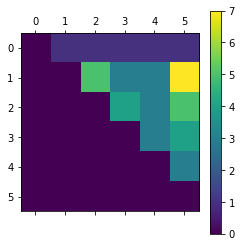

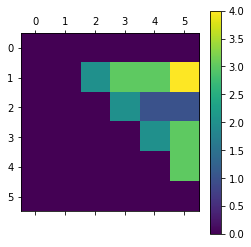

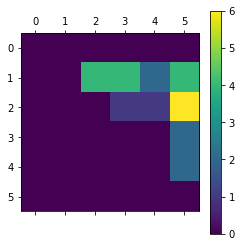

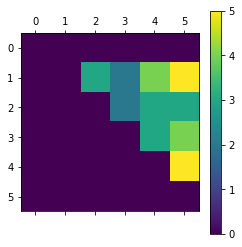

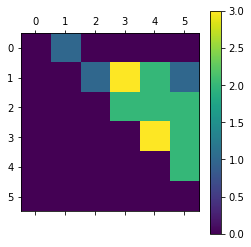

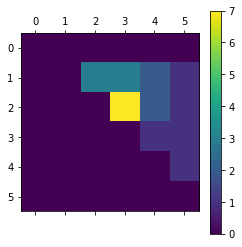

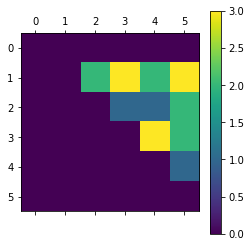

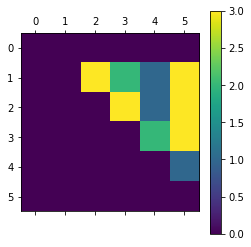

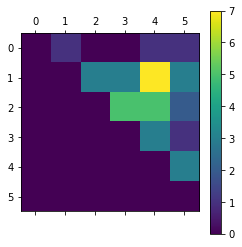

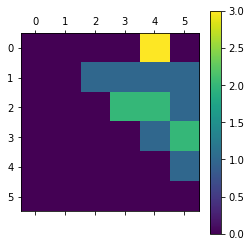

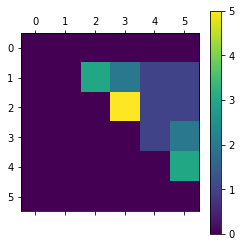

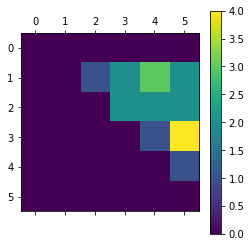

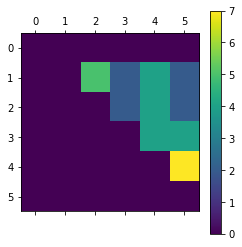

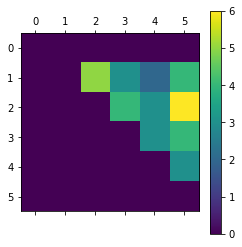

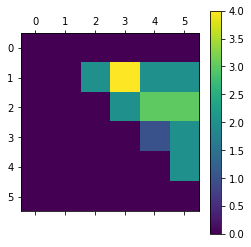

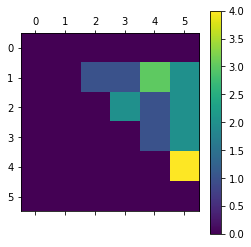

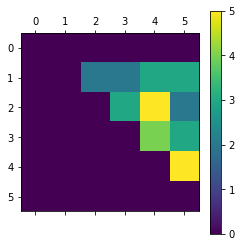

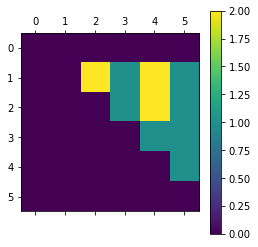

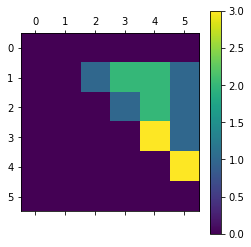

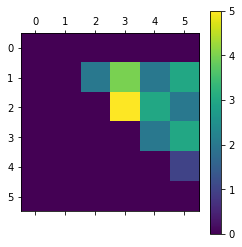

In [37]:
def analyzeStory():
    tknzr = nltk.TweetTokenizer()
    for i in range(20):
        data = df.loc[i]
        matrix = generateMatrix(data)
        plt.matshow(matrix)
        plt.colorbar()
    
        
def generateMatrix(data):
    n_sentences = 6
    matrix = np.zeros((n_sentences,n_sentences))
    for i in range(n_sentences):
        sentence1 = data[i+1]
        tokens1 = tknzr.tokenize(sentence1)
        normalized_tokens1 = []
        for token in tokens1:
            normalized_tokens1.append(WordNetLemmatizer().lemmatize(token,'v'))
            
        for j in range(i+1,n_sentences):
            sentence2 = data[j+1]
            tokens2 = tknzr.tokenize(sentence2)
            normalized_tokens2 = []
            for token in tokens2:
                normalized_tokens2.append(WordNetLemmatizer().lemmatize(token,'v'))
            matrix[i,j] = sentencePairScore(normalized_tokens1,normalized_tokens2)
    return matrix
            
#        print(tokens)
#        print(normalized_tokens)    

def sentencePairScore(sentence1, sentence2):
    value = 0
    for word1 in sentence1:
        for word2 in sentence2:
            if word1 == word2:
                value += 1
    return value
        
        
analyzeStory()

In [26]:
from nltk.stem.wordnet import WordNetLemmatizer
words = ['gave','went','going','dating']
for word in words:
    print(word+"-->"+WordNetLemmatizer().lemmatize(word,'v'))

gave-->give
went-->go
going-->go
dating-->date


In [9]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/sandar/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [29]:
tknzr = TweetTokenizer()

NameError: name 'TweetTokenizer' is not defined